# **Bank Marketing Campaign Dataset Classification Model**
---
## *Final Project Delta Team - JCDS2804*
---
Purwadhika Digital Technology School - Job Connector Data Science
* Ikhsan Herdi Fariyanto
* Sulaeman Nurhakim
* Muhammad Naufal Maahir


# Chapter I: Business Problem

---

## 1. Backgroud

**Analisis Dataset Kampanye Pemasaran Bank: Penawaran Deposito Berjangka**  
Dataset ini menggambarkan hasil kampanye pemasaran sebuah bank di Portugal. Kampanye dilakukan terutama melalui panggilan telepon langsung kepada nasabah untuk menawarkan produk deposito berjangka.  
Jika setelah seluruh upaya pemasaran nasabah bersedia membuka deposito, maka target diberi label `yes`; jika tidak, diberi label `no`.

**Sumber Data:**  
[https://archive.ics.uci.edu/ml/datasets/bank+marketing](https://archive.ics.uci.edu/ml/datasets/bank+marketing)

---

## 2. Business Knowledge

**Konteks**  
Sebuah bank di Portugal telah melakukan kampanye pemasaran melalui telepon untuk menawarkan produk deposito berjangka. Namun, tingkat keberhasilan kampanye (conversion ratio) masih rendah.  
Pihak manajemen ingin meningkatkan efektivitas kampanye dengan mengidentifikasi karakteristik nasabah yang cenderung menerima penawaran deposito, sehingga strategi pemasaran dapat menjadi lebih terarah dan efisien.

**Target**  
- `yes` → Nasabah menerima tawaran deposito  
- `no` → Nasabah menolak tawaran deposito  

Target ini merupakan permasalahan **klasifikasi biner**.

---

## 3. Problem Statement

Proyek ini akan mencoba menjawab pertanyaan berikut:  
**Bagaimana memprediksi kemungkinan seorang nasabah menerima tawaran deposito berjangka berdasarkan data historis kampanye pemasaran dan profil nasabah, sehingga bank dapat menargetkan kampanye dengan lebih efektif?**

---

## 4. Goals

Tujuan utama proyek ini adalah:  

Berdasarkan permasalahan di atas, perusahaan ingin mengembangkan kemampuan untuk memprediksi kemungkinan nasabah menerima tawaran deposito dengan cara:

- Membangun pipeline machine learning end-to-end untuk memprediksi apakah nasabah akan menerima tawaran deposito.
- Mengidentifikasi faktor-faktor kunci yang memengaruhi keputusan nasabah melalui analisis feature importance.
- Menyediakan sistem rekomendasi prediksi yang siap pakai (deployment-ready) untuk mendukung keputusan tim pemasaran.

---

## 5. Stakeholders

Para pemangku kepentingan dalam proyek ini meliputi:

- **Manajemen Bank** → Membuat keputusan bisnis berdasarkan hasil prediksi.
- **Tim Pemasaran/Telemarketing** → Mengoptimalkan strategi dan segmentasi nasabah.
- **Nasabah Akhir** → Secara tidak langsung mendapatkan manfaat dari kampanye yang lebih relevan dan tidak mengganggu.

---

## 6. Analytical Approach

Proyek ini menggunakan pendekatan _modern machine learning pipeline_ yang mencakup:

- **Data Preparation:**  
  Pembersihan data, imputasi missing value, encoding variabel kategorikal, scaling, dan feature engineering untuk menghasilkan fitur yang lebih informatif.
- **Analisis Data Eksploratif (EDA):**  
  Menganalisis distribusi data dan hubungan antar fitur dengan target menggunakan visualisasi dan statistik ringkasan.
- **Penanganan Imbalanced Data:**  
  Menggunakan teknik resampling seperti SMOTE, RandomOverSampler, dan SMOTEENN untuk meningkatkan representasi kelas minoritas.
- **Modeling:**
  - **Baseline:** Logistic Regression
  - **Advanced:** Decision Tree, Random Forest, ExtraTrees, XGBoost, LightGBM, dan ensemble methods (Voting, Stacking)
  - **Ensemble & Threshold Tuning:**  
    Model ensemble (Voting Classifier) dipilih berdasarkan hasil recall tertinggi dan threshold tuning dilakukan untuk mengoptimalkan F2-score sesuai kebutuhan bisnis.
- **Model Evaluation:**  
  Evaluasi performa model menggunakan berbagai metrik dan visualisasi confusion matrix pada threshold optimal.
- **Interpretasi Model:**  
  Analisis feature importance untuk mendapatkan insight fitur-fitur utama yang memengaruhi prediksi.
- **Deployment:**  
  Model pipeline dilatih ulang pada seluruh data dan di-deploy ke aplikasi Streamlit untuk memudahkan user bisnis melakukan prediksi secara real-time.

---

## 7. Metric Evaluasion

> _Evaluasi dilakukan secara komprehensif dengan mempertimbangkan konsekuensi bisnis (FP vs FN) dan imbalance dataset._

![Confusion Matrix](confusion_matrix.png)

- **True Negative (TN):** Model memprediksi nasabah *tidak* akan menerima tawaran deposito (`no`), dan kenyataannya memang *tidak* (`no`).
- **False Negative (FN):** Model memprediksi nasabah *tidak* akan menerima tawaran (`no`), padahal sebenarnya *iya* (`yes`).
- **False Positive (FP):** Model memprediksi nasabah *akan* menerima tawaran (`yes`), padahal sebenarnya *tidak* (`no`).
- **True Positive (TP):** Model memprediksi nasabah *akan* menerima tawaran (`yes`), dan kenyataannya memang *iya* (`yes`).

---

### Type I Error – False Positive

**Kasus:** Model memprediksi nasabah akan menerima tawaran deposito (`yes`), padahal sebenarnya tidak (`no`).  
**Konsekuensi Bisnis:**
- Waktu dan biaya telemarketing terbuang sia-sia
- Sumber daya pemasaran digunakan untuk nasabah yang tidak tertarik
- Efisiensi kampanye menurun

---

### Type II Error – False Negative

**Kasus:** Model memprediksi nasabah tidak akan menerima tawaran (`no`), padahal sebenarnya ya (`yes`).  
**Konsekuensi Bisnis:**
- Kehilangan peluang emas untuk mengonversi nasabah potensial
- Tingkat keberhasilan kampanye menurun
- Potensi nasabah bernilai tinggi terlewatkan

---

Dengan mempertimbangkan konsekuensi di atas, fokus utama model adalah **meminimalkan False Negative** (Type II Error), sehingga semakin banyak nasabah potensial yang benar-benar tertangkap oleh kampanye. Oleh sebab itu, **Recall** menjadi metrik evaluasi utama, didukung oleh F2 Score dan PR AUC untuk memastikan model tetap robust di dataset imbalanced.

---

- **Recall (Sensitivitas)**  
  Proporsi kejadian positif yang berhasil diprediksi dengan benar.  
  \[
  \text{Recall} = \frac{TP}{TP + FN}
  \]

- **Precision**  
  Proporsi prediksi positif yang benar-benar tepat.  
  \[
  \text{Precision} = \frac{TP}{TP + FP}
  \]

- **F1 & F2 Score**  
  F1 adalah rata-rata harmonis antara precision dan recall.  
  F2 lebih berat pada recall, sehingga sangat cocok untuk konteks ini.  
  \[
  F_\beta = (1+\beta^2) \cdot \frac{\text{Precision} \cdot \text{Recall}}{(\beta^2 \cdot \text{Precision}) + \text{Recall}}
  \]
  Dengan \(\beta = 2\), fokus utama ke recall.

- **PR AUC (Precision-Recall Area Under Curve)**  
  Luas area di bawah kurva Precision vs Recall pada berbagai threshold.  
  Sangat cocok untuk dataset yang tidak seimbang (imbalanced).

---

### Mengapa Recall dan F2 Score?

- Pada konteks pemasaran deposito berjangka, **missed opportunity** (False Negative) lebih merugikan, karena berarti kehilangan nasabah yang sebenarnya potensial.
- Model dengan recall tinggi akan **menangkap lebih banyak nasabah yang benar-benar tertarik** membuka deposito, meskipun harus mengorbankan sedikit efisiensi (precision).
- F2 Score dipilih untuk mengakomodasi kebutuhan bisnis yang lebih berat ke recall.
- PR AUC digunakan untuk memantau robustness model pada dataset yang imbalance.

---

### Business Implication

- **Recall Tinggi** → Semakin banyak nasabah potensial yang bisa dijangkau oleh tim pemasaran.
- **F2 Score** → Memastikan optimasi recall tetap sejalan dengan precision yang cukup.
- **Precision & PR AUC** → Memantau efisiensi campaign dan performa model pada imbalance dataset.
- **Feature Importance** → Insight untuk pengambilan keputusan strategi campaign selanjutnya.

---

**Dengan pendekatan pipeline modern, threshold tuning, dan deployment-ready pipeline, proyek ini memberikan solusi end-to-end yang bisa langsung digunakan oleh bisnis.**


# Chapter II : Data Understanding
---


In [2]:
# =========================
# General Libraries
# =========================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import math

# Ignore Warnings
warnings.filterwarnings('ignore')

# =========================
# Data Visualization
# =========================
import missingno as msno

# =========================
# Statistics
# =========================
from scipy.stats import normaltest, skew
from scipy.stats import chi2_contingency

# =========================
# Data Preprocessing & Feature Engineering
# =========================
import category_encoders as ce
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.preprocessing import (
    LabelEncoder, MinMaxScaler, OneHotEncoder,
    OrdinalEncoder, PolynomialFeatures, RobustScaler, StandardScaler
)
from sklearn.feature_selection import chi2

# =========================
# Model Selection & Validation
# =========================
from sklearn.model_selection import (
    KFold, GridSearchCV, RandomizedSearchCV, StratifiedKFold,
    cross_val_score, train_test_split, cross_val_predict, learning_curve
)

# =========================
# Machine Learning Algorithms - Regression
# =========================
from sklearn.linear_model import Lasso, LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import (
    AdaBoostRegressor, GradientBoostingRegressor,
    RandomForestRegressor, StackingRegressor, VotingRegressor
)
from sklearn.svm import SVR
from sklearn.compose import TransformedTargetRegressor
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

# =========================
# Machine Learning Algorithms - Classification
# =========================
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier, ExtraTreesClassifier,
    GradientBoostingClassifier, RandomForestClassifier, StackingClassifier, 
    VotingClassifier
)

from sklearn.metrics import make_scorer, fbeta_score

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# =========================
# Handling Imbalance
# =========================
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN, SMOTETomek
from imblearn.pipeline import Pipeline as ImbPipeline

# =========================
# Model Evaluation Metrics
# =========================
from sklearn.metrics import (
    accuracy_score, average_precision_score, classification_report,
    confusion_matrix, f1_score, fbeta_score,
    mean_absolute_error, mean_absolute_percentage_error, mean_squared_error,
    precision_score, r2_score, recall_score, ConfusionMatrixDisplay
)

import joblib


In [3]:
df = pd.read_csv('data_bank_full.csv', sep=';') 

<Axes: >

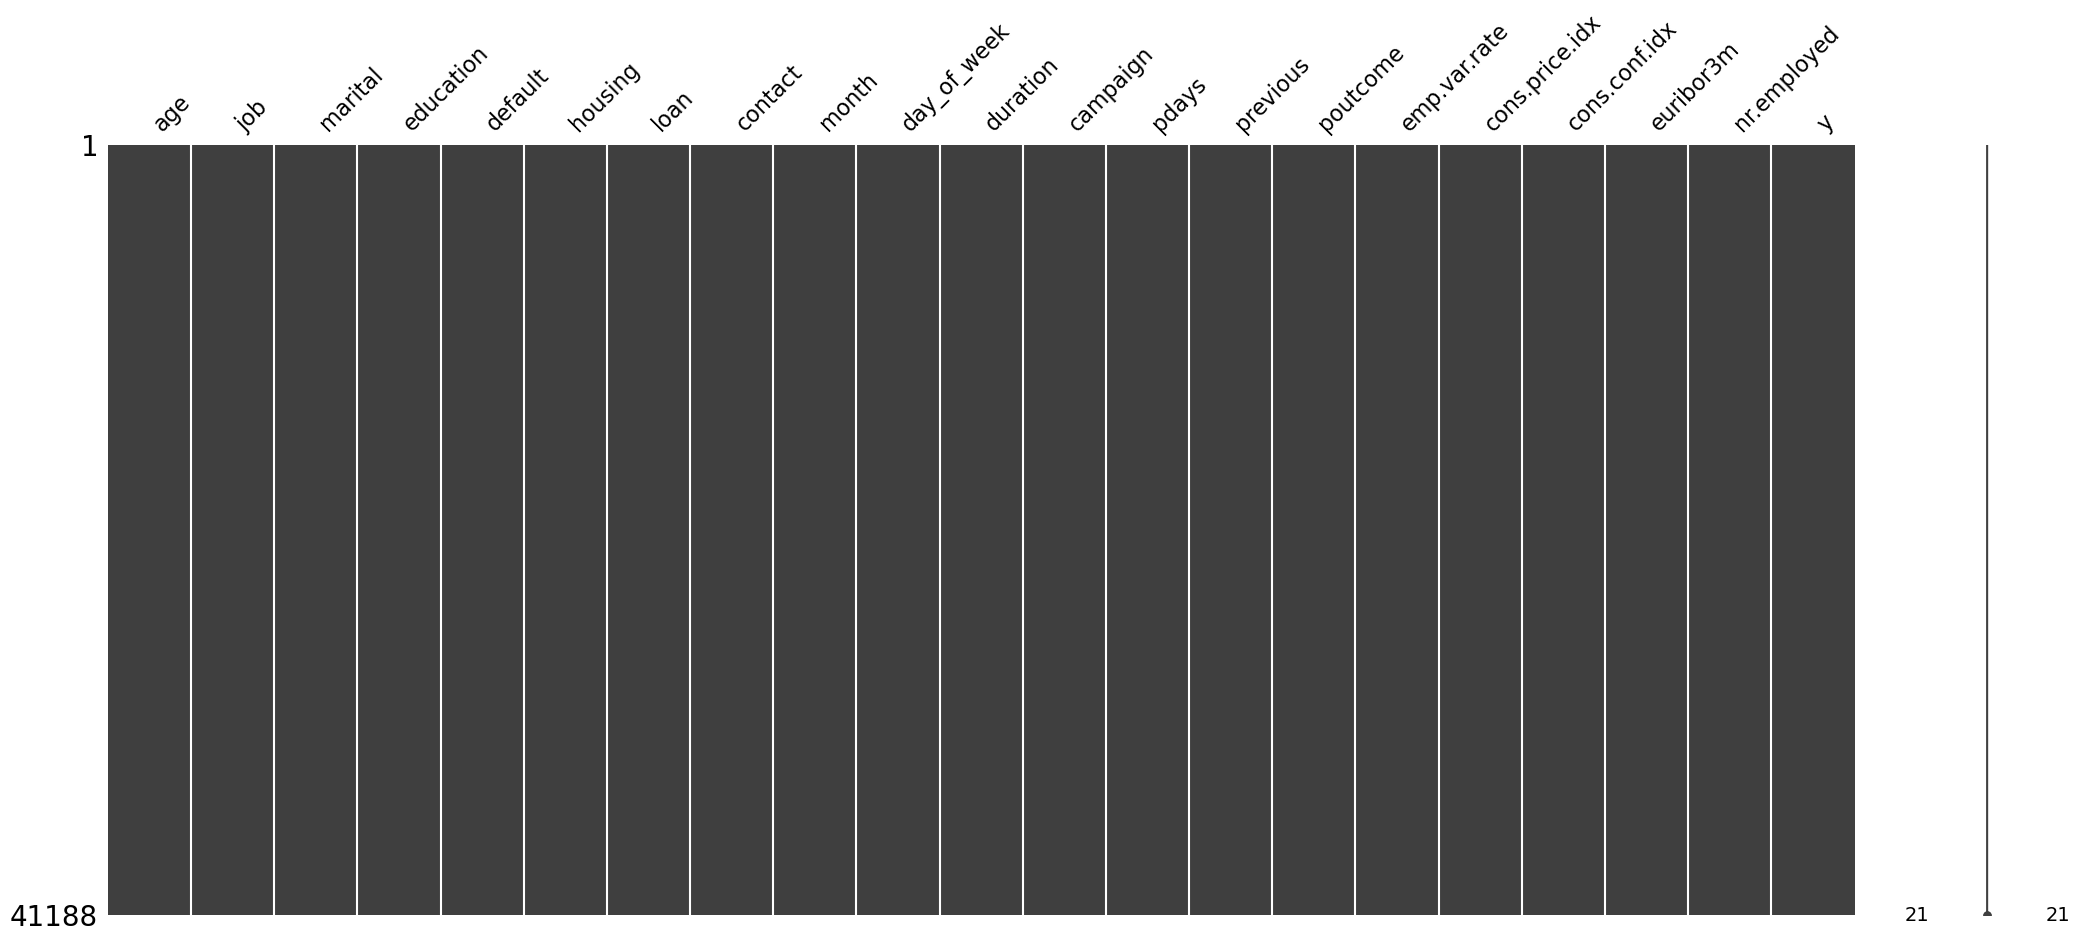

In [4]:
msno.matrix(df)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  object 
 17  cons.conf.idx   41188 non-null 

In [6]:
df.head()  # Display the first few rows of the DataFrame

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent         1.01   
1   may         mon  ...         1    999         0  nonexistent         1.01   
2   may         mon  ...         1    999         0  nonexistent         1.01   
3   may         mon  ...         1    999         0  nonexistent         1.01   
4   may         mon  ...         1    999         0  nonexistent         1.01   

   cons.price.idx cons.conf.idx  euribor3m nr.employed   y  
0          93.994         -36.4      4.857        5191  no  
1          93.994         -36.4      4.857        5191  no  
2          93.994         -36.4      4.857        5191  no  
3          93.994         -36.4      4.857        5191  no  
4          93.994         -36.4      4.857        5191  no  

[5 rows x 21 columns]

## 1. Feature Description


**Bank Client Data:**
| **No** | **Attribute**                   | **Data Type** | **Description**                                    |
| -------| --------------------------- | --------- | ---------------------------------------------- |
|1. | `age`                         | Int       | Umur pelanggan                                 |
|2. | `job`                         | Object    | type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")                     |
|3. | `marital`                     | Object    | marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)                          |
|4. | `education`                   | Object    | categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown"                    |
|5. | `default`                     | Object    | has credit in default (categorical: "no","yes","unknown")          |
|6. | `housing`                     | Object    | has housing loan? (categorical: "no","yes","unknown")        |
|7. | `loan`                        | Object    | has personal loan? (categorical: "no","yes","unknown")                        |

<br>

**related with the last contact of the current campaign:**
| **No** | **Attribute**                   | **Data Type** | **Description**                                    |
| -------| --------------------------- | --------- | ---------------------------------------------- |
|8. | `contact`                     | Object    | contact communication type (categorical: "cellular","telephone")                        |
|9. | `month`                       | Object    | last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec")   |
|10. | `day_of_week`                 | Object    | last contact day of the week (categorical: "mon","tue","wed","thu","fri")                |
|11. | `duration`                    | Int       | last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.             |

<br>

**other attributes:**
| **No** | **Attribute**                   | **Data Type** | **Description**                                    |
| -------| --------------------------- | --------- | ---------------------------------------------- |
|12. | `campaign`                    | Int       | number of contacts performed during this campaign and for this client (numeric, includes last contact)                        |
|13. | `pdays`                       | Int       | number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)                    |
|14. | `previous`                    | Int       | number of contacts performed before this campaign and for this client (numeric)                 |
|15. | `poutcome`                    | Object    | outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")       |

<br>

**other attributes:**
| **No** | **Attribute**                   | **Data Type** | **Description**                                    |
| -------| --------------------------- | --------- | ---------------------------------------------- |
|16. | `emp.var.rate`                | Float     | employment variation rate - quarterly indicator (numeric) |
|17. | `cons.price.idx`              | Float     | consumer price index - monthly indicator (numeric)                    |
|18. | `cons.conf.idx`               | Float     | consumer confidence index - monthly indicator (numeric)                           |
|19. | `euribor3m`                   | Float     | euribor 3 month rate - daily indicator (numeric)                    |
|20. | `nr.employed`                 | Float     | number of employees - quarterly indicator (numeric)         |
|21. | `y`                           | Object    | has the client subscribed a term deposit? (binary: "yes","no")         |

# Chapter III : Explanatory Data Analysis
---
## 1. Summary Statistics

In [7]:
df.describe(include='O')  # Get a statistical summary of the DataFrame

job  marital          education default housing   loan   contact  \
count    41188    41188              41188   41188   41188  41188     41188   
unique      12        4                  8       3       3      3         2   
top     admin.  married  university.degree      no     yes     no  cellular   
freq     10422    24928              12168   32588   21576  33950     26144   

        month day_of_week     poutcome cons.price.idx euribor3m nr.employed  \
count   41188       41188        41188          41188     41188       41188   
unique     10           5            3             27       315          11   
top       may         thu  nonexistent         93.994     4.857  5228.01.00   
freq    13769        8623        35563           7763      2868       16234   

            y  
count   41188  
unique      2  
top        no  
freq    36548

In [8]:
df.describe(include='number')  # Get a statistical summary of the DataFrame

age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.conf.idx  
count  41188.000000   41188.000000  
mean      -0.076969     -40.502600  
std        1.444534       4.628198  
min       -3.400000     -50.800000  
25%       -1.800000     -42.700000  
50%        1.010000     -41.800000  
75%        1.040000     -36.400000  
max        1.040000     -26.900000

## 2. Standardization of Data Types

In [9]:
# Ubah koma menjadi titik dan konversi ke float
cols_to_fix = ['cons.price.idx', 'euribor3m', 'nr.employed']

for col in cols_to_fix:
    df[col] = df[col].str.replace(',', '.', regex=False)  # Ganti koma jadi titik jika ada
    df[col] = pd.to_numeric(df[col], errors='coerce')     # Konversi ke float, jika gagal jadi NaN

# Cek hasil perubahan
print(df[cols_to_fix].dtypes)
print(df[cols_to_fix].head())

cons.price.idx    float64
euribor3m         float64
nr.employed       float64
dtype: object
   cons.price.idx  euribor3m  nr.employed
0          93.994      4.857       5191.0
1          93.994      4.857       5191.0
2          93.994      4.857       5191.0
3          93.994      4.857       5191.0
4          93.994      4.857       5191.0


## 3. Visualization

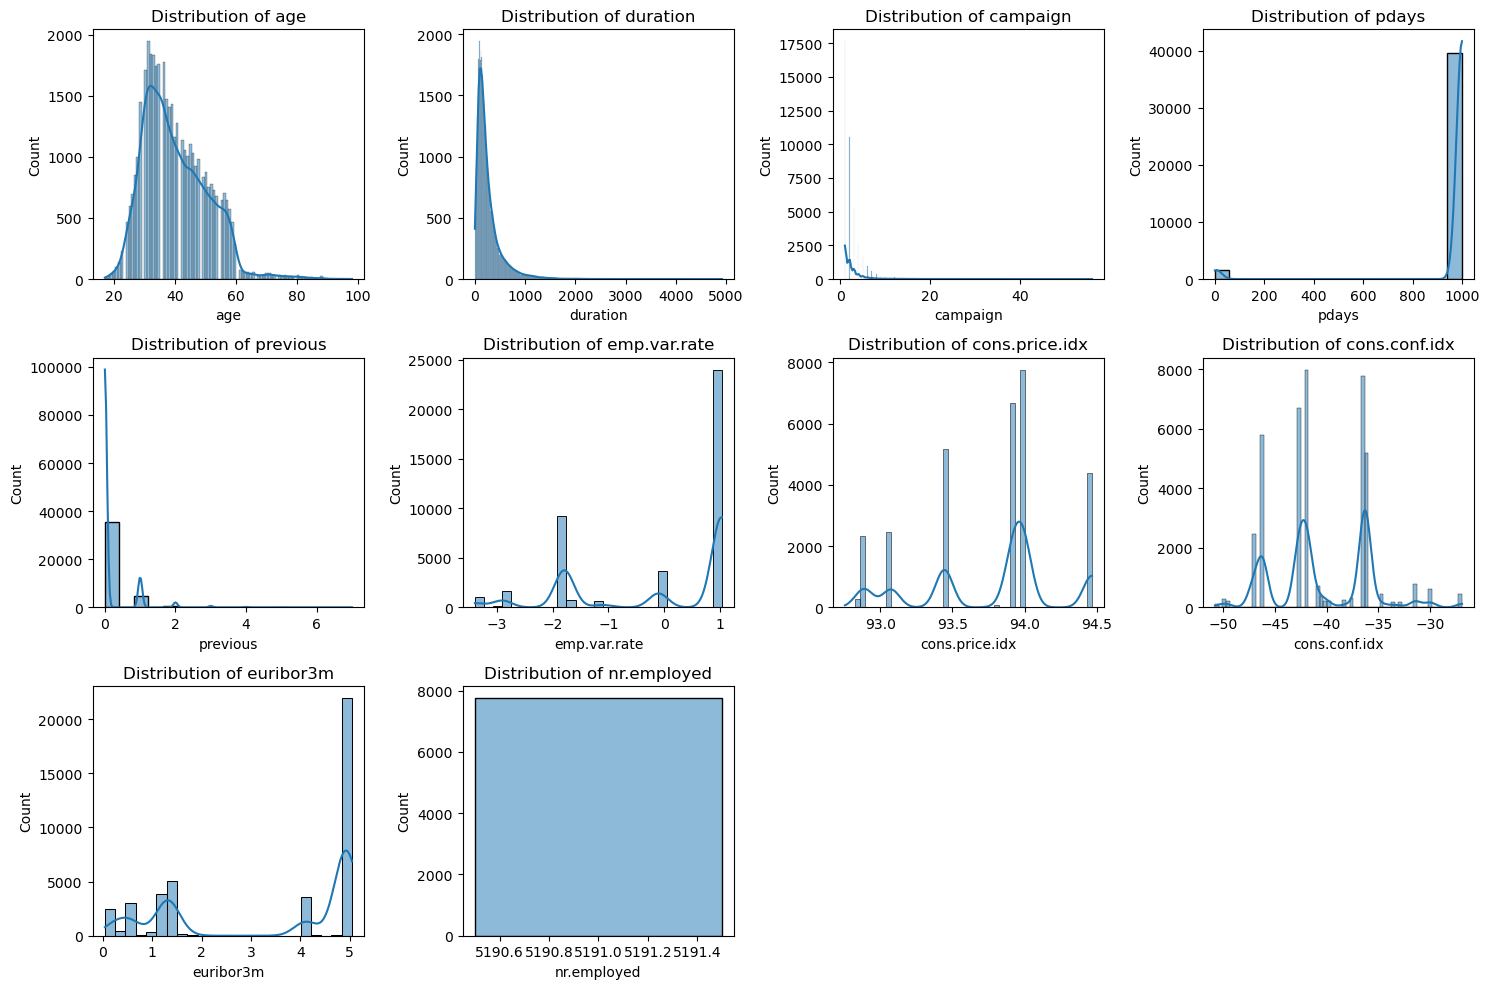

In [10]:
# Creating a list of numeric columns for distribution analysis
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Plotting the distributions of numeric columns
plt.figure(figsize=(15, 10))

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.tight_layout()

plt.show()

### Insight Fitur

| Fitur              | Insight                                                                                              |
|--------------------|-----------------------------------------------------------------------------------------------------|
| `age`              | Distribusi miring ke kanan. Mayoritas nasabah berusia antara 30–40 tahun.                           |
| `duration`         | Sangat miring ke kanan. Sebagian besar panggilan berlangsung singkat (<500 detik), menandakan interaksi cepat atau calon nasabah cepat menolak. |
| `campaign`         | Distribusi miring ke kanan. Mayoritas nasabah hanya dihubungi satu atau dua kali.                   |
| `pdays`            | Puncak kuat pada nilai 999, kemungkinan besar menandakan nasabah **belum pernah dihubungi sebelumnya** — sebaiknya diperlakukan khusus dalam modeling. |
| `previous`         | Sebagian besar bernilai nol, menunjukkan mayoritas nasabah **belum pernah dihubungi sebelumnya**.   |
| `emp.var.rate`     | Pola multimodal dengan nilai diskrit — kemungkinan merefleksikan update makroekonomi per kuartal/periode. |
| `cons.price.idx`   | Multimodal dengan sedikit nilai unik — mencerminkan update resmi indeks harga konsumen.              |
| `cons.conf.idx`    | Diskrit dan multimodal — sesuai dengan data indeks kepercayaan konsumen yang dirilis berkala.        |
| `euribor3m`        | Distribusi campuran dengan beberapa puncak — mengikuti tren suku bunga Euro 3 bulan.                 |
| `nr.employed`      | Hampir konstan — variansi sangat rendah, kemungkinan **kurang informatif** untuk modeling.           |

---


<Axes: xlabel='y'>

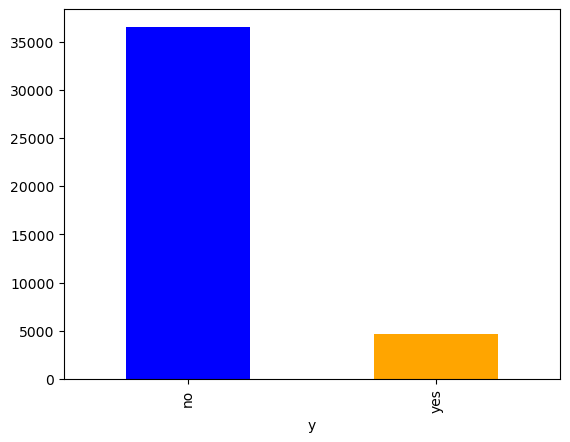

In [11]:
df['y'].value_counts().plot(kind='bar', color=['blue', 'orange'])

### Insight

| Kelas | Jumlah    | Insight                                                                           |
|-------|-----------|-----------------------------------------------------------------------------------|
| no    | ~36.000   | Mayoritas kelas. Sebagian besar nasabah **tidak** berlangganan deposito berjangka. |
| yes   | ~4.500    | Minoritas kelas. Hanya sebagian kecil yang berlangganan — menandakan **class imbalance**. |

---

### Catatan & Rekomendasi

#### Permasalahan Class Imbalance
- Variabel target sangat tidak seimbang, di mana kelas **`no`** mendominasi dataset.
- Ketidakseimbangan ini dapat menyebabkan model bias ke kelas mayoritas.

#### Potensi Masalah
- Model cenderung lebih sering memprediksi kelas mayoritas (`no`), sehingga:
  - **Recall dan precision kelas minoritas (`yes`) menjadi rendah**
  - **Akurasi** bisa menyesatkan karena hanya mencerminkan prediksi kelas mayoritas

#### Teknik Penanganan yang Direkomendasikan
- **Resampling:**
  - **Oversampling** kelas minoritas (misal: menggunakan **SMOTE/SMOTEENN**)
  - **Undersampling** kelas mayoritas

- **Penyesuaian Bobot Kelas (Class Weight):**
  - Gunakan algoritma yang mendukung parameter `class_weight` (misal: `LogisticRegression`, `RandomForest`, `XGBoost`)
  - Berikan penalti lebih besar pada kesalahan prediksi kelas minoritas

- **Pemilihan Metrik Evaluasi yang Tepat:**
  - Berdasarkan kebutuhan bisnis, **Recall** menjadi fokus utama karena meminimalkan potensi nasabah tertarik yang terlewat (**False Negative**).
  - **F2 Score** dipilih sebagai metrik utama karena lebih menekankan pada recall daripada precision.
  - **PR AUC (Precision-Recall Area Under Curve)** digunakan untuk mengukur performa model secara menyeluruh pada dataset yang tidak seimbang.
  - **Akurasi** dan F1-score tetap dipantau, namun bukan menjadi acuan utama untuk pengambilan keputusan model dalam konteks ini.

---



In [12]:
# Normality test feature
hasil=[]
for i in numeric_columns:
    stats,pval=normaltest(df[i])
    if pval>0.05:
        hasil.append('Distribusi normal')
    else:
        hasil.append('Tidak berdistribusi normal')

pd.DataFrame({'Kolom':numeric_columns, 'Distribusi':hasil})

Kolom                  Distribusi
0             age  Tidak berdistribusi normal
1        duration  Tidak berdistribusi normal
2        campaign  Tidak berdistribusi normal
3           pdays  Tidak berdistribusi normal
4        previous  Tidak berdistribusi normal
5    emp.var.rate  Tidak berdistribusi normal
6  cons.price.idx  Tidak berdistribusi normal
7   cons.conf.idx  Tidak berdistribusi normal
8       euribor3m  Tidak berdistribusi normal
9     nr.employed  Tidak berdistribusi normal

### Insight dari Uji Normalitas

- Tidak ada fitur numerik yang terdistribusi normal.
- Hal ini sejalan dengan distribusi miring yang sebelumnya terlihat pada plot histogram.

#### **Dampak pada Modeling**
- Algoritma yang mengasumsikan data normal (misal: Linear Regression, Logistic Regression) kemungkinan performanya kurang optimal.
- Performa model dapat meningkat dengan melakukan transformasi data atau memilih algoritma yang tidak sensitif terhadap distribusi.

#### **Rekomendasi Tindakan**
- Pertimbangkan penggunaan model non-parametrik atau berbasis pohon keputusan seperti Decision Tree, Random Forest, atau XGBoost.
- Lakukan transformasi data yang sesuai (misal: log, akar kuadrat) untuk mengurangi skewness jika diperlukan.
- Gunakan **RobustScaler** atau **MinMaxScaler** untuk penskalaan fitur, daripada **StandardScaler**.

---


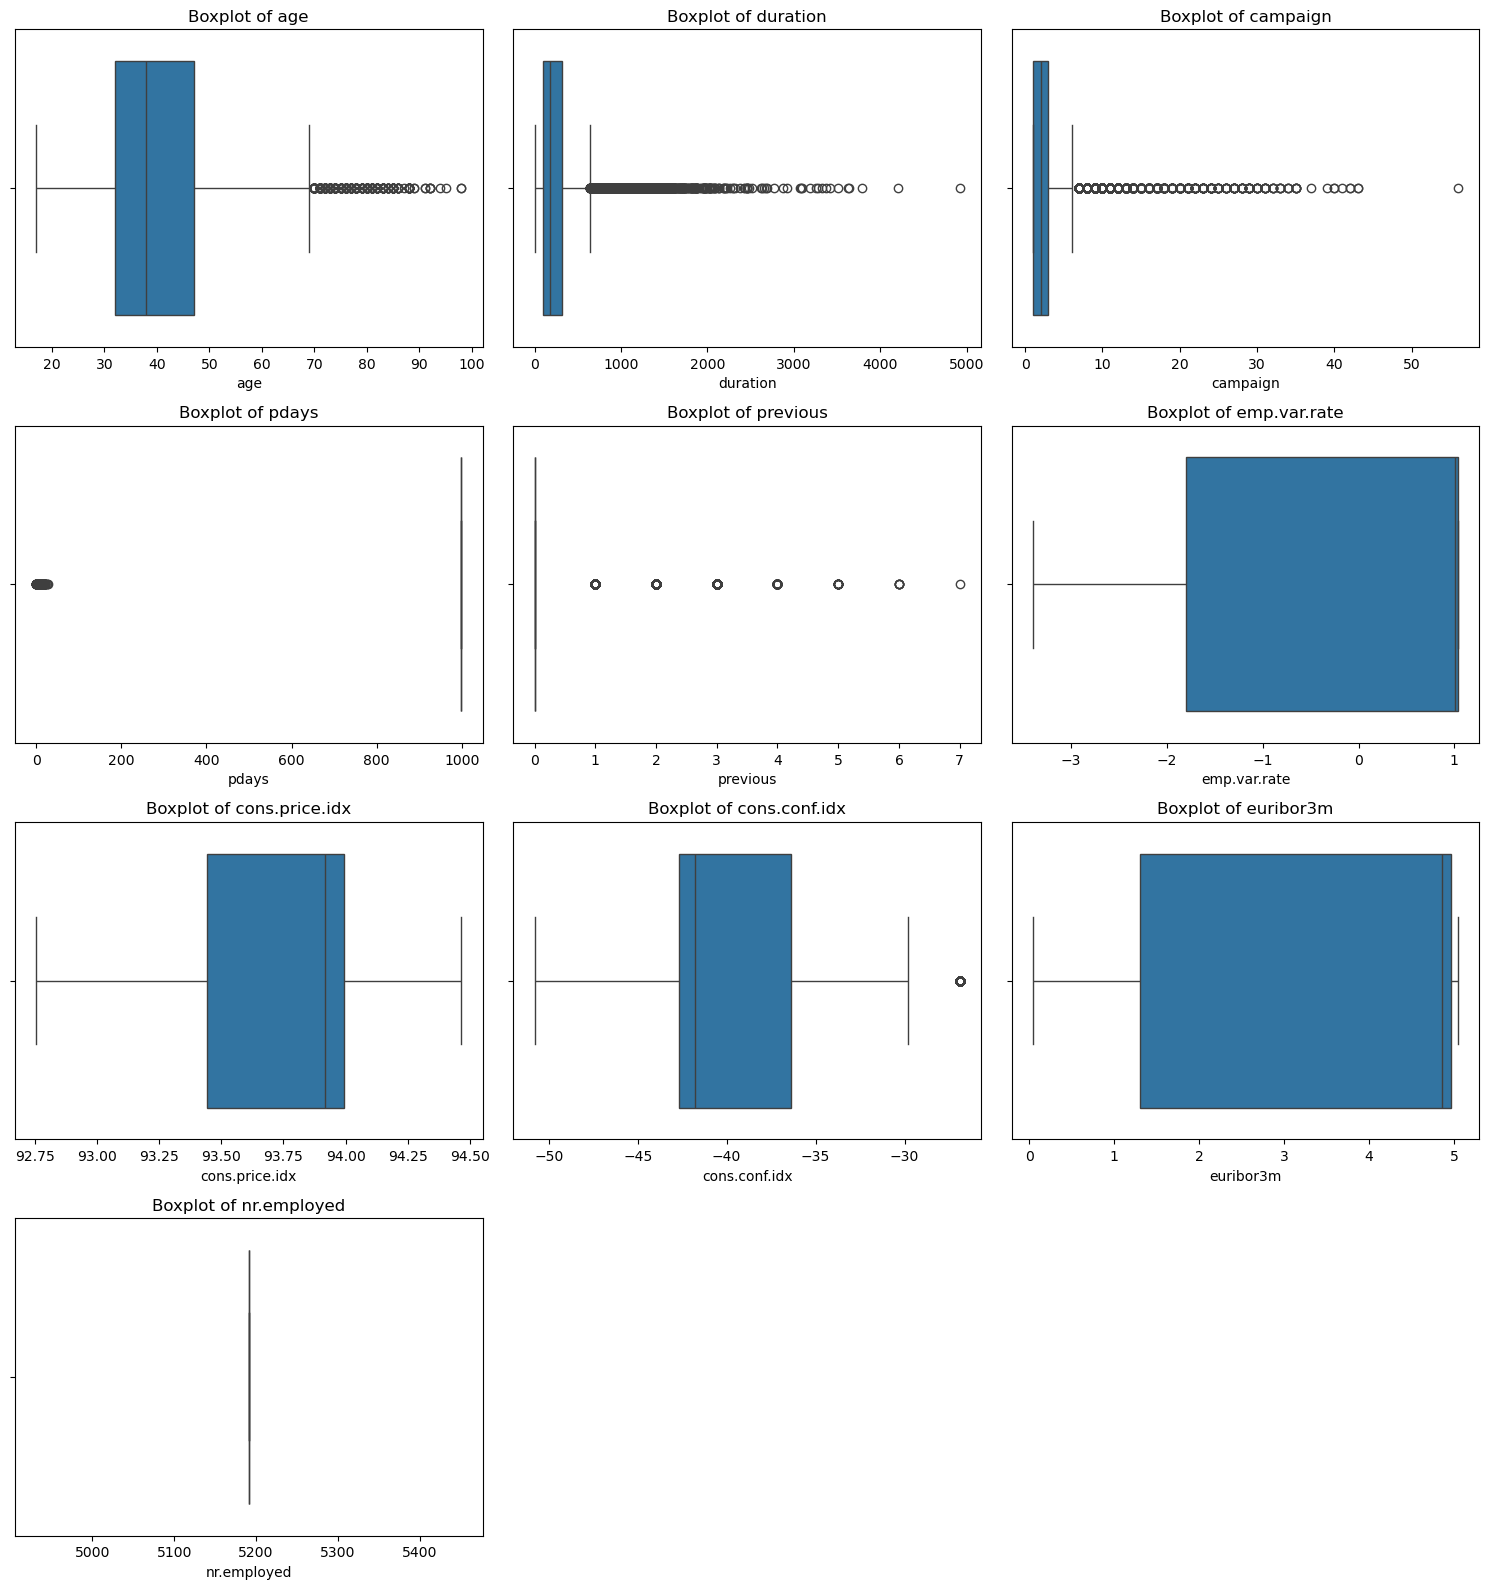

In [13]:
# Creating boxplots for the numerical variables
n = len(numeric_columns)
n_cols = 3  # Jumlah kolom yang kamu suka
n_rows = math.ceil(n / n_cols)

plt.figure(figsize=(5*n_cols, 4*n_rows))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()


### Insight

| Fitur               | Outlier    | Ringkasan Insight                                                                                       |
|---------------------|------------|--------------------------------------------------------------------------------------------------------|
| `age`               | Ya         | Mayoritas usia 30–60 tahun, ada outlier di atas 70 tahun.                                              |
| `duration`          | Ya         | Distribusi sangat miring dengan banyak outlier ekstrem (>1000 detik).                                  |
| `campaign`          | Ya         | Sebagian besar kontak <5 kali, namun ada outlier hingga 50—artinya ada nasabah yang sering dihubungi.  |
| `pdays`             | Ya         | Nilai 999 sangat dominan (kemungkinan besar berarti "belum pernah dihubungi sebelumnya")—merupakan outlier khusus. |
| `previous`          | Ya         | Mayoritas kontak sebelumnya 0–1, dengan outlier hingga 7.                                              |
| `emp.var.rate`      | Tidak      | Distribusi diskrit, tanpa outlier yang mencolok.                                                       |
| `cons.price.idx`    | Tidak      | Rentang nilai konsisten, tanpa outlier signifikan.                                                     |
| `cons.conf.idx`     | Ya         | Umumnya terkonsentrasi, namun ada beberapa outlier.                                                    |
| `euribor3m`         | Tidak      | Sebaran lebar, tetapi tanpa outlier signifikan.                                                        |
| `nr.employed`       | Tidak      | Hampir konstan—sangat rendah variansi, kemungkinan tidak informatif untuk prediksi.                    |

---

### Observasi Kunci dari Boxplot

- **Banyak Outlier Berat**:
  - Fitur `duration`, `campaign`, dan `pdays` mengandung outlier signifikan.
  - Outlier ini bisa mempengaruhi performa model dan bisa dipertimbangkan untuk:
    - *Capping* (membatasi nilai ekstrim) atau winsorisasi
    - Membuat *bin* kategori dari nilai numerik
    - Transformasi logaritmik atau akar kuadrat

- **Fitur Konstan / Variansi Rendah**:
  - `nr.employed` nyaris tidak ada variasi, sehingga kemungkinan **kurang berguna** untuk prediksi.
  - Disarankan untuk dihapus atau dicek korelasinya terhadap target sebelum modeling.

- **Fitur dengan Sebaran Baik**:
  - `emp.var.rate`, `cons.price.idx`, `cons.conf.idx`, dan `euribor3m` punya sebaran wajar tanpa outlier ekstrim.
  - Fitur-fitur ini **siap digunakan untuk modeling** tanpa transformasi berat.

- **Kasus Khusus**:
  - `pdays` memiliki nilai 999 yang sangat dominan, menandakan "nasabah belum pernah dihubungi sebelumnya".
  - Sebaiknya nilai `999` diperlakukan sebagai kategori khusus/flag (misal: fitur baru `never_contacted`) sebelum modeling.
  - **`previous`**: Distribusi sangat miring dengan outlier; nilai 0 artinya **belum pernah kontak sebelumnya dan belum pernah berhasil** di campaign sebelumnya, sedangkan nilai >0 menandakan ada riwayat kontak. Fitur ini bisa direkayasa menjadi indikator histori pemasaran nasabah.

---


In [14]:
print(df.dtypes)

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object


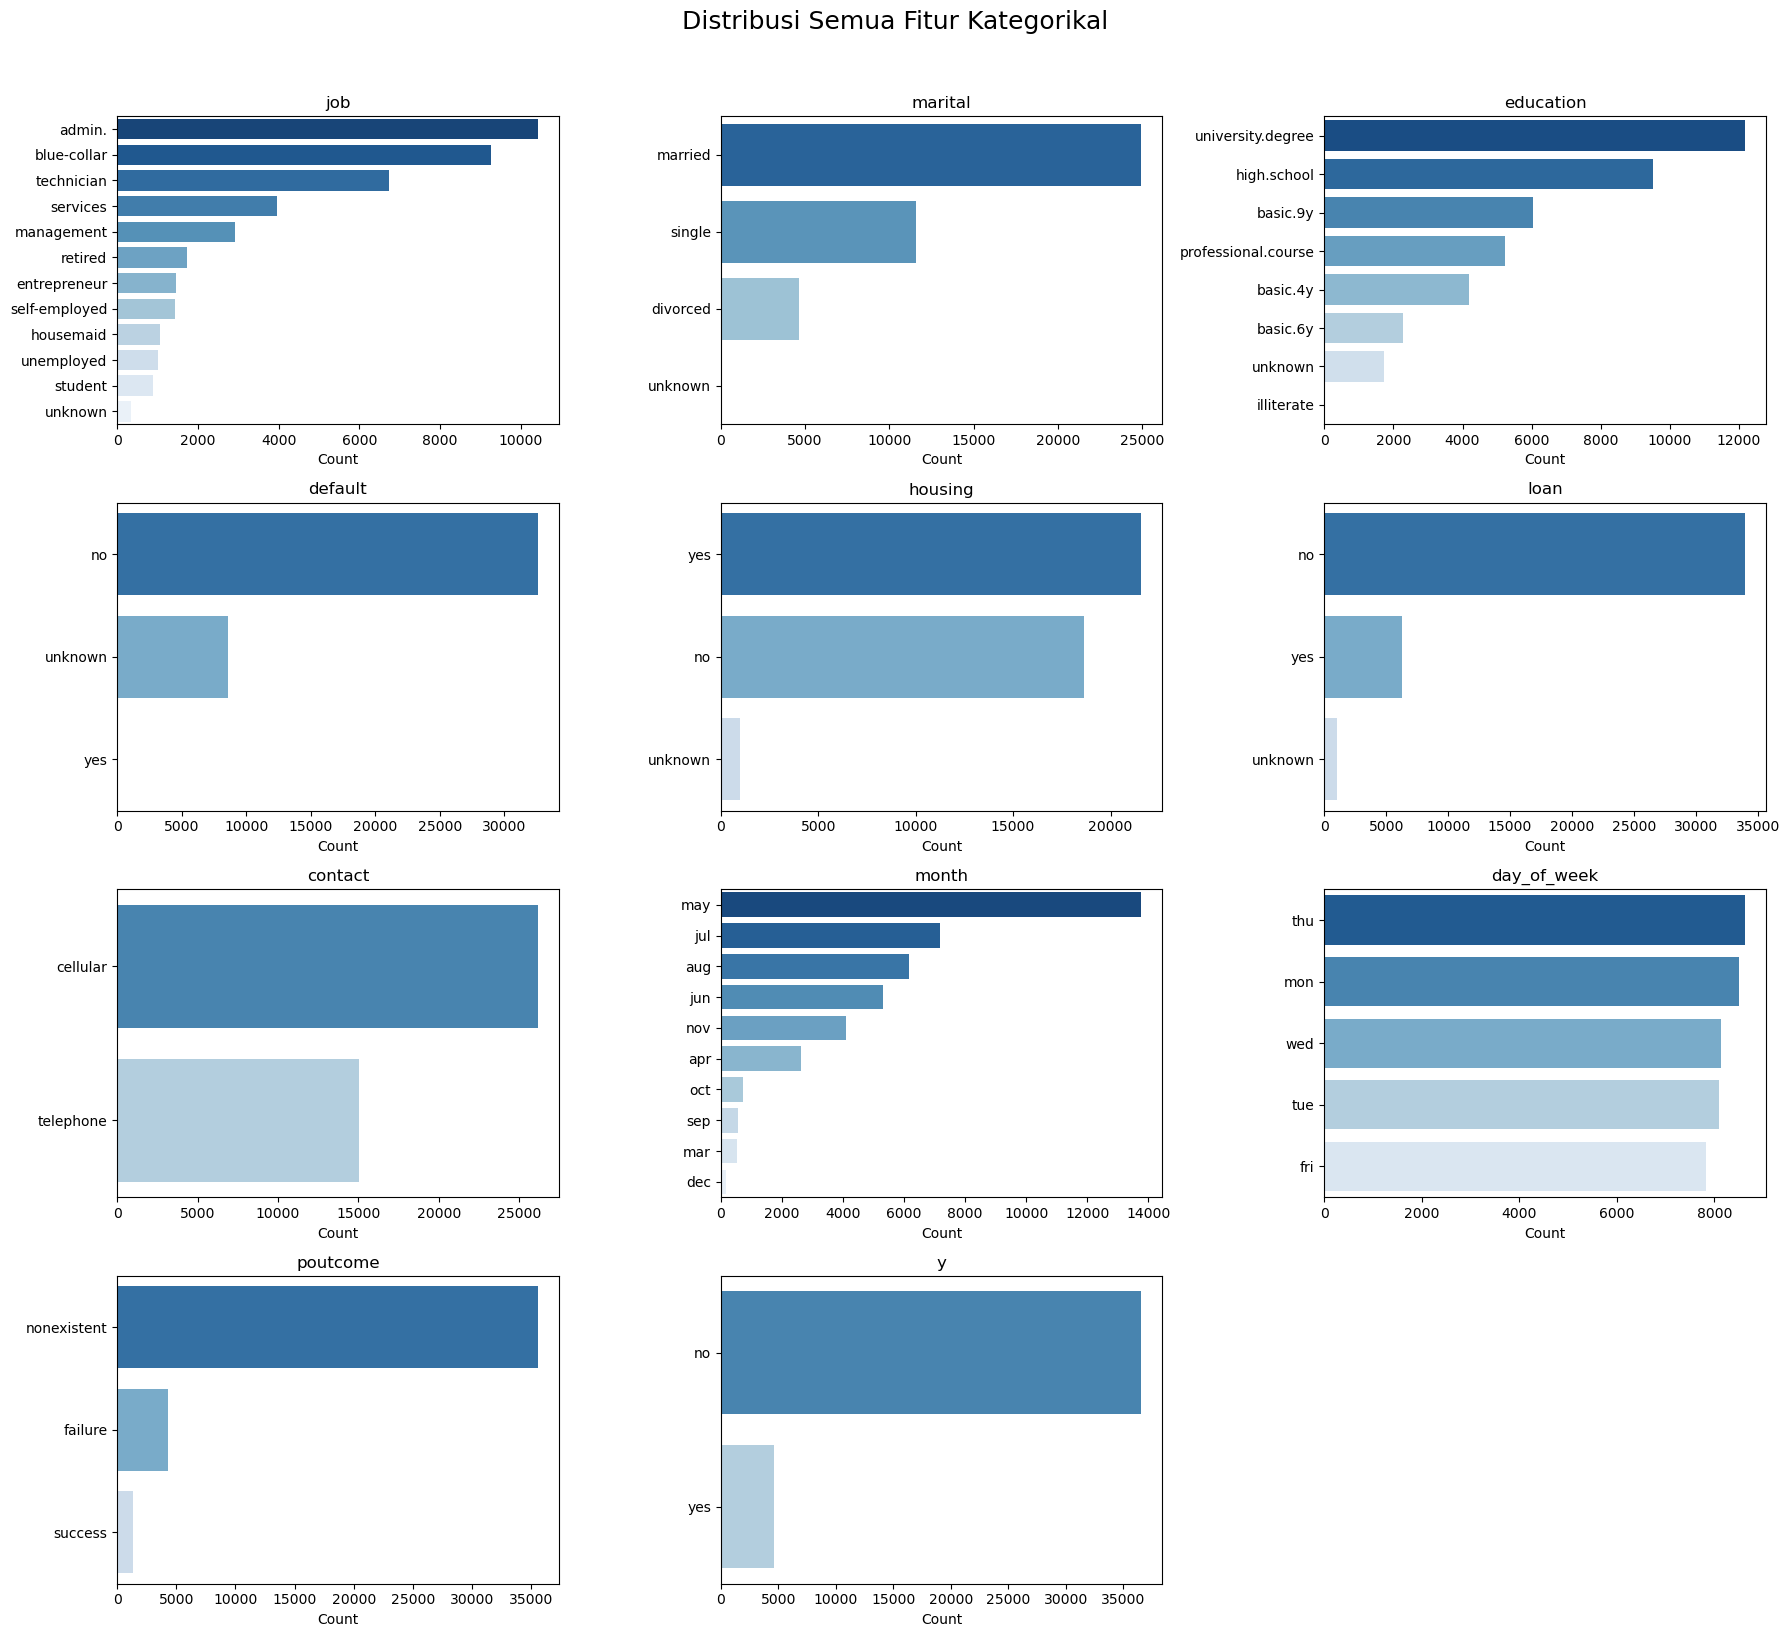

In [15]:
# Ambil list kolom kategorikal
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Buat grid, misal 3 kolom (n_rows dihitung otomatis)
n_plots = len(categorical_cols)
n_cols = 3
n_rows = math.ceil(n_plots / n_cols)

plt.figure(figsize=(6 * n_cols, 4 * n_rows))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    order = df[col].value_counts().index
    sns.countplot(y=df[col], order=order, palette='Blues_r')  # Pakai palette biar lebih menarik
    plt.title(col, fontsize=12)
    plt.xlabel('Count')
    plt.ylabel(None)
    plt.tight_layout()
    # Untuk label kategori panjang, agar tidak terpotong:
    plt.gca().set_yticklabels(plt.gca().get_yticklabels(), fontsize=10)

plt.suptitle('Distribusi Semua Fitur Kategorikal', fontsize=18, y=1.02)
plt.tight_layout()
plt.show()


### Insight dari Observasi Fitur Kategorikal

| Fitur         | Insight Utama                                                                                       |
|---------------|-----------------------------------------------------------------------------------------------------|
| `job`         | Didominasi oleh "admin.", "blue-collar", dan "technician". Kategori "unknown" sangat kecil namun tetap perlu diperhatikan agar tidak bias pada modeling. |
| `marital`     | Mayoritas nasabah berstatus "married". Terdapat kategori "unknown" meskipun jarang muncul.          |
| `education`   | Sebagian besar nasabah memiliki gelar universitas atau lulusan SMA. Kategori seperti "basic.4y" dan "illiterate" jumlahnya sangat sedikit. |
| `default`     | Hampir semua nasabah tidak memiliki default kredit. Namun ada jumlah "unknown" yang cukup signifikan dan perlu penanganan khusus (imputasi atau kategori sendiri). |
| `housing`     | Mayoritas memiliki kredit rumah. Terdapat nilai "unknown" yang harus ditangani, misal dengan imputasi atau kategori terpisah. |
| `loan`        | Sebagian besar nasabah tidak memiliki kredit personal. "Unknown" juga ada dan dapat berpengaruh pada modeling. |
| `contact`     | "Cellular" merupakan metode kontak terbanyak. Penggunaan "telephone" jauh lebih sedikit.            |
| `month`       | Kampanye paling banyak dilakukan di bulan Mei, diikuti Juli dan Agustus. Distribusi yang tidak merata bisa menjadi indikasi adanya efek waktu dalam campaign. |
| `day_of_week` | Distribusi cukup merata di seluruh hari kerja.                                                      |
| `poutcome`    | "Nonexistent" mendominasi, menandakan sebagian besar nasabah belum pernah terlibat dalam campaign sebelumnya. |
| `y` (target)  | Sangat imbalanced: mayoritas respon "no", hanya sedikit "yes". Ketidakseimbangan kelas perlu ditangani dalam modeling. |

---

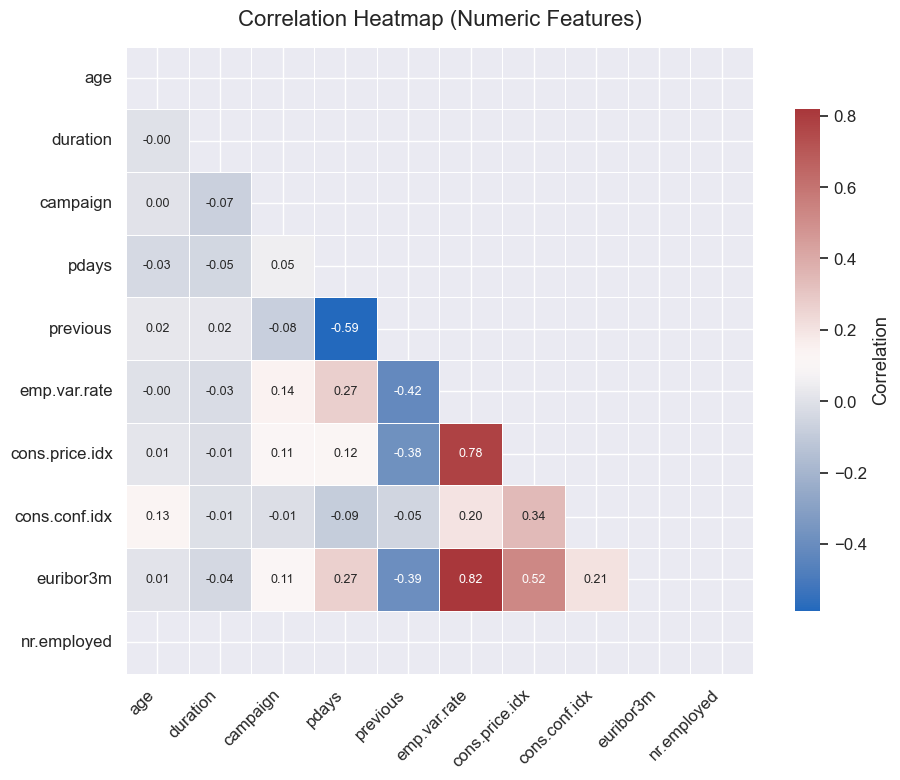

In [16]:
# Ambil matrix korelasi
corr = df.select_dtypes(include='number').corr()

# Membuat mask segitiga atas
mask = np.triu(np.ones_like(corr, dtype=bool))

# Ukuran & plot
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.1)

# Heatmap
sns.heatmap(
    corr, 
    mask=mask, 
    annot=True, 
    fmt=".2f",
    cmap='vlag',
    linewidths=.5,
    annot_kws={"size":9},
    square=True,
    cbar_kws={"shrink": .8, "label": "Correlation"}
)

plt.title("Correlation Heatmap (Numeric Features)", fontsize=16, pad=15)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


### Insight dari Matriks Korelasi

- **Korelasi Positif Tinggi:**
  - `euribor3m` ↔ `emp.var.rate` (r = 0,82)
  - `euribor3m` ↔ `cons.price.idx` (r = 0,78)
  - `emp.var.rate` ↔ `cons.price.idx` (r = 0,78)
  - Ketiga fitur ini sangat berkorelasi dan semuanya merepresentasikan indikator makroekonomi — dapat menimbulkan masalah multikolinearitas.

- **Korelasi Positif Sedang:**
  - `euribor3m` ↔ `cons.conf.idx` (r = 0,52)
  - `emp.var.rate` ↔ `cons.conf.idx` (r = 0,20)
  - Korelasi ini menandakan adanya keterkaitan antara sentimen ekonomi dan suku bunga pasar.

- **Korelasi Negatif Sedang:**
  - `previous` ↔ `pdays` (r = -0,59)
  - Semakin baru nasabah dihubungi (`pdays` kecil), semakin besar kemungkinan ada campaign sebelumnya yang sukses (`previous` > 0) — hal ini logis secara bisnis.

- **Korelasi Lemah atau Tidak Ada Korelasi:**
  - Sebagian besar fitur lain (seperti `age`, `duration`, `campaign`) memiliki korelasi sangat rendah atau hampir nol dengan variabel lain.

---

#### **Peringatan Multikolinearitas**
- Korelasi tinggi antara `euribor3m`, `emp.var.rate`, dan `cons.price.idx` menunjukkan risiko multikolinearitas dalam modeling.
- Solusi yang dapat dilakukan:
  - Pertimbangkan untuk menghapus salah satu fitur
  - Terapkan teknik reduksi dimensi seperti PCA
  - Gunakan regularisasi (misal: Ridge, Lasso)
  - Monitor VIF (Variance Inflation Factor) selama pemodelan

---

#### **Peluang Feature Engineering**
- Hubungan negatif yang kuat antara `previous` dan `pdays` dapat dimanfaatkan dengan membuat fitur baru, misalnya:
  - `recent_successful_contact` = (`previous` > 0 dan `pdays` < ambang batas tertentu)

---


In [17]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Contoh untuk semua kolom kategorikal ke target 'y'
cat_cols = df.select_dtypes(include=['object', 'category']).columns
cat_cols = [col for col in cat_cols if col != 'y']  # exclude target if kategorikal

for col in cat_cols:
    print(f"Cramér's V {col} vs y: {cramers_v(df[col], df['y']):.2f}")


Cramér's V job vs y: 0.15
Cramér's V marital vs y: 0.05
Cramér's V education vs y: 0.07
Cramér's V default vs y: 0.10
Cramér's V housing vs y: 0.01
Cramér's V loan vs y: 0.00
Cramér's V contact vs y: 0.14
Cramér's V month vs y: 0.27
Cramér's V day_of_week vs y: 0.02
Cramér's V poutcome vs y: 0.32


### Insight dari Uji Cramer's V

| Fitur           | Cramér's V | Kekuatan Asosiasi | Insight                                                                      |
|-----------------|------------|-------------------|------------------------------------------------------------------------------|
| `poutcome`      | 0,32       | Moderat           | Hasil campaign sebelumnya adalah prediktor kuat untuk nasabah membuka deposito. |
| `month`         | 0,27       | Moderat           | Kemungkinan nasabah membuka deposito dipengaruhi oleh bulan kampanye.         |
| `job`           | 0,15       | Lemah             | Beberapa jenis pekerjaan lebih cenderung berlangganan, namun tidak sangat signifikan. |
| `contact`       | 0,14       | Lemah             | Metode kontak (misal: cellular) sedikit memengaruhi respons nasabah.         |
| `default`       | 0,10       | Sangat Lemah      | Riwayat kredit macet hanya berpengaruh kecil terhadap keputusan nasabah.      |
| `education`     | 0,07       | Sangat Lemah      | Tingkat pendidikan hampir tidak berasosiasi dengan keputusan berlangganan.    |
| `marital`       | 0,05       | Sangat Lemah      | Status pernikahan hampir tidak berdampak.                                    |
| `day_of_week`   | 0,02       | Tidak Signifikan  | Hari kontak tidak berpengaruh secara nyata.                                   |
| `housing`       | 0,01       | Tidak Signifikan  | Status kredit rumah tidak dapat memprediksi berlangganan deposito.           |
| `loan`          | 0,00       | Tidak Signifikan  | Tidak ada asosiasi sama sekali — fitur ini dapat dipertimbangkan untuk di-drop. |

---

**Catatan:**  
- Fitur dengan nilai Cramér’s V moderat (`poutcome`, `month`) layak menjadi prioritas dalam feature selection/modeling.
- Fitur dengan asosiasi sangat lemah/tidak signifikan dapat dipertimbangkan untuk dihapus dari model untuk menyederhanakan dan meningkatkan efisiensi.


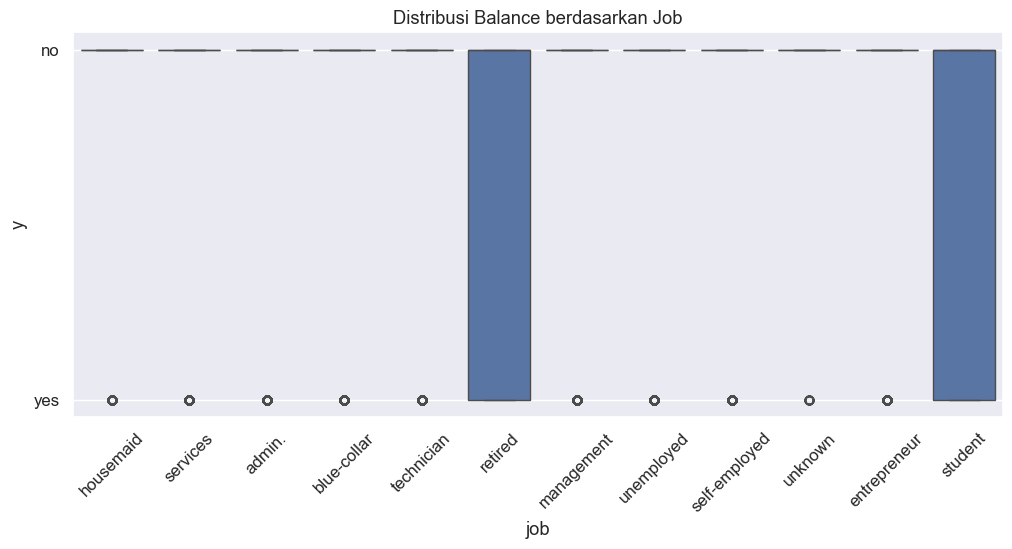

In [18]:
plt.figure(figsize=(12,5))
sns.boxplot(x='job', y='y', data=df)
plt.xticks(rotation=45)
plt.title('Distribusi Balance berdasarkan Job')
plt.show()


### Insight dari Distribusi Target berdasarkan Pekerjaan

- Sebagian besar kategori pekerjaan (misal: `housemaid`, `services`, `blue-collar`, `unemployed`, dll.) didominasi oleh kelas `no`, yang menandakan **tingkat konversi (subscription) sangat rendah** di hampir semua kelompok pekerjaan.

- Beberapa kategori pekerjaan menunjukkan proporsi `yes` yang relatif lebih tinggi:
  - **`retired`** dan **`student`** tampak memiliki persentase penerimaan deposito (`yes`) lebih tinggi dibandingkan kelompok lain.
  - Hal ini bisa jadi karena kelompok ini lebih terbuka terhadap penawaran deposito — mungkin karena lebih banyak waktu mempertimbangkan produk keuangan atau karena strategi pemasaran yang lebih efektif untuk segmen ini.

- Kategori lain seperti `admin.`, `technician`, dan `management` masih menunjukkan tingkat konversi sangat rendah (proporsi `yes` kecil).

- Kategori pekerjaan seperti `unknown`, `entrepreneur`, dan `self-employed` bahkan hampir tidak pernah sukses (`yes` sangat sedikit), sehingga perlu dipertimbangkan penanganan khusus atau pengelompokan.

---

### Rekomendasi

- Pertimbangkan untuk **mengelompokkan kategori pekerjaan dengan tingkat respons sangat rendah** atau menerapkan **encoding berbasis target** agar perbedaan tingkat keberhasilan lebih tercermin dalam model.
- Pekerjaan dengan tingkat konversi tinggi (`retired`, `student`) dapat dimanfaatkan sebagai **fitur interaksi** dalam modeling.
- Perlakukan kategori `unknown` secara khusus, misalnya dengan imputasi menggunakan fitur serupa (`education`, `marital`, dll.) atau dijadikan kategori tersendiri.
- Gunakan insight ini untuk **mengoptimalkan strategi pemasaran tersegmentasi** — profesi tertentu mungkin lebih responsif terhadap pesan atau pendekatan spesifik.

---


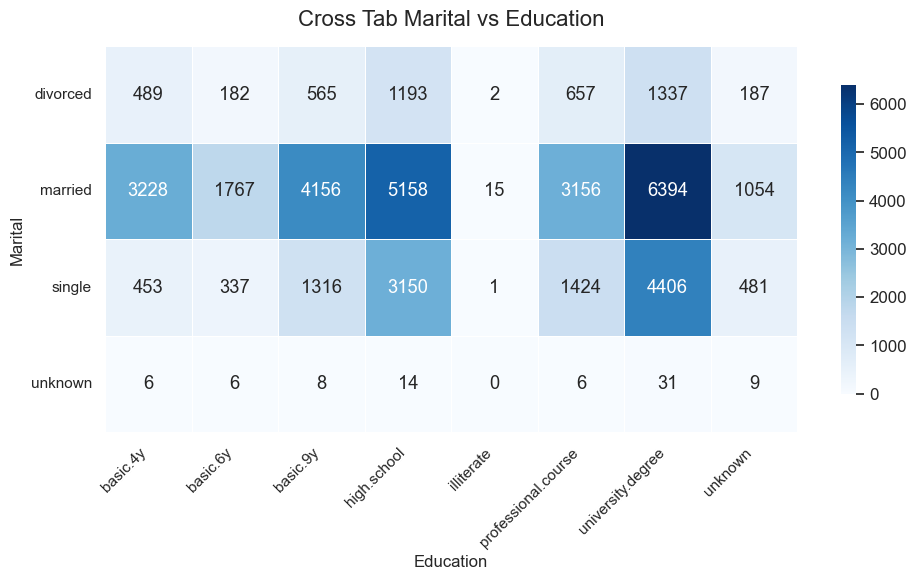

In [19]:
ct = pd.crosstab(df['marital'], df['education'])

plt.figure(figsize=(10,6))
sns.heatmap(
    ct,
    annot=True,
    fmt='g',  # angka normal, bukan scientific
    cmap='Blues',
    linewidths=.5,
    cbar_kws={"shrink": .8}
)

plt.title('Cross Tab Marital vs Education', fontsize=16, pad=15)
plt.xlabel('Education', fontsize=12)
plt.ylabel('Marital', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(rotation=0, fontsize=11)
plt.tight_layout()
plt.show()


### Key Observations

- **Nasabah berstatus menikah** mendominasi di semua tingkat pendidikan, terutama pada:
  - `university.degree`: 6.394 orang
  - `high.school`: 5.158 orang
  - `basic.9y`: 4.156 orang
  - `professional.course`: 3.156 orang

- **Nasabah berstatus single** paling banyak ditemukan pada:
  - `university.degree`: 4.406 orang
  - `high.school`: 3.150 orang

- **Nasabah berstatus divorced** merupakan kelompok paling sedikit secara keseluruhan, tetapi tetap tercatat pada:
  - `university.degree`: 1.337 orang
  - `high.school`: 1.193 orang

- **Kategori illiterate** (tidak bisa baca-tulis) sangat jarang ditemukan di seluruh status pernikahan, bahkan hanya:
  - 15 menikah, 2 cerai, 1 single

- Kategori `unknown` pada status pernikahan maupun pendidikan sangat sedikit dan sebaiknya diperlakukan sebagai data hilang (missing) atau di-drop dari analisis/modeling.

---


## 4. Analyzed Data
---
Untuk memudahkan analisis data, fitur-fitur dalam dataset ini akan dikategorikan ke dalam beberapa area utama sebagai berikut:

1. **Analisis berdasarkan informasi pribadi nasabah**  
   (`age`, `job`, `marital`, `education`, `default`, `housing`, `loan`)

2. **Analisis metode kontak yang digunakan**  
   (`contact`, `month`, `day_of_week`, `duration`)

3. **Analisis riwayat hasil campaign sebelumnya**  
   (`campaign`, `pdays`, `previous`, `poutcome`)

4. **Analisis indikator ekonomi Portugal**  
   (`emp.var.rate`, `cons.price.idx`, `cons.conf.idx`, `euribor3m`, `nr.employed`)


### A. **Analysis based on customers' personal information** 
(`age`, `job`, `marital`, `education`, `default`, `housing`, `loan`)

### **`age` & `age_range`**

<Figure size 1500x2000 with 0 Axes>

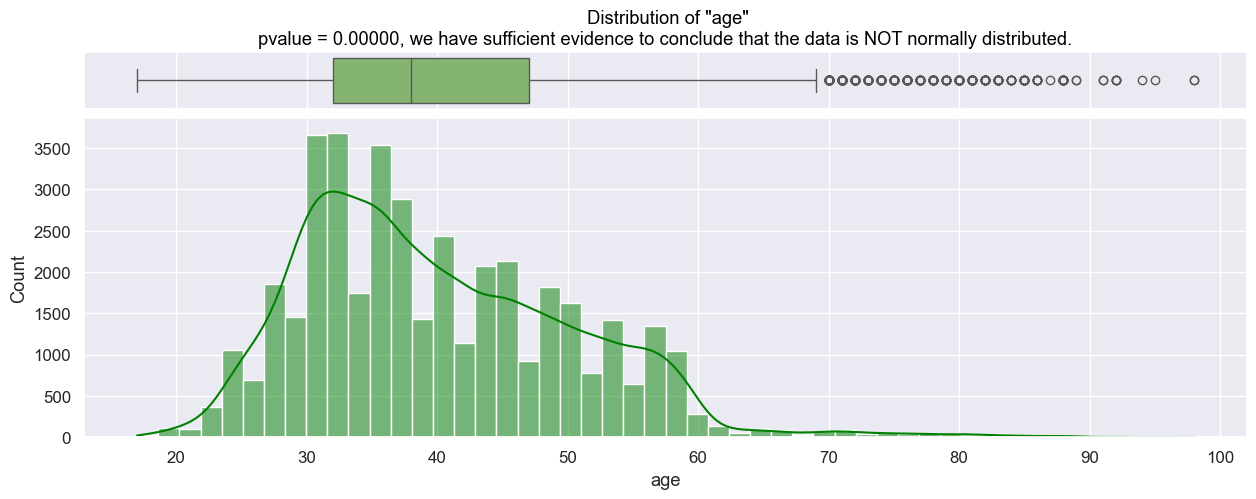

In [20]:
# cek pesebaran data dan uji normalitas data

plt.figure(figsize=(15,20))

fig, (ax1, ax2) = plt.subplots(2, sharex = True, figsize = (15,5), 
                                gridspec_kw={"height_ratios": (.15, .85),
                                            "hspace": 0.05})

# Uji Normalitas Data
stat, pvalue = normaltest(df["age"].dropna())
if pvalue > 0.05 :
    distribusi = f'pvalue = {pvalue:.5f}, We have sufficient evidence to conclude that the data is normally distributed.'
else :
    distribusi = f'pvalue = {pvalue:.5f}, we have sufficient evidence to conclude that the data is NOT normally distributed.'

# Cek Pesebaran Data
ax1.set_title(f""" Distribution of "age"\n{distribusi}""", color = "black")
sns.boxplot(x = df["age"], ax = ax1, palette="summer")
ax1.set(xlabel = "")

sns.histplot(data = df["age"], ax = ax2, stat = "count", kde=True, bins=50, color="green")

plt.show()

### Insight

* Distribusi data **tidak normal**, melainkan **miring ke kanan**. Skewness ini terjadi karena sebagian besar data terkonsentrasi pada nilai rendah, khususnya di rentang usia **30 hingga 45 tahun**.

* Nasabah yang paling sering dihubungi berada pada usia **30 hingga 45 tahun**. Hal ini menunjukkan bahwa bank menargetkan individu dalam kelompok usia ini, kemungkinan karena mereka dianggap sudah **matang secara finansial dan berada di puncak produktivitas hidupnya**.


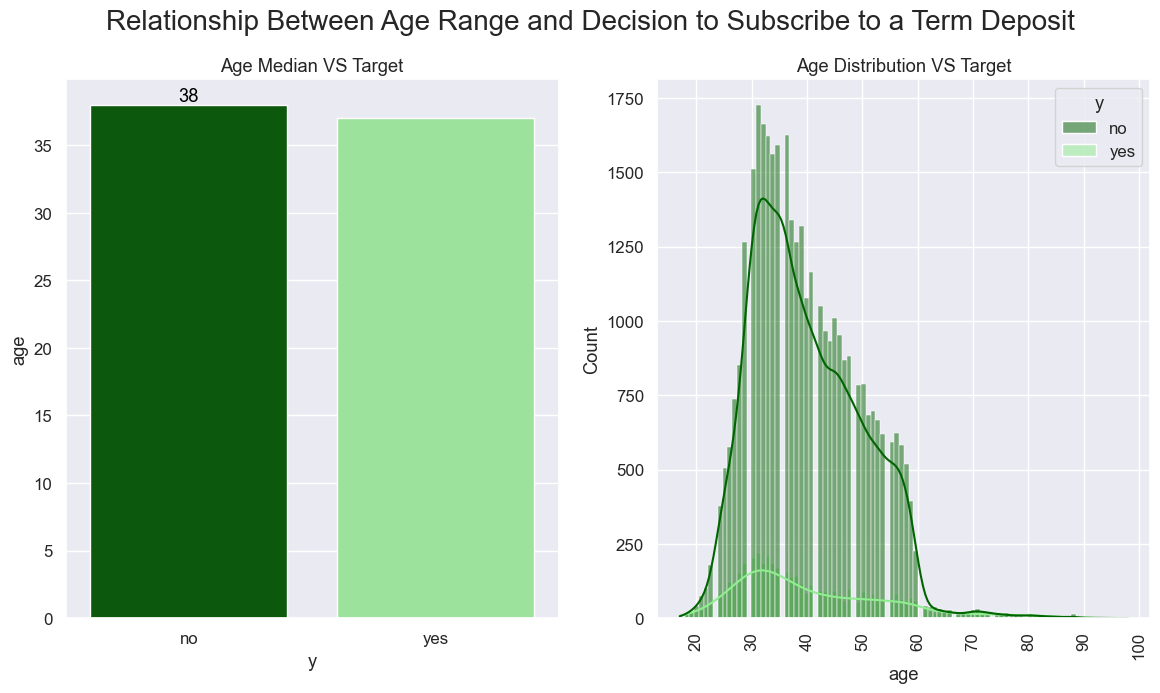

In [21]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))

plt.suptitle('Relationship Between Age Range and Decision to Subscribe to a Term Deposit', size=20)

# Plot pertama
axes[0].set_title('Age Median VS Target')
plot1 = sns.barplot(x='y', y='age', data=df, estimator=np.median, ci=0, ax=axes[0], palette={'yes':'lightgreen', 'no':'darkgreen'})  
plot1.bar_label(plot1.containers[0], label_type='edge', color='black')  

# Plot kedua
axes[1].set_title('Age Distribution VS Target')
plot2 = sns.histplot(data=df, hue='y', x=df['age'], stat='count', ax=axes[1], kde=True, palette={'yes':'lightgreen', 'no':'darkgreen'})  
plt.xticks(rotation=90)

plt.show()


Dalam kasus ini, tujuan kita adalah menguji apakah terdapat perbedaan signifikan pada **median usia** antara individu yang berlangganan deposito berjangka dan yang tidak.

Berdasarkan visualisasi awal, perbedaan ini tidak langsung terlihat jelas. Oleh karena itu, akan digunakan **Uji Mann-Whitney U**, yaitu uji hipotesis non-parametrik, untuk menentukan apakah perbedaan median yang teramati benar-benar signifikan secara statistik atau hanya terjadi secara kebetulan.


**Hipotesis:**

- **H₀ (Hipotesis Nol):** Distribusi usia individu yang berlangganan deposito berjangka (*Yes*) **sama** dengan distribusi usia individu yang tidak berlangganan (*No*).
- **H₁ (Hipotesis Alternatif):** Distribusi usia individu yang berlangganan deposito berjangka (*Yes*) **tidak sama** dengan distribusi usia individu yang tidak berlangganan (*No*).

In [22]:
from scipy.stats import mannwhitneyu
stat, pvalue = mannwhitneyu(
    df[df['y'] == 'yes']['age'],
    df[df['y'] == 'no']['age'],
    alternative = 'two-sided'
)
pvalue

0.01608053832750354

In [23]:
if pvalue > 0.05:
    print(f'''
          p-value = {pvalue:.5f}. Since p-value > 0.05, there is not enough evidence to reject the null hypothesis (H₀).
          There is insufficient statistical evidence to conclude that the age distribution of those who subscribed to a term deposit 
          is different from those who did not.
          (No significant difference observed)
          ''')
else:
    print(f'''
          p-value = {pvalue:.5f}. Since p-value <= 0.05, we reject the null hypothesis (H₀).
          There is sufficient statistical evidence to conclude that the age distribution of those who subscribed to a term deposit 
          is not the same as those who did not.
          (A significant difference exists)
          ''')



          p-value = 0.01608. Since p-value <= 0.05, we reject the null hypothesis (H₀).
          There is sufficient statistical evidence to conclude that the age distribution of those who subscribed to a term deposit 
          is not the same as those who did not.
          (A significant difference exists)
          


### Insight

Berdasarkan analisis di atas, terlihat bahwa **usia berperan** dalam memengaruhi keputusan seseorang untuk berlangganan deposito berjangka.

Untuk memvisualisasikan temuan ini dengan lebih baik, kita akan mengeksplorasi hubungan antara **rentang usia (`age_range`)** dan **variabel target**, serta menghitung **conversion rate (CVR)** pada setiap kelompok usia.  
Langkah pertama adalah melihat distribusi fitur `age_range`.

Setelah memahami distribusi fitur `age`, analisis akan dilanjutkan untuk melihat bagaimana `age_range` berkorelasi dengan target (keputusan berlangganan), kemudian menghitung **conversion rate untuk tiap kelompok usia**.

---

### Apa itu Conversion Rate (CVR) dalam konteks ini?

Pada kasus ini, **Conversion Rate (CVR)** adalah persentase nasabah dalam suatu kelompok usia tertentu yang akhirnya berlangganan deposito berjangka.

Rumusnya adalah jumlah nasabah yang berhasil dikonversi (yaitu yang menjawab "yes" untuk penawaran deposito) **dibagi dengan** total nasabah dalam kelompok usia tersebut yang dihubungi atau ditawari produk.

Metrik ini memberikan gambaran tentang **seberapa efektif strategi pemasaran atau penjualan** dalam meyakinkan nasabah di setiap kelompok usia untuk berlangganan produk deposito berjangka.


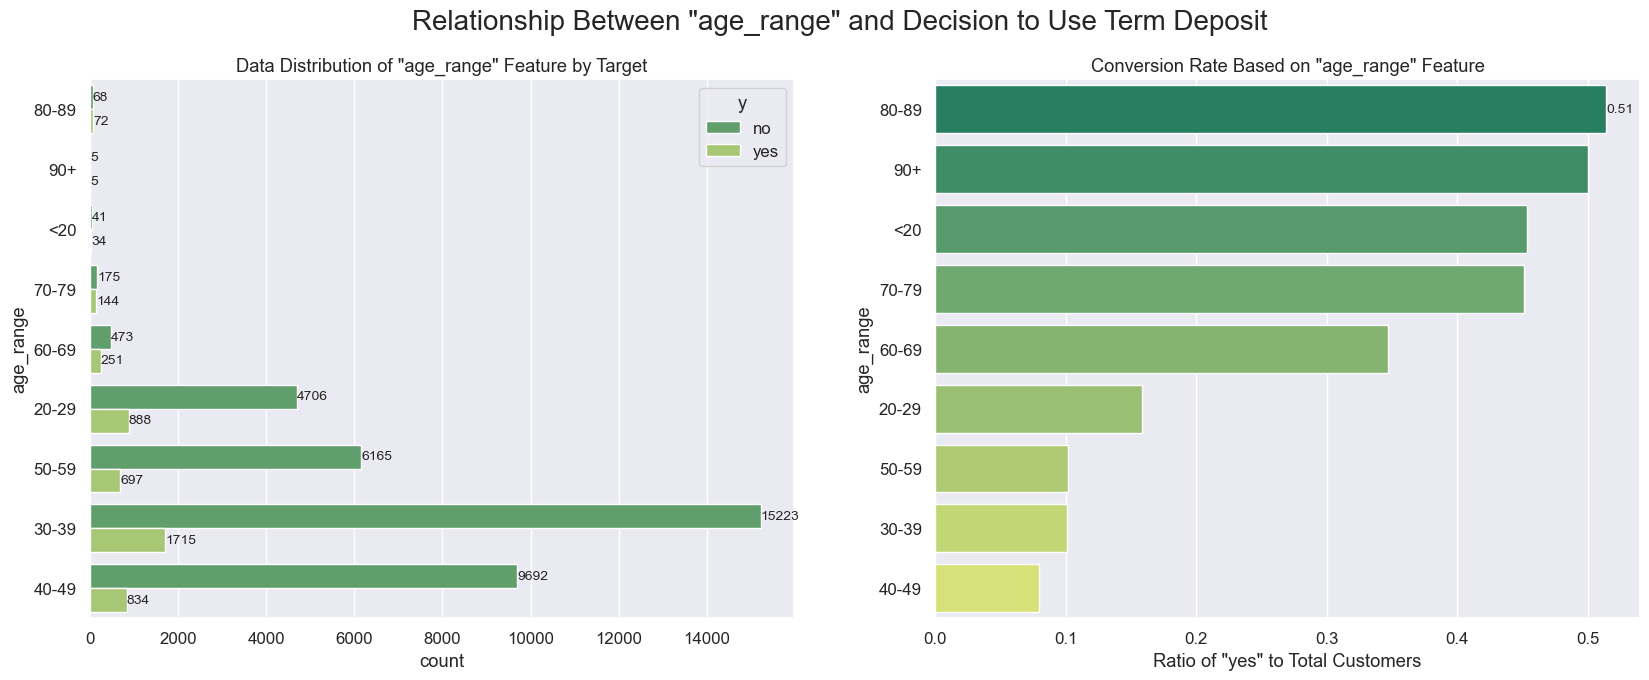

In [24]:
# Create age_range column (example bins, adjust as needed)
bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['<20', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90+']
df['age_range'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)
# Calculate conversion rate (CVR) for each age_range
dfratio = (
    df.groupby('age_range')['y']
    .value_counts(normalize=True)
    .unstack()
    .fillna(0)
    .rename(columns={'yes': 'ratio'})
    .reset_index()
)

# If you only want the ratio of 'yes' per age_range:
dfratio = (
    df[df['y'].isin(['yes', 'no'])]
    .groupby('age_range')['y']
    .apply(lambda x: (x == 'yes').mean())
    .reset_index()
    .rename(columns={'y': 'ratio'})
)
# Visualization of data distribution by target and conversion rate (CVR)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,7))

plt.suptitle('Relationship Between "age_range" and Decision to Use Term Deposit', size=20)

# Conversion Rate
dfratio = df[['age_range','age']].groupby(['age_range'], as_index=False).count()
dfratio['y'] = df[df['y'] == 'yes'][['age_range','age']].groupby(['age_range']).count().values
dfratio['ratio'] = dfratio['y'] / dfratio['age']

dfratio.sort_values('ratio', ascending=False)

# Distribution Chart of the "age_range" Feature with Target
axes[0].set_title('Data Distribution of "age_range" Feature by Target')
plot1 = sns.countplot(hue='y', y='age_range', data=df, 
                      order=dfratio.sort_values(by='ratio', ascending=False)['age_range'],
                      ax=axes[0], palette="summer")

# Annotation
plot1.bar_label(plot1.containers[0], fontsize=10)
plot1.bar_label(plot1.containers[1], fontsize=10)

# Conversion Rate Chart
plot2 = sns.barplot(data=dfratio, y='age_range', x='ratio', 
                    order=dfratio.sort_values(by='ratio', ascending=False)['age_range'],
                    ax=axes[1], palette="summer")
axes[1].set_title('Conversion Rate Based on "age_range" Feature')

# Annotation
plot2.bar_label(plot2.containers[0], fontsize=10, fmt='%.2f')

# Show label
plt.xlabel('Ratio of "yes" to Total Customers')

plt.show()




### Insight

* Dari **grafik distribusi (kiri)**, terlihat bahwa bank paling banyak menargetkan nasabah usia **30–39**, **40–49**, dan **50–59** untuk penawaran deposito berjangka — semuanya masuk dalam kategori **usia produktif**.

* Namun, **grafik conversion rate (CVR) (kanan)** menunjukkan cerita yang berbeda. **CVR tertinggi** justru terdapat pada kelompok usia:
  - **80–89 tahun**: ~0,51
  - **90 tahun ke atas**
  - **<20 tahun**
  - **70–79 tahun**
  
  Kelompok-kelompok ini secara signifikan melampaui segmen usia produktif dalam hal tingkat konversi.

* **Kelompok lansia (70–89 dan 90+)** kemungkinan besar lebih menyukai produk keuangan berisiko rendah seperti deposito berjangka, sehingga mereka lebih mudah menerima penawaran. Sementara itu, **nasabah usia sangat muda (<20)** mungkin mulai tertarik pada produk investasi berisiko rendah, dengan deposito menjadi “pintu masuk” yang aman.

* Sebaliknya, **kelompok usia produktif (30–59 tahun)** justru memiliki **conversion rate yang lebih rendah** meski paling sering ditargetkan. Hal ini bisa disebabkan karena mereka cenderung memilih investasi dengan risiko dan potensi imbal hasil yang lebih tinggi, seperti saham, reksadana, atau instrumen keuangan lainnya daripada deposito berjangka.


### Fitur `job`

Kita akan menganalisis hubungan antara fitur `job` (pekerjaan) dan variabel target (`y`, yaitu langganan deposito berjangka), serta menghitung **conversion rate (CVR)** untuk setiap kategori pekerjaan.

Dalam konteks ini, **conversion rate** mengacu pada proporsi nasabah dalam setiap kelompok pekerjaan yang berlangganan deposito berjangka — dihitung sebagai jumlah konversi sukses dibagi dengan total jumlah nasabah dalam kelompok pekerjaan tersebut.

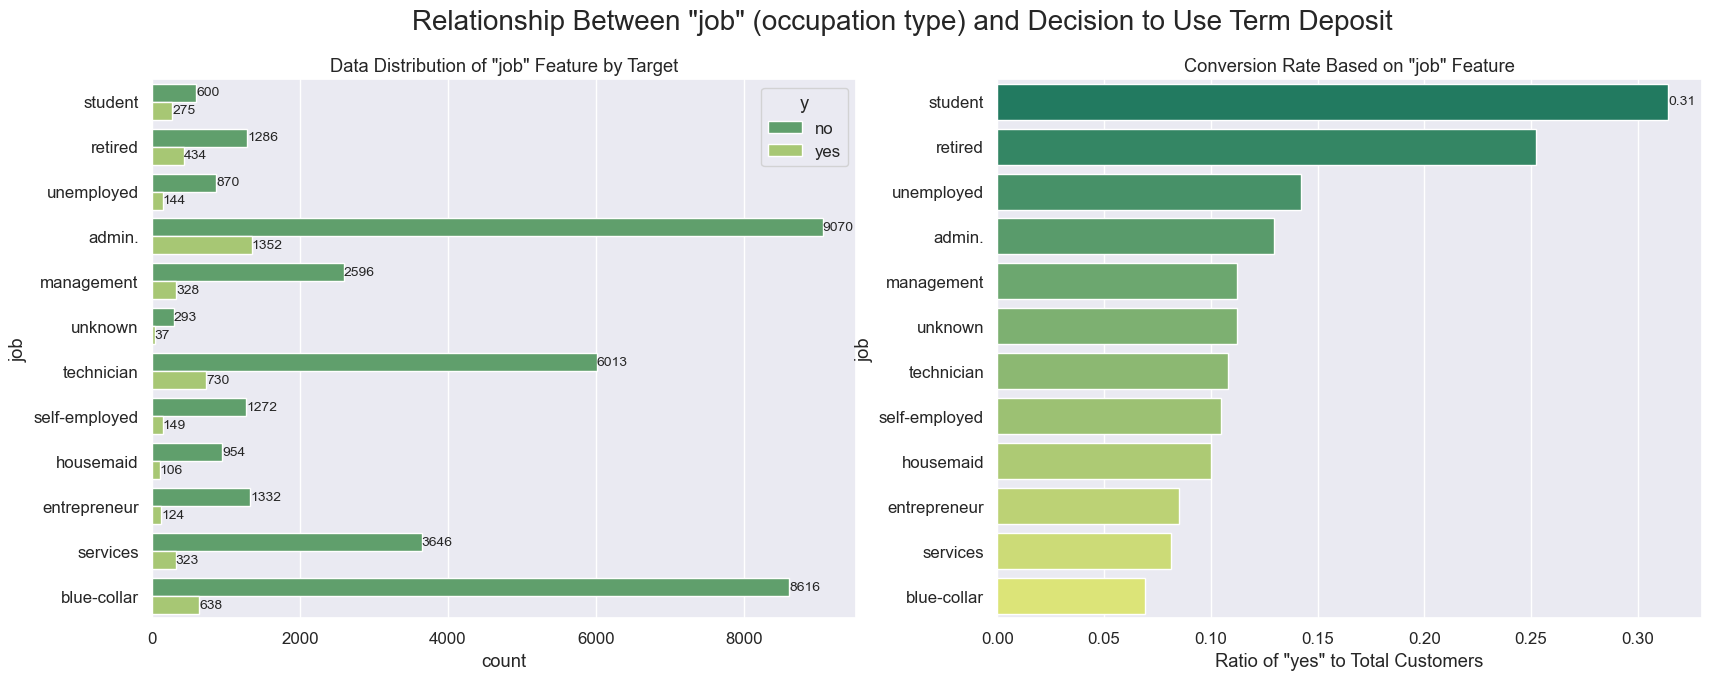

In [25]:
# Visualization of data distribution by target and conversion rate (CVR)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,7))

plt.suptitle('Relationship Between "job" (occupation type) and Decision to Use Term Deposit', size=20)

# Conversion Rate
dfratio = df[['job', 'age']].groupby(['job'], as_index=False).count()
dfratio['y'] = df[df['y'] == 'yes'][['job', 'age']].groupby(['job']).count().values
dfratio['ratio'] = dfratio['y'] / dfratio['age']
dfratio.sort_values('ratio', ascending=False)

# Distribution Chart of the "job" Feature with Target
axes[0].set_title('Data Distribution of "job" Feature by Target')
plot1 = sns.countplot(
    hue='y',
    y='job',
    data=df,
    order=dfratio.sort_values(by='ratio', ascending=False)['job'],
    ax=axes[0],
    palette="summer"
)

# Annotation
plot1.bar_label(plot1.containers[0], fontsize=10)
plot1.bar_label(plot1.containers[1], fontsize=10)

# Conversion Rate Chart
plot2 = sns.barplot(
    data=dfratio,
    y='job',
    x='ratio',
    order=dfratio.sort_values(by='ratio', ascending=False)['job'],
    ax=axes[1],
    palette="summer"
)
axes[1].set_title('Conversion Rate Based on "job" Feature')

# Annotation
plot2.bar_label(plot2.containers[0], fontsize=10, fmt='%.2f')

# Show x-axis label
plt.xlabel('Ratio of "yes" to Total Customers')

plt.show()


### Insight

- Kategori pekerjaan **`admin`** merupakan kelompok nasabah terbanyak yang ditawari produk Deposito Berjangka, sekaligus menunjukkan conversion rate (CVR) yang relatif kuat, sekitar **0,13**. Hal ini menandakan bahwa kelompok admin adalah target yang cukup responsif. Disarankan agar bank terus menawarkan produk deposito atau menciptakan penawaran yang lebih menarik untuk segmen ini.

- Segmen **`blue-collar`** adalah kelompok pekerjaan kedua yang paling sering ditargetkan penawaran deposito. Namun, kelompok ini memiliki **conversion rate terendah** di antara seluruh kategori pekerjaan. Ini menunjukkan adanya kesenjangan antara minat dan engagement, sehingga bank perlu mempertimbangkan strategi pemasaran atau pendekatan yang berbeda agar dapat meningkatkan minat di kelompok ini.

- **`Student`** dan **`retired`** menunjukkan **conversion rate tertinggi**, masing-masing sebesar **0,31** dan **0,25**. Temuan ini sejalan dengan insight pada fitur `age`, di mana kelompok usia **15–24** (didominasi pelajar/mahasiswa) dan **65–74** (didominasi pensiunan) memang paling besar kemungkinan menerima penawaran deposito.

- Menariknya, kelompok **`unemployed`** menempati posisi conversion rate tertinggi ketiga, yaitu **0,14**. Hal ini mungkin disebabkan oleh kecenderungan memilih produk keuangan berisiko rendah, seperti deposito, yang menawarkan keamanan dan prediktabilitas.

- Kategori pekerjaan **`unknown`** juga memiliki CVR yang relatif tinggi. Hal ini mengindikasikan adanya potensi masalah kualitas data, sehingga bank sebaiknya meningkatkan praktik pencatatan data, khususnya dalam merekam informasi pekerjaan nasabah.

---


### `marital` features

We will examine the relationship between the `marital` feature and the `target` (term deposit subscription), as well as analyze the **conversion rate (CVR)** for each marital status group.

In this context, the **conversion rate (CVR)** refers to the proportion of customers within each marital category who subscribed to a term deposit — calculated as the number of successful conversions divided by the total number of customers in that group.

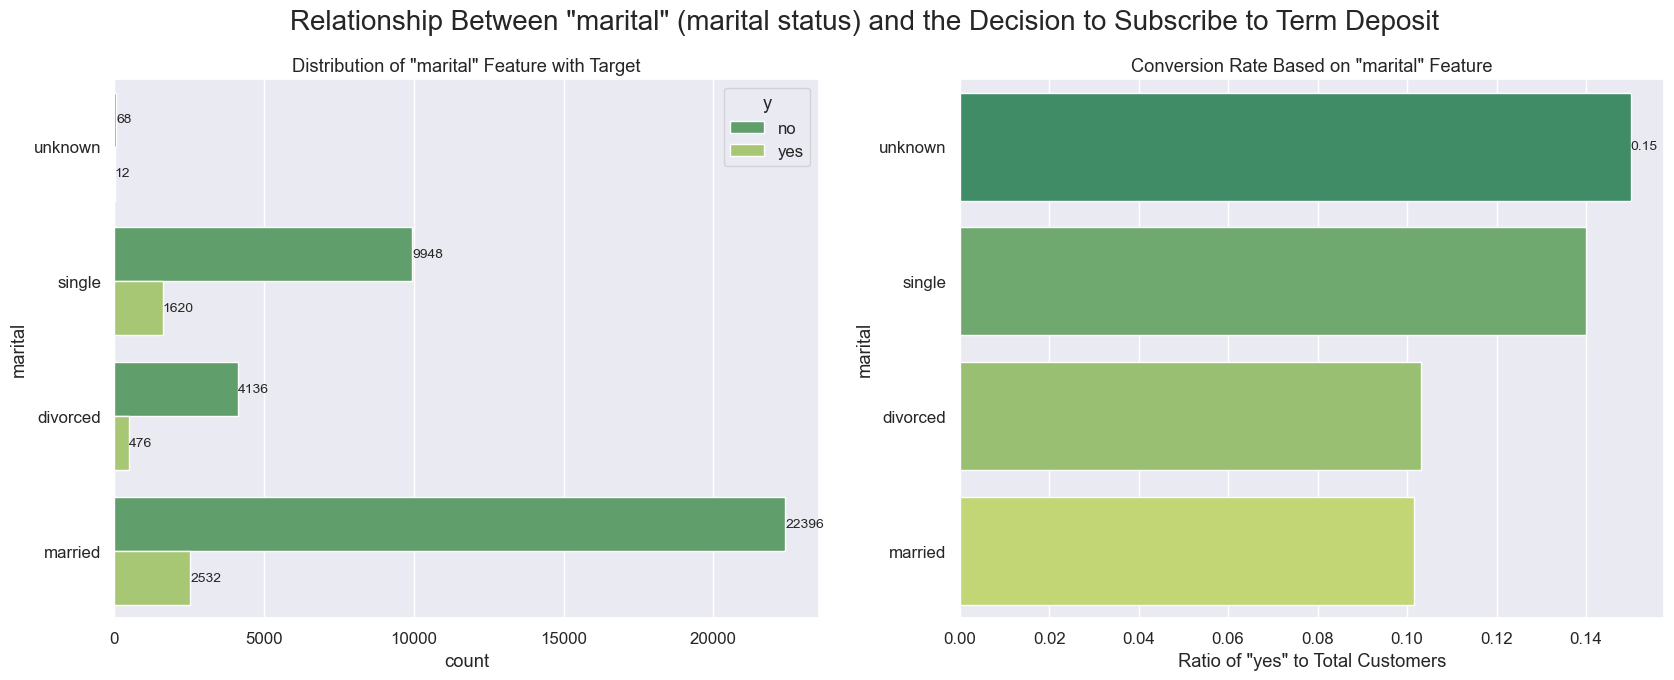

In [26]:
# Visualization of data distribution toward the target and conversion rate (CVR)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,7))

plt.suptitle('Relationship Between "marital" (marital status) and the Decision to Subscribe to Term Deposit', size=20)

# Conversion Rate
dfratio = df[['marital','age']].groupby(['marital'], as_index=False).count()
dfratio['y'] = df[df['y'] == 'yes'][['marital','age']].groupby(['marital']).count().values
dfratio['ratio'] = dfratio['y'] / dfratio['age']
dfratio.sort_values('ratio', ascending=False)

# Chart: Distribution of 'marital' feature with Target
axes[0].set_title('Distribution of "marital" Feature with Target')
plot1 = sns.countplot(hue='y', y='marital', data=df, 
                      order=dfratio.sort_values(by='ratio', ascending=False)['marital'],
                      ax=axes[0], palette="summer")
# Annotation
plot1.bar_label(plot1.containers[0], fontsize=10)
plot1.bar_label(plot1.containers[1], fontsize=10)

# Chart: Conversion Rate
plot2 = sns.barplot(data=dfratio, y='marital', x='ratio',
                    order=dfratio.sort_values(by='ratio', ascending=False)['marital'],
                    ax=axes[1], palette="summer")
axes[1].set_title('Conversion Rate Based on "marital" Feature')
# Annotation
plot2.bar_label(plot2.containers[0], fontsize=10, fmt='%.2f')
# Show x-axis label
plt.xlabel('Ratio of "yes" to Total Customers')

plt.show()


### Insight

- Nasabah dengan status **`married`** merupakan kelompok yang paling sering ditawari produk Deposito Berjangka, dengan jumlah sekitar **24.921 nasabah**. Temuan ini sejalan dengan insight pada fitur **`age`**, di mana kelompok usia yang paling sering ditargetkan adalah **25–39 tahun**, yang umumnya sudah berstatus menikah.

- Nasabah dengan **status pernikahan tidak diketahui (`unknown`)** memiliki **conversion rate (CVR) tertinggi**, yaitu **0,15**. Hal ini menandakan pentingnya perusahaan untuk lebih teliti dalam mengumpulkan dan memelihara data nasabah, khususnya terkait status pernikahan.

- Nasabah berstatus **`single`** juga menunjukkan CVR yang cukup tinggi, sekitar **0,14**. Hal ini kemungkinan karena individu yang masih single umumnya memiliki komitmen keuangan yang lebih sedikit, sehingga dapat mengalokasikan lebih banyak dana untuk investasi seperti deposito berjangka.

---


### `education` Features

Kita akan menganalisis hubungan antara fitur `education` (tingkat pendidikan) dengan variabel target, serta mengevaluasi conversion rate (CVR) untuk setiap kelompok pendidikan.  
Dalam konteks ini, CVR merepresentasikan proporsi nasabah yang berhasil berlangganan deposito berjangka dibandingkan dengan total nasabah di masing-masing kategori pendidikan.


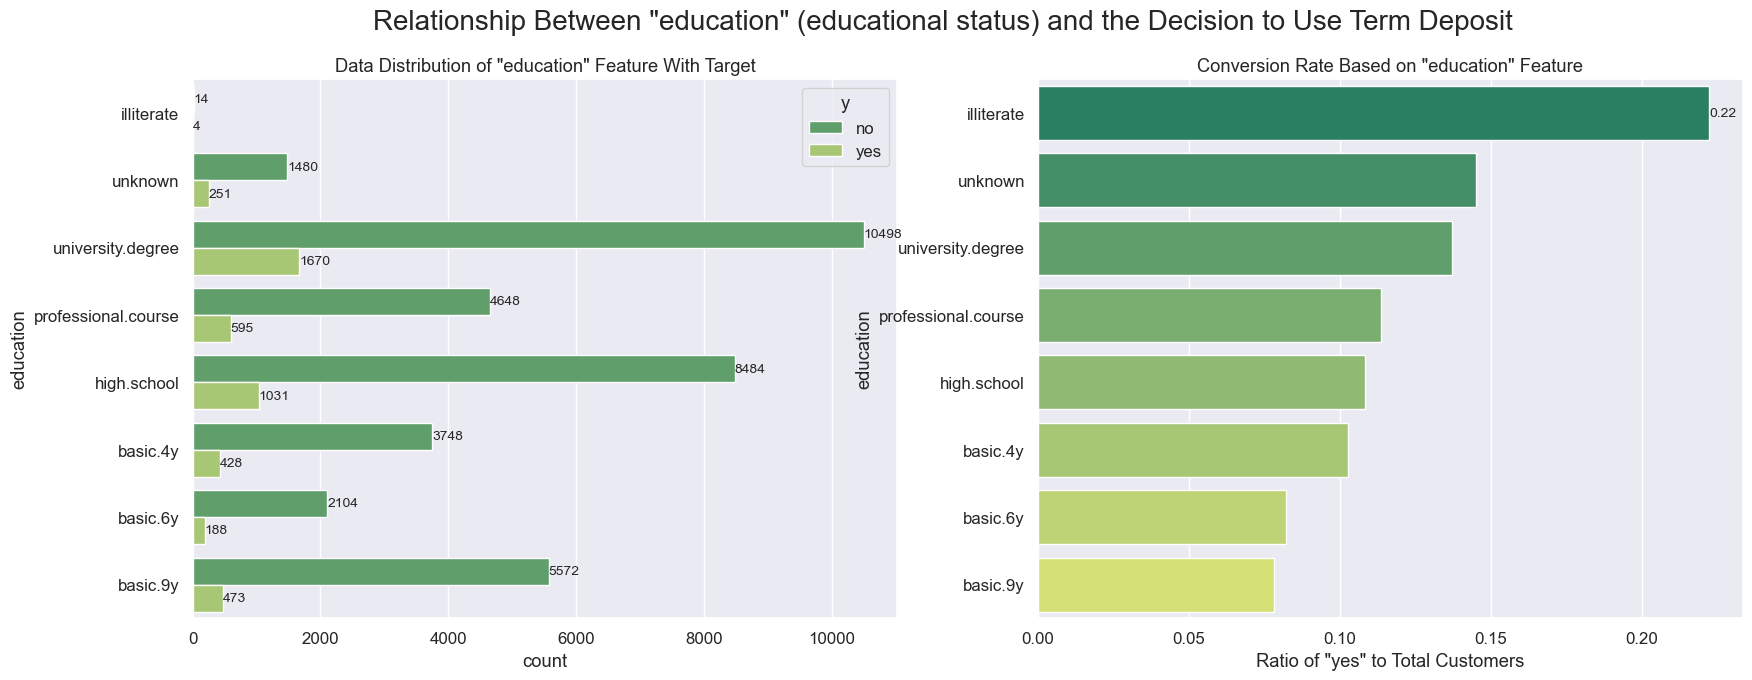

In [27]:
# Visualization of data distribution against target and conversion rate (CVR)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 7))

plt.suptitle('Relationship Between "education" (educational status) and the Decision to Use Term Deposit', size=20)

# Conversion Rate
dfratio = df[['education', 'age']].groupby(['education'], as_index=False).count()
dfratio['y'] = df[df['y'] == 'yes'][['education', 'age']].groupby(['education']).count().values
dfratio['ratio'] = dfratio['y'] / dfratio['age']
dfratio.sort_values('ratio', ascending=False)

# Chart of education feature distribution with target
axes[0].set_title('Data Distribution of "education" Feature With Target')
plot1 = sns.countplot(hue='y', y='education', data=df,
                      order=dfratio.sort_values(by='ratio', ascending=False)['education'],
                      ax=axes[0], palette="summer")
# Annotation
plot1.bar_label(plot1.containers[0], fontsize=10)
plot1.bar_label(plot1.containers[1], fontsize=10)

# Chart of Conversion Rate
plot2 = sns.barplot(data=dfratio, y='education', x='ratio',
                    order=dfratio.sort_values(by='ratio', ascending=False)['education'],
                    ax=axes[1], palette="summer")
axes[1].set_title('Conversion Rate Based on "education" Feature')
# Annotation
plot2.bar_label(plot2.containers[0], fontsize=10, fmt='%.2f')
# Show label
plt.xlabel('Ratio of "yes" to Total Customers')

plt.show()


### Insight

* Berdasarkan grafik di atas, nasabah dengan tingkat pendidikan **`university.degree`** adalah kelompok yang paling sering ditawari produk Deposito Berjangka. Dari grafik conversion rate, kelompok pendidikan ini juga memiliki salah satu CVR tertinggi, yaitu **0,14**.
* Nasabah dengan status pendidikan **`unknown`** memiliki CVR tertinggi kedua, yaitu **0,15**. Sekali lagi, hal ini menunjukkan pentingnya perusahaan untuk lebih cermat dan teliti dalam mencatat data identitas nasabah, terutama terkait riwayat pendidikan.
* Nasabah dengan status pendidikan **`illiterate`** (tidak bisa baca-tulis) memiliki CVR tertinggi, yaitu **0,22**. Namun, sulit menarik kesimpulan yang valid dari temuan ini karena jumlah nasabah dalam kelompok ini hanya **18 orang**, atau sekitar **0,04% dari total populasi** dalam dataset.

---


### `deafault` Features

Kita akan mengeksplorasi hubungan antara fitur `education` (pendidikan) dengan variabel target, serta menganalisis conversion rate (CVR) untuk setiap kelompok pendidikan.

Pada kasus ini, Conversion Rate (CVR) mengacu pada proporsi nasabah yang berhasil dikonversi (berlangganan Deposito Berjangka) dibandingkan dengan total jumlah nasabah di setiap kelompok pendidikan.


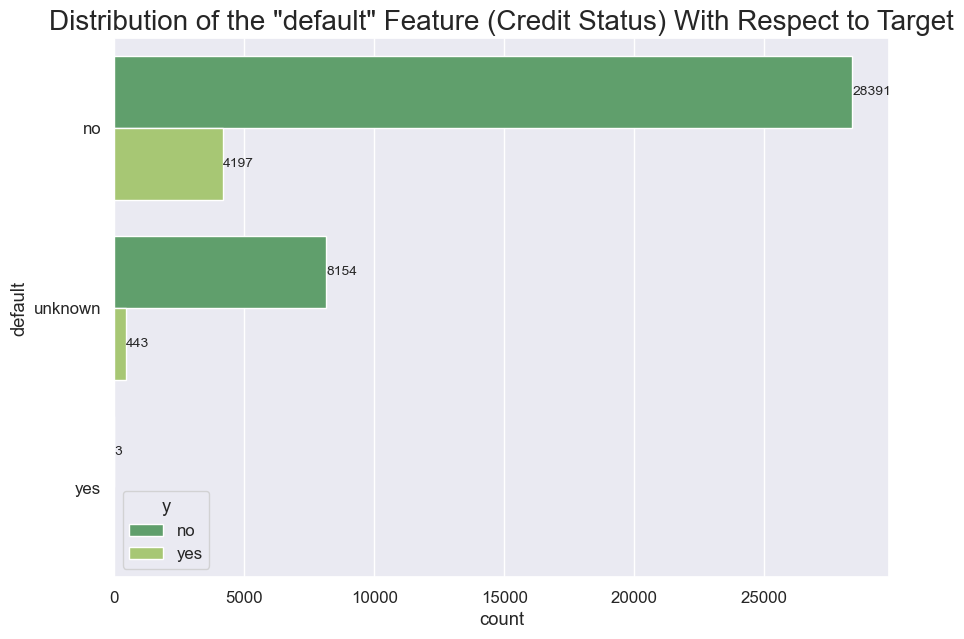

Summary Data for the 'default' Feature:
Number of Records:
default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64


In [28]:
fig, ax = plt.subplots(figsize=(10, 7))

plt.title('Distribution of the "default" Feature (Credit Status) With Respect to Target', size=20)

# Count the number of customers in each "default" category
default_counts = df['default'].value_counts()

# Distribution Plot of the "default" feature with Target (horizontal view)
plot1 = sns.countplot(data=df, y='default', hue='y', order=default_counts.index, palette="summer", orient='h')
# Annotation
plot1.bar_label(plot1.containers[0], fontsize=10)
plot1.bar_label(plot1.containers[1], fontsize=10)

plt.show()

# Count the number of customers in each "default" and "y" category
default_counts = df['default'].value_counts()
y_counts = df['y'].value_counts()

# Display summary data
print("Summary Data for the 'default' Feature:")
print("Number of Records:")
print(default_counts)


In [29]:
df[df['default'] == 'yes']

age         job  marital            education default housing loan  \
21580   48  technician  married  professional.course     yes      no   no   
21581   48  technician  married  professional.course     yes     yes   no   
24866   31  unemployed  married          high.school     yes      no   no   

        contact month day_of_week  ...  pdays  previous     poutcome  \
21580  cellular   aug         tue  ...    999         0  nonexistent   
21581  cellular   aug         tue  ...    999         0  nonexistent   
24866  cellular   nov         tue  ...    999         1      failure   

       emp.var.rate cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  \
21580          1.04         93.444          -36.1      4.963          NaN  no   
21581          1.04         93.444          -36.1      4.963          NaN  no   
24866         -0.10            NaN          -42.0      4.153          NaN  no   

       age_range  
21580      40-49  
21581      40-49  
24866      30-39  

[3 rows x 22 columns]

### Insight

Berdasarkan data di atas, hanya terdapat **3 nasabah** yang pernah mengalami gagal bayar (default) pada kredit sebelumnya, yang berarti hanya **0,0072%** dari seluruh dataset. Selain itu, tidak ada satu pun dari nasabah ini yang mengambil produk deposito berjangka, sehingga **conversion rate (CVR)** mereka adalah **0%**.

Temuan ini sejalan dengan pemahaman umum bahwa nasabah dengan riwayat gagal bayar cenderung mengalami kesulitan keuangan, sehingga kecil kemungkinan mereka memiliki dana berlebih untuk diinvestasikan dalam produk deposito jangka panjang.

Fitur ini memberikan insight penting untuk mengidentifikasi segmen nasabah yang sangat kecil kemungkinannya untuk dikonversi. Berdasarkan dataset ini, dapat disimpulkan:

> **"Nasabah dengan riwayat gagal bayar kredit hampir tidak pernah berlangganan deposito berjangka."**

Disarankan agar nasabah dengan riwayat gagal bayar **lebih dulu menyelesaikan masalah kreditnya sebelum ditawari produk deposito jangka panjang**.

---


`housing` Features

Kita akan mengeksplorasi hubungan antara fitur `housing` (kepemilikan kredit rumah) dengan variabel target, serta menganalisis conversion rate (CVR) untuk setiap kelompok.

Dalam konteks ini, Conversion Rate (CVR) mengacu pada proporsi nasabah yang berlangganan Deposito Berjangka dibandingkan dengan total jumlah nasabah pada masing-masing kelompok status kepemilikan kredit rumah.


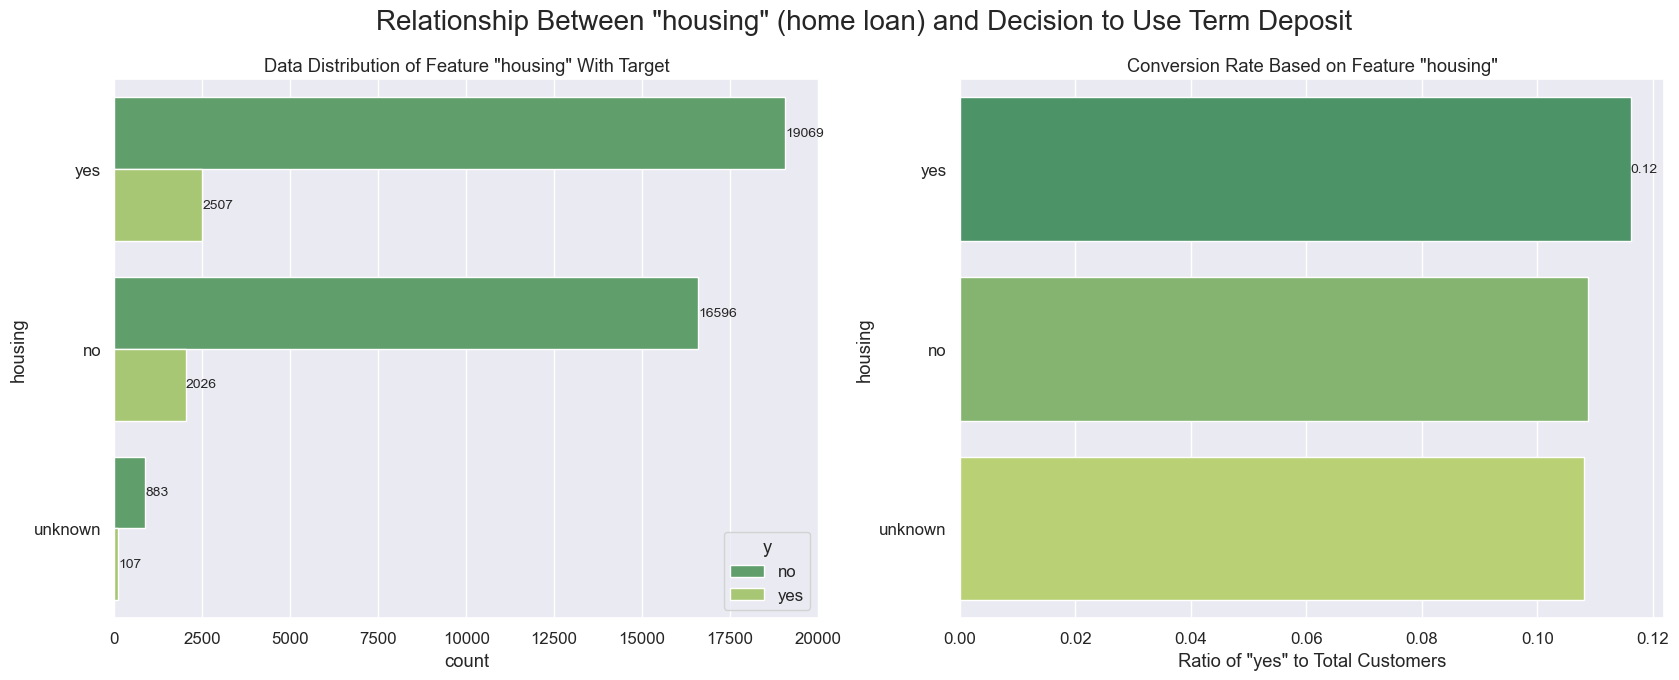

In [30]:
# Visualization of data distribution against target and conversion rate (CVR)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,7))

plt.suptitle('Relationship Between "housing" (home loan) and Decision to Use Term Deposit', size=20)

# Conversion Rate
dfratio = df[['housing','age']].groupby(['housing'], as_index=False).count()
dfratio['y'] = df[df['y'] == 'yes'][['housing','age']].groupby(['housing']).count().values
dfratio['ratio'] = dfratio['y'] / dfratio['age']
dfratio.sort_values('ratio', ascending=False)

# Distribution chart of "housing" feature with target
axes[0].set_title('Data Distribution of Feature "housing" With Target')
plot1 = sns.countplot(
    hue='y', 
    y='housing', 
    data=df, 
    order=dfratio.sort_values(by='ratio', ascending=False)['housing'],
    ax=axes[0],
    palette="summer"
)
# Annotation
plot1.bar_label(plot1.containers[0], fontsize=10)
plot1.bar_label(plot1.containers[1], fontsize=10)

# Conversion Rate Chart
plot2 = sns.barplot(
    data=dfratio, 
    y='housing', 
    x='ratio', 
    order=dfratio.sort_values(by='ratio', ascending=False)['housing'],
    ax=axes[1],
    palette="summer"
)
axes[1].set_title('Conversion Rate Based on Feature "housing"')
# Annotation
plot2.bar_label(plot2.containers[0], fontsize=10, fmt='%.2f')
# Show label
plt.xlabel('Ratio of "yes" to Total Customers')

plt.show()


### Insight

Berdasarkan grafik di atas serta visualisasi conversion rate, **tidak ditemukan perbedaan signifikan** antara kelompok. Namun, dapat dicatat bahwa nasabah **tanpa kredit rumah** menunjukkan conversion rate yang sedikit lebih tinggi.

Untuk melihat hubungan yang lebih akurat antara kepemilikan kredit rumah dan kemungkinan berlangganan deposito jangka panjang, akan dilakukan **uji hipotesis Chi-Square**:

**"Untuk memastikan secara statistik apakah terdapat hubungan antara kepemilikan kredit rumah dengan kemungkinan berlangganan deposito jangka panjang, akan dilakukan uji hipotesis Chi-Square."**


### Hipotesis

- **H0 (Hipotesis Nol):** Tidak terdapat hubungan antara kepemilikan kredit rumah dengan kecenderungan nasabah untuk berlangganan deposito jangka panjang.
- **Ha (Hipotesis Alternatif):** Terdapat hubungan antara kepemilikan kredit rumah dengan kecenderungan nasabah untuk berlangganan deposito jangka panjang.


In [31]:
df_housing = df[['housing','y']]
df_housing['yes'] = df_housing['y'].apply(lambda x : 1 if x == 'yes' else 0)
df_housing['no'] = df_housing['y'].apply(lambda x : 1 if x == 'no' else 0)
df_housing = df_housing.drop(columns = 'y')
df_housing_chi = df_housing.groupby('housing').sum()
df_housing_chi

yes     no
housing             
no       2026  16596
unknown   107    883
yes      2507  19069

In [32]:
# Perform Chi-Square Test
stat, pvalue, dof, expected = chi2_contingency(df_housing_chi)

# Conclusion:
if pvalue > 0.05:
    print(f'''
          p-value = {pvalue:.5f}. p-value > 0.05. There is not enough evidence to reject H0.
          We do NOT have sufficient evidence to state that there is a relationship between taking a housing loan and the tendency to subscribe to a long-term deposit (the proportions are not significantly different).
          ''')
else:
    print(f'''
          p-value = {pvalue:.5f}. p-value <= 0.05. We have sufficient evidence to reject H0.
          There is a relationship between taking a housing loan and the tendency to subscribe to a long-term deposit (the proportions are significantly different).
          ''')



          p-value = 0.05829. p-value > 0.05. There is not enough evidence to reject H0.
          We do NOT have sufficient evidence to state that there is a relationship between taking a housing loan and the tendency to subscribe to a long-term deposit (the proportions are not significantly different).
          


### Insight

Berdasarkan data di atas, hasil analisis menunjukkan **tidak terdapat hubungan yang signifikan** antara kepemilikan kredit rumah dengan kecenderungan nasabah untuk berlangganan deposito berjangka. Meskipun p-value yang diperoleh cukup kecil, kita tetap dapat menyimpulkan bahwa mungkin ada sedikit hubungan antara kepemilikan kredit rumah dengan kecenderungan nasabah untuk berdeposito.

Namun, berdasarkan pengetahuan domain, secara logis dapat diasumsikan bahwa individu yang masih memiliki kewajiban cicilan kredit rumah cenderung **kurang berminat** untuk menempatkan dana pada deposito, karena mereka perlu memprioritaskan pelunasan pinjaman yang ada terlebih dahulu.


### `loan` Features

Kita akan mengecek distribusi dari fitur `loan`

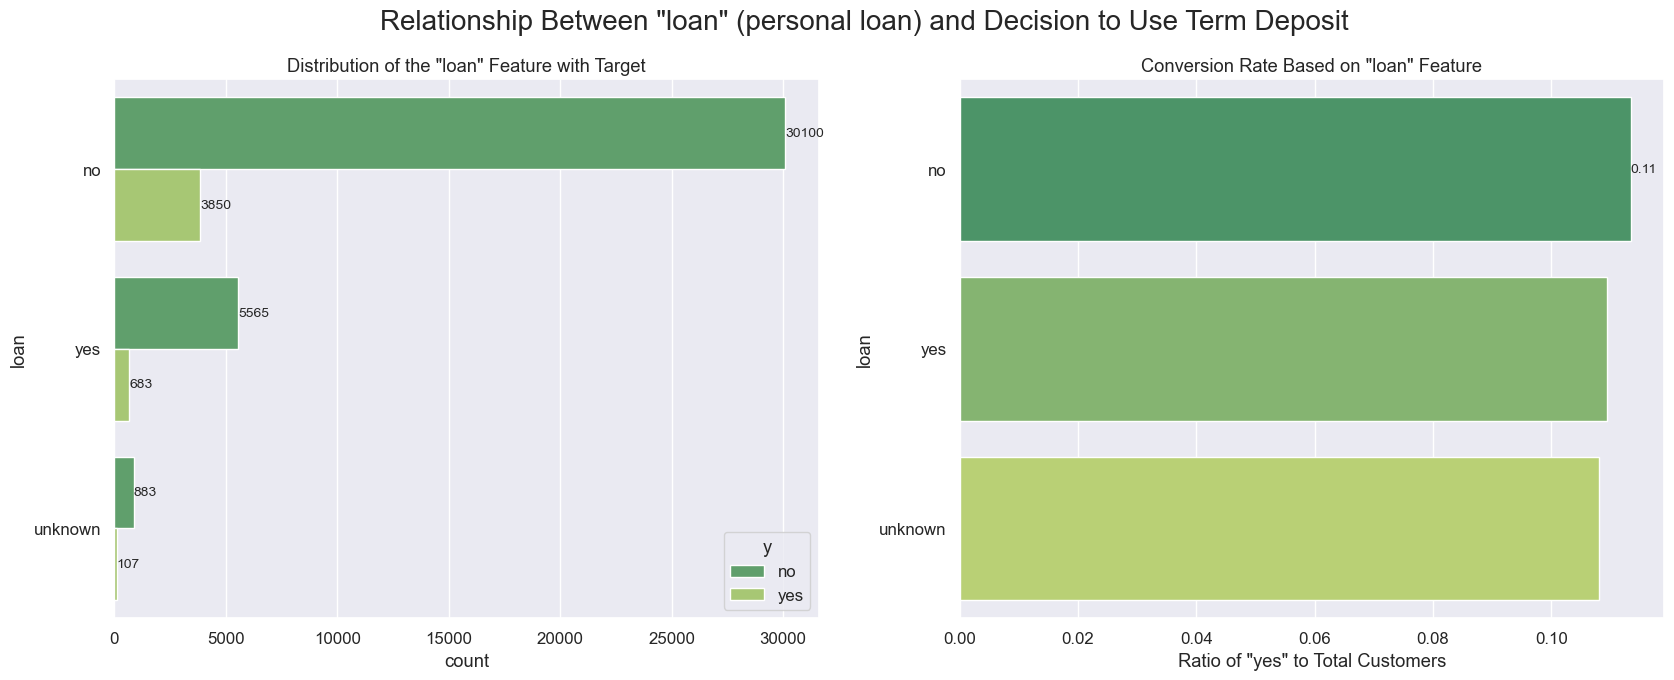

In [33]:
# Visualization of data distribution against the target and conversion rate (CVR)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 7))

plt.suptitle('Relationship Between "loan" (personal loan) and Decision to Use Term Deposit', size=20)

# Conversion Rate
dfratio = df[['loan', 'age']].groupby(['loan'], as_index=False).count()
dfratio['y'] = df[df['y'] == 'yes'][['loan', 'age']].groupby(['loan']).count().values
dfratio['ratio'] = dfratio['y'] / dfratio['age']
dfratio.sort_values('ratio', ascending=False)

# Distribution Chart of the "loan" Feature with Target
axes[0].set_title('Distribution of the "loan" Feature with Target')
plot1 = sns.countplot(hue='y', y='loan', data=df, order=dfratio.sort_values(by='ratio', ascending=False)['loan'],
                      ax=axes[0], palette="summer")
# Annotation
plot1.bar_label(plot1.containers[0], fontsize=10)
plot1.bar_label(plot1.containers[1], fontsize=10)

# Conversion Rate Chart
plot2 = sns.barplot(data=dfratio, y='loan', x='ratio', order=dfratio.sort_values(by='ratio', ascending=False)['loan'],
                    ax=axes[1], palette="summer")
axes[1].set_title('Conversion Rate Based on "loan" Feature')
# Annotation
plot2.bar_label(plot2.containers[0], fontsize=10, fmt='%.2f')
# Show label
plt.xlabel('Ratio of "yes" to Total Customers')

plt.show()


### Insight

Berdasarkan grafik di atas, **tidak terdapat perbedaan yang mencolok** pada conversion rate di antara setiap kategori. Namun, dapat diamati bahwa individu **tanpa kredit pribadi** cenderung memiliki **conversion rate yang sedikit lebih tinggi**.

Untuk mengetahui apakah benar terdapat hubungan signifikan antara kepemilikan kredit pribadi dan kecenderungan berlangganan deposito berjangka, akan dilakukan **uji hipotesis chi-square**.

**"Untuk memastikan secara statistik apakah terdapat hubungan antara kepemilikan kredit pribadi dan kecenderungan berlangganan deposito berjangka, akan dilakukan uji chi-square."**


In [34]:
df_loan = df[['loan','y']]
df_loan['yes'] = df_loan['y'].apply(lambda x : 1 if x == 'yes' else 0)
df_loan['no'] = df_loan['y'].apply(lambda x : 1 if x == 'no' else 0)
df_loan = df_loan.drop(columns = 'y')
df_loan_chi = df_loan.groupby('loan').sum()
df_loan_chi

yes     no
loan                
no       3850  30100
unknown   107    883
yes       683   5565

**Hipotesis:**

- **H0 (Hipotesis Nol):** Tidak terdapat hubungan antara kepemilikan kredit pribadi dengan kecenderungan nasabah untuk berlangganan deposito berjangka.
- **Ha (Hipotesis Alternatif):** Terdapat hubungan antara kepemilikan kredit pribadi dengan kecenderungan nasabah untuk berlangganan deposito berjangka.


In [35]:
stat, pvalue, dof, expected = chi2_contingency(df_loan_chi)

# Conclusion:
if pvalue > 0.05:
    print(f'''
          p-value = {pvalue:.5f}. p-value > 0.05. Conclusion: we fail to reject H0.
          We do not have sufficient evidence to state that there is a relationship between taking a loan and the final outcome (they are independent).
          (The proportions are not significantly different)
          ''')
else:
    print(f'''
          p-value = {pvalue:.5f}. p-value <= 0.05. Conclusion: we reject H0.
          We have sufficient evidence to state that there is a relationship between taking a loan and the final outcome (they are dependent).
          (The proportions are significantly different)
          ''')



          p-value = 0.57868. p-value > 0.05. Conclusion: we fail to reject H0.
          We do not have sufficient evidence to state that there is a relationship between taking a loan and the final outcome (they are independent).
          (The proportions are not significantly different)
          


### Insight

Berdasarkan data di atas, dapat disimpulkan bahwa **tidak terdapat hubungan yang signifikan** antara keputusan seseorang untuk mengambil kredit pribadi dengan kecenderungan mereka berlangganan deposito berjangka. Kesimpulan ini didukung oleh nilai p-value yang tinggi, yang menunjukkan bahwa asosiasi antara kedua variabel ini **tidak signifikan secara statistik**.

Meskipun secara pengetahuan umum mungkin diasumsikan bahwa pemegang kredit akan berperilaku berbeda—misalnya, mencari imbal hasil yang lebih tinggi dibandingkan deposito—hasil uji statistik menunjukkan hal yang berbeda. Dengan demikian, pada dataset ini, kepemilikan kredit pribadi **tidak berkaitan secara bermakna** dengan keputusan untuk mengambil deposito berjangka.


### B. **Analysis of contact methods used**  
   (`contact`, `month`, `day_of_week`, `duration`)

### `contact` Features

Kita akan menganalisis fitur **`contact`** untuk melihat distribusi data dan conversion rate pada setiap metode kontak yang digunakan.


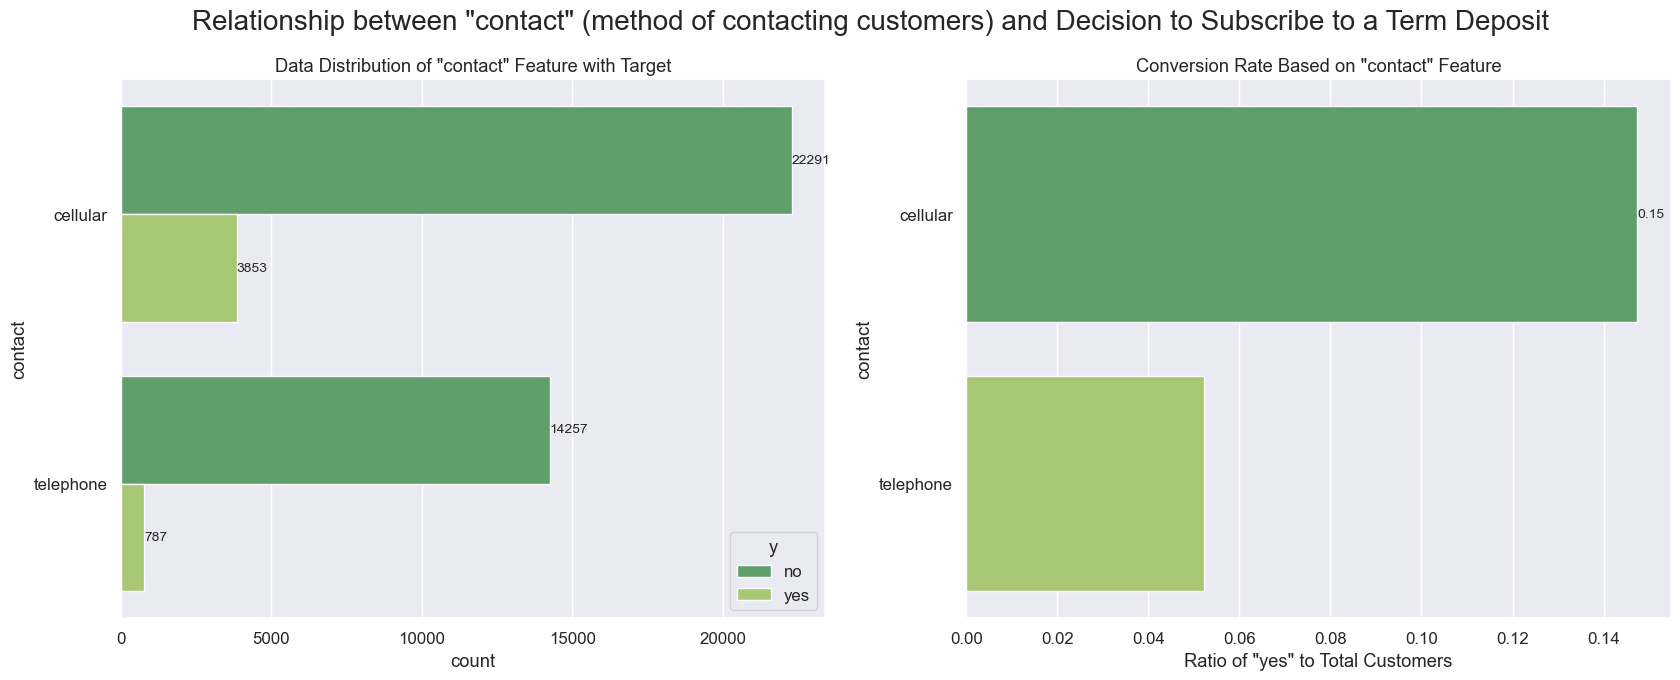

In [36]:
# Visualization of data distribution in relation to the target and conversion rate (CVR)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 7))

plt.suptitle('Relationship between "contact" (method of contacting customers) and Decision to Subscribe to a Term Deposit', size=20)

# Conversion Rate
dfratio = df[['contact', 'age']].groupby(['contact'], as_index=False).count()
dfratio['y'] = df[df['y'] == 'yes'][['contact', 'age']].groupby(['contact']).count().values
dfratio['ratio'] = dfratio['y'] / dfratio['age']
dfratio.sort_values('ratio', ascending=False)

# Plot of the "contact" feature distribution with the Target
axes[0].set_title('Data Distribution of "contact" Feature with Target')
plot1 = sns.countplot(hue='y', y='contact', data=df, order=dfratio.sort_values(by='ratio', ascending=False)['contact'],
                      ax=axes[0], palette="summer")
# Annotation
plot1.bar_label(plot1.containers[0], fontsize=10)
plot1.bar_label(plot1.containers[1], fontsize=10)

# Plot of Conversion Rate
plot2 = sns.barplot(data=dfratio, y='contact', x='ratio', order=dfratio.sort_values(by='ratio', ascending=False)['contact'],
                    ax=axes[1], palette="summer")
axes[1].set_title('Conversion Rate Based on "contact" Feature')
# Annotation
plot2.bar_label(plot2.containers[0], fontsize=10, fmt='%.2f')
# Show label
plt.xlabel('Ratio of "yes" to Total Customers')

plt.show()


### Insight

Dari grafik di atas, dapat disimpulkan bahwa bank telah mengambil langkah yang tepat dengan lebih sering menghubungi nasabah melalui ponsel (cellular) dibandingkan telepon rumah (landline). Hal ini terlihat dari conversion rate yang jauh lebih tinggi—sekitar tiga kali lipat—pada nasabah yang dihubungi via ponsel dibandingkan telepon rumah.

Sebagai rekomendasi ke depan, mengingat conversion rate yang sangat rendah pada nasabah yang dihubungi melalui telepon rumah (hanya sekitar 5%), akan lebih efektif jika bank memprioritaskan penggunaan nomor ponsel saat menghubungi nasabah.


### `month` Features

Kita akan menganalisis fitur **`month`** untuk melihat distribusi data serta conversion rate pada setiap bulan pelaksanaan campaign.

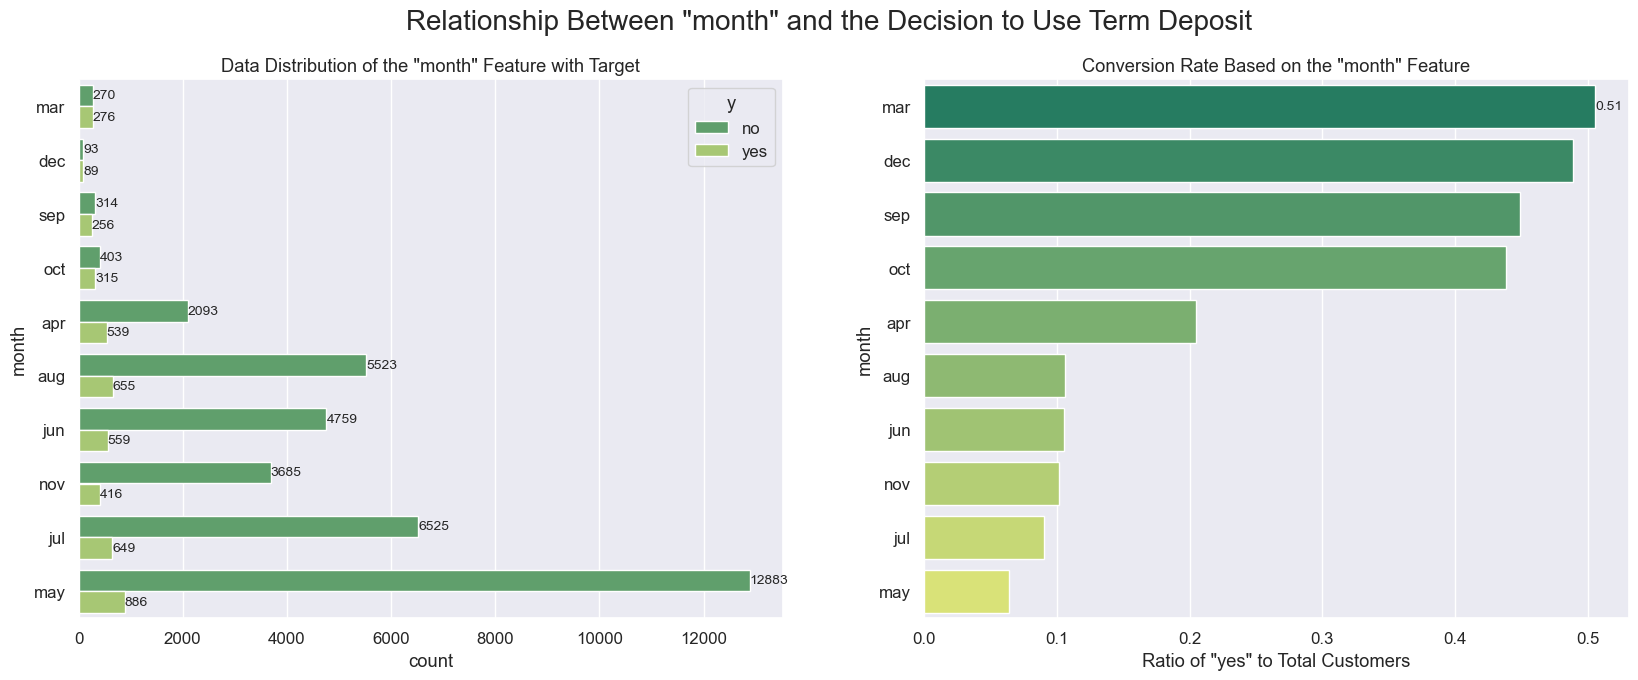

In [37]:
# Visualization of data distribution relative to the target and conversion rate (CVR)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,7))

plt.suptitle('Relationship Between "month" and the Decision to Use Term Deposit', size=20)

# Conversion Rate
dfratio = df[['month','age']].groupby(['month'], as_index=False).count()
dfratio['y'] = df[df['y'] == 'yes'][['month','age']].groupby(['month']).count().values
dfratio['ratio'] = dfratio['y'] / dfratio['age']
dfratio.sort_values('ratio', ascending=False)

# Distribution Chart of the "month" Feature with the Target
axes[0].set_title('Data Distribution of the "month" Feature with Target')
plot1 = sns.countplot(hue='y', y='month', data=df, order=dfratio.sort_values(by='ratio', ascending=False)['month'],
                      ax=axes[0], palette="summer")
# Annotation
plot1.bar_label(plot1.containers[0], fontsize=10)
plot1.bar_label(plot1.containers[1], fontsize=10)

# Conversion Rate Chart
plot2 = sns.barplot(data=dfratio, y='month', x='ratio', order=dfratio.sort_values(by='ratio', ascending=False)['month'],
                    ax=axes[1], palette="summer")
axes[1].set_title('Conversion Rate Based on the "month" Feature')
# Annotation
plot2.bar_label(plot2.containers[0], fontsize=10, fmt='%.2f')
# Show label
plt.xlabel('Ratio of "yes" to Total Customers')

plt.show()


### **Insight**

Dari visualisasi di atas, terlihat adanya variasi **conversion rate** yang cukup jelas tergantung pada **bulan** terakhir nasabah dihubungi. Beberapa bulan seperti **Maret, September, Oktober, dan Desember** menunjukkan **conversion rate yang lebih tinggi**, meskipun jumlah kontak pada bulan-bulan tersebut relatif rendah (sekitar 5% dari total kontak).

Sebaliknya, **Mei** merupakan bulan dengan **jumlah kontak terbanyak**, namun conversion rate-nya justru rendah, menandakan efektivitas kampanye pada bulan tersebut kurang optimal.

---

### **Rekomendasi**

Berdasarkan temuan ini, bank sebaiknya mempertimbangkan:

- **Meningkatkan intensitas kampanye** pada bulan-bulan dengan **conversion rate historis yang tinggi**.
- **Mengurangi frekuensi kontak** pada periode seperti **Mei** yang performanya kurang baik.
- **Menyeimbangkan distribusi kontak** di seluruh bulan agar efektivitas kampanye dapat diukur secara objektif serta membantu manajemen sumber daya akuisisi nasabah.

Selain itu, penting untuk memahami **mengapa kampanye pemasaran bank terkonsentrasi di bulan-bulan tertentu**. Perlu dicatat bahwa pada **Januari dan Februari** tidak terdapat aktivitas kontak sama sekali, menandakan tidak ada kampanye pada periode tersebut.

Untuk menganalisis pola ini lebih lanjut, disarankan untuk mengecek kemungkinan korelasi antara indikator makroekonomi seperti **EURIBOR** dengan fitur **month**.

---

### **Apa itu EURIBOR?**

**EURIBOR (Euro Interbank Offered Rate)** adalah suku bunga acuan yang digunakan di pasar keuangan Eropa. EURIBOR merepresentasikan **rata-rata suku bunga yang bersedia dibayarkan oleh bank-bank Eropa saat meminjam dana antar bank**.

EURIBOR berperan penting dalam:

- Menentukan suku bunga kredit dan hipotek
- Penetapan harga instrumen keuangan dan derivatif
- Penilaian risiko investasi
- Perencanaan keuangan korporasi dan manajemen risiko

Nilai EURIBOR dihitung berdasarkan laporan dari bank-bank utama di zona euro, yang melaporkan suku bunga yang mereka harapkan jika meminjam dana dari bank lain dalam periode waktu tertentu.

EURIBOR tersedia dalam berbagai tenor, termasuk **1 bulan, 3 bulan, 6 bulan, dan 12 bulan**. Indikator ini sangat berpengaruh terhadap **biaya pinjaman** dan pengambilan keputusan keuangan di seluruh kawasan euro.

---


In [38]:
df_month_euribor = df[['euribor3m','month']].groupby('month',as_index=False).mean().reindex([5,0,6,4,3,1,9,8,7,2])
df_month_euribor

month  euribor3m
5   mar   1.006967
0   apr   1.344732
6   may   2.992518
4   jun   4.007922
3   jul   4.177089
1   aug   4.122367
9   sep   0.537753
8   oct   0.890999
7   nov   3.700431
2   dec   0.598993

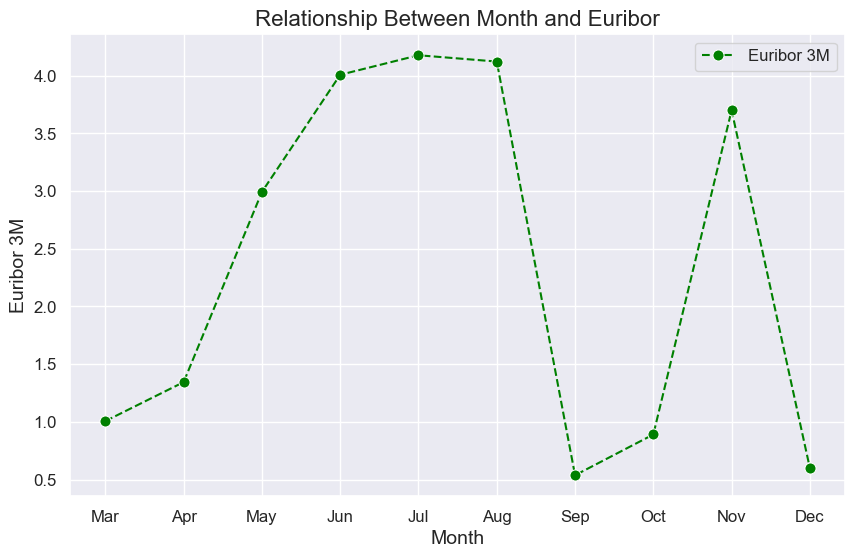

In [39]:
# Visualization of data distribution against the target and conversion rate
plt.figure(figsize=(10, 6))
plt.title('Relationship Between Month and Euribor', fontsize=16)

# Set the line color to green
sns.lineplot(data=df_month_euribor, x='month', y='euribor3m', color='green', linestyle='dashed', marker='o', markersize=8, label='Euribor 3M')

# Set x-axis labels according to month names
plt.xticks(range(10), ['Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize=12)

# Add labels for x and y axes
plt.xlabel('Month', fontsize=14)
plt.ylabel('Euribor 3M', fontsize=14)

# Add legend
plt.legend(fontsize=12)

plt.show()

### Insight

Dari grafik di atas, terlihat bahwa bank cenderung **kurang aktif** menghubungi nasabah pada periode di mana **suku bunga Euribor rendah**, yang umumnya mencerminkan kondisi ekonomi yang stabil. Hal ini mungkin didasarkan pada asumsi bahwa dalam situasi seperti itu, nasabah kurang berminat berinvestasi di deposito berjangka dan lebih tertarik pada instrumen investasi lain yang berpotensi memberikan imbal hasil lebih tinggi.

Namun, **data conversion rate** justru menunjukkan hal berbeda. Ketika **suku bunga Euribor rendah**, **konversi ke produk deposito berjangka tetap relatif tinggi**.

---

### Rekomendasi

Berdasarkan insight ini, bank sebaiknya mempertimbangkan untuk:

- Lebih **proaktif melakukan kontak** dengan nasabah pada periode **suku bunga rendah**, karena ternyata conversion rate tetap menguntungkan.
- Atau, menerapkan **strategi kontak bulanan yang konsisten** agar bisa melakukan **perbandingan performa konversi secara lebih objektif** di berbagai kondisi ekonomi.

Pendekatan ini akan membantu bank mengidentifikasi periode outreach yang paling efektif dan mengoptimalkan upaya pemasaran sesuai dengan kondisi pasar.

---


### `day_of_week` Feature

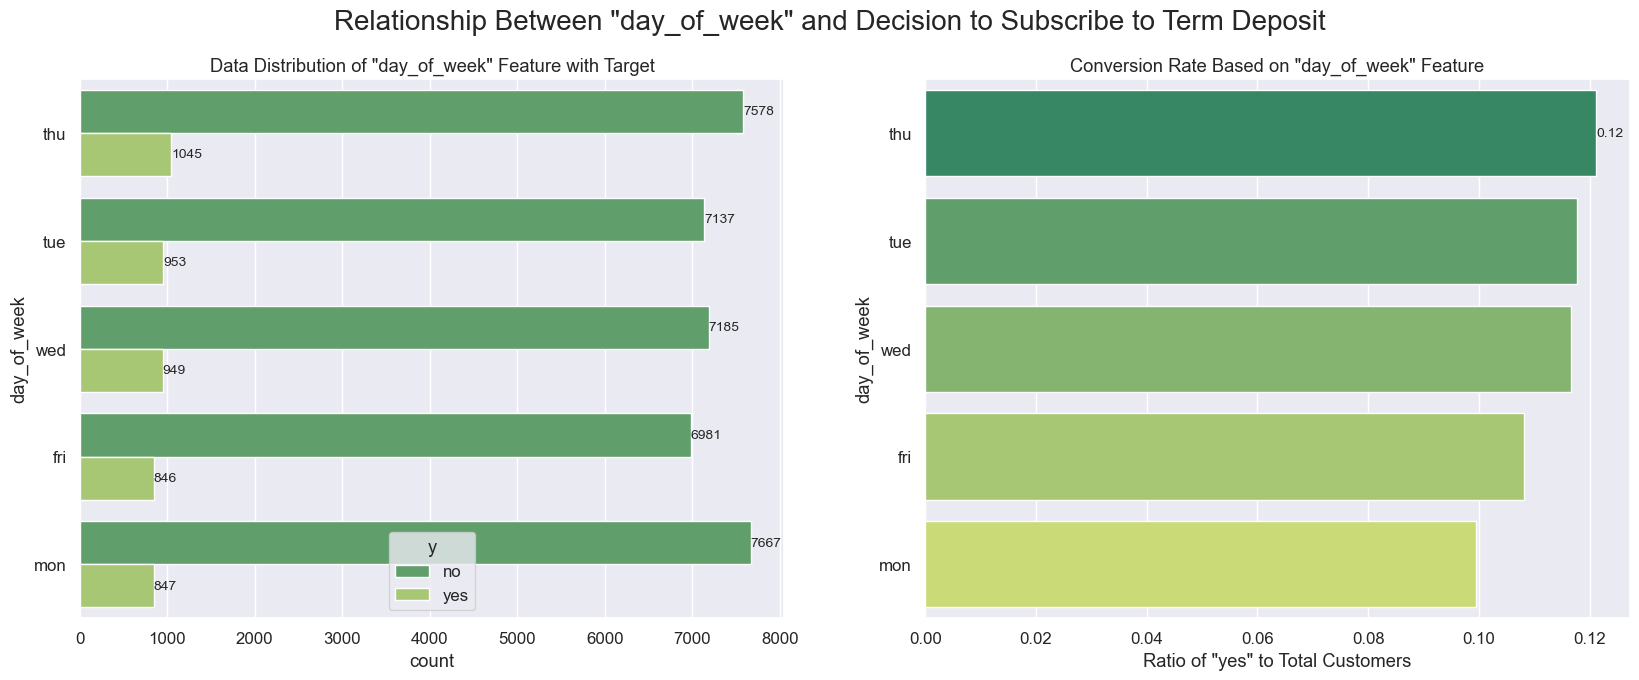

In [40]:
# Visualization of data distribution against target and conversion rate (CVR)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,7))

plt.suptitle('Relationship Between "day_of_week" and Decision to Subscribe to Term Deposit', size=20)

# Conversion Rate
dfratio = df[['day_of_week','age']].groupby(['day_of_week'], as_index=False).count()
dfratio['y'] = df[df['y'] == 'yes'][['day_of_week','age']].groupby(['day_of_week']).count().values
dfratio['ratio'] = dfratio['y'] / dfratio['age']
dfratio.sort_values('ratio', ascending=False)

# Distribution Chart of "day_of_week" Feature with Target
axes[0].set_title('Data Distribution of "day_of_week" Feature with Target')
plot1 = sns.countplot(hue='y', y='day_of_week', data=df, 
                      order=dfratio.sort_values(by='ratio', ascending=False)['day_of_week'],
                      ax=axes[0], palette="summer")

# Annotation
plot1.bar_label(plot1.containers[0], fontsize=10)
plot1.bar_label(plot1.containers[1], fontsize=10)

# Conversion Rate Chart
plot2 = sns.barplot(data=dfratio, y='day_of_week', x='ratio', 
                    order=dfratio.sort_values(by='ratio', ascending=False)['day_of_week'],
                    ax=axes[1], palette="summer")
axes[1].set_title('Conversion Rate Based on "day_of_week" Feature')

# Annotation
plot2.bar_label(plot2.containers[0], fontsize=10, fmt='%.2f')

# Show label
plt.xlabel('Ratio of "yes" to Total Customers')

plt.show()


### Insight

Berdasarkan data di atas, perbedaan conversion rate di antara hari kerja tidak tampak terlalu signifikan. Namun, perlu dicatat bahwa **conversion rate tertinggi terjadi ketika kontak terakhir dilakukan pada hari Kamis**.

Distribusi kontak nasabah di sepanjang hari kerja juga cukup merata, yang menunjukkan bahwa bank telah melakukan upaya yang konsisten dalam menghubungi nasabah sepanjang minggu.

Untuk menilai lebih lanjut apakah hari dalam seminggu benar-benar berpengaruh secara signifikan terhadap kecenderungan nasabah menerima penawaran deposito berjangka, akan dilakukan uji hipotesis chi-square.


**Hipotesis:**

- **H₀ (Hipotesis Nol):** Tidak terdapat hubungan antara hari kontak terakhir dengan kecenderungan nasabah untuk berlangganan deposito berjangka.
- **H₁ (Hipotesis Alternatif):** Terdapat hubungan antara hari kontak terakhir dengan kecenderungan nasabah untuk berlangganan deposito berjangka.


In [41]:
# Rename variable and DataFrame
df_day_of_week = df[['day_of_week', 'y']]
df_day_of_week['yes_count'] = df_day_of_week['y'].apply(lambda x: 1 if x == 'yes' else 0)
df_day_of_week['no_count'] = df_day_of_week['y'].apply(lambda x: 1 if x == 'no' else 0)
df_day_of_week = df_day_of_week.drop(columns='y')
df_day_of_week_counts = df_day_of_week.groupby('day_of_week').sum()
df_day_of_week_counts

yes_count  no_count
day_of_week                     
fri                846      6981
mon                847      7667
thu               1045      7578
tue                953      7137
wed                949      7185

In [42]:
stat, pvalue, dof, expected = chi2_contingency(df_day_of_week_counts)
# conclusion:
if pvalue > 0.05:
    print(f'''
          p-value = {pvalue:.5f}. Not enough evidence to reject the Null Hypothesis (H0).
          There is no significant relationship between the last contact day and the customer's tendency to subscribe to a term deposit.
          ''')
else:
    print(f'''
          p-value = {pvalue:.5f}. Sufficient evidence to reject the Null Hypothesis (H0).
          There is a significant relationship between the last contact day and the customer's tendency to subscribe to a term deposit.
          ''')



          p-value = 0.00003. Sufficient evidence to reject the Null Hypothesis (H0).
          There is a significant relationship between the last contact day and the customer's tendency to subscribe to a term deposit.
          


### Insight

Data di atas menunjukkan adanya hubungan antara hari kontak terakhir dengan nasabah dan kecenderungan mereka untuk berlangganan deposito. Berdasarkan visualisasi, disarankan untuk meningkatkan frekuensi panggilan pada hari Kamis, karena hari ini dikaitkan dengan conversion rate yang lebih tinggi.


### C. **Analysis of previous campaign outcomes**  
   (`campaign`, `pdays`, `previous`, `poutcome`)

### `campaign` Feature

### Feature Analysis: `campaign`

Untuk fitur `campaign`, analisis akan dimulai dengan meninjau **distribusi nilai** guna memahami sebaran data. Selanjutnya, akan dilakukan **uji normalitas** untuk menentukan apakah data mengikuti **distribusi normal** atau tidak.


<Figure size 1500x2000 with 0 Axes>

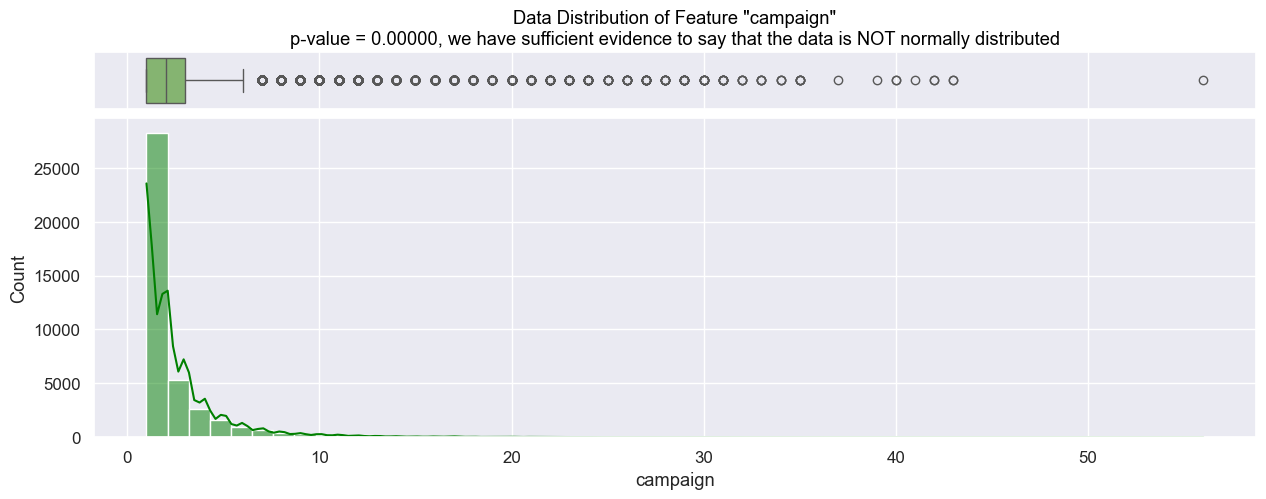

In [43]:
# check data distribution and normality test

plt.figure(figsize=(15,20))

fig, (ax1, ax2) = plt.subplots(2, sharex = True, figsize = (15,5), 
                                gridspec_kw={"height_ratios": (.15, .85),
                                            "hspace": 0.05})

# Normality Test
stat, pvalue = normaltest(df["campaign"].dropna())
if pvalue > 0.05 :
    distribution = f'p-value = {pvalue:.5f}, we have sufficient evidence to say that the data is normally distributed'
else :
    distribution = f'p-value = {pvalue:.5f}, we have sufficient evidence to say that the data is NOT normally distributed'

# Check Data Distribution
ax1.set_title(f"""Data Distribution of Feature "campaign"\n{distribution}""", color = "black")
sns.boxplot(x = df["campaign"], ax = ax1, palette="summer")
ax1.set(xlabel = "")

sns.histplot(data = df["campaign"], ax = ax2, stat = "count", kde=True, bins=50, color="green")

plt.show()


### Insight

- Distribusi data **tidak mengikuti distribusi normal**, melainkan **miring ke kanan**. Hal ini terjadi karena sebagian besar data terkonsentrasi pada nilai terendah — yaitu sebagian besar nasabah dihubungi kurang dari 10 kali selama campaign.
- Karena data **tidak berdistribusi normal**, untuk menentukan di mana sebagian besar nilai data terkonsentrasi (tendensi sentral), kita akan menggunakan **median**. Median diperoleh dengan mengurutkan data dari nilai terkecil ke terbesar, kemudian mencari titik tengah yang membagi data menjadi dua bagian yang sama.


Setelah menentukan ukuran tendensi sentral yang tepat, analisis akan dilanjutkan dengan melihat **nilai median terhadap variabel target** serta memvisualisasikan **distribusi data berdasarkan target**.


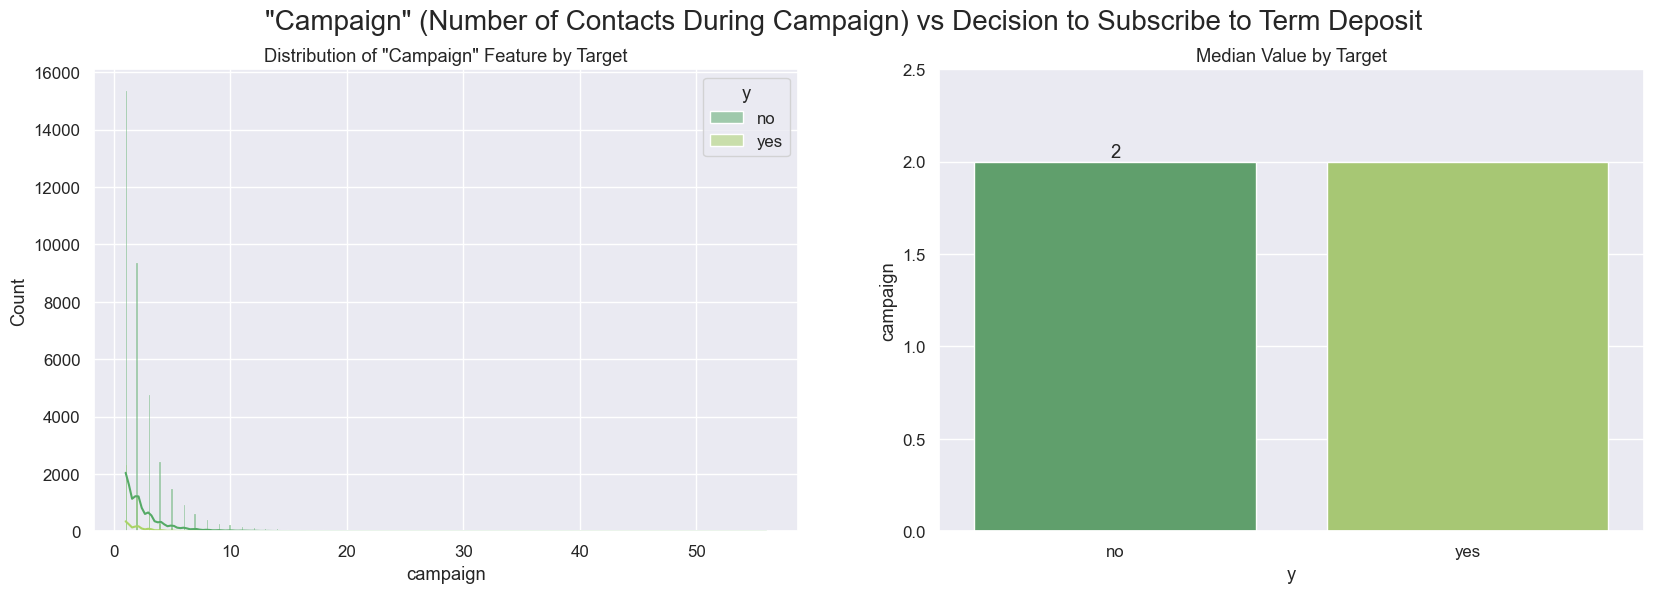

In [44]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

plt.suptitle('"Campaign" (Number of Contacts During Campaign) vs Decision to Subscribe to Term Deposit', size=20)

# Visualization of data distribution by target
axes[0].set_title('Distribution of "Campaign" Feature by Target')
plot1 = sns.histplot(data=df, hue='y', x=df['campaign'], stat='count',
                     ax=axes[0], kde=True, palette="summer")

# Median values by target
axes[1].set_title('Median Value by Target')
plot2 = sns.barplot(x='y', y='campaign', data=df, estimator=np.median, ci=0,
                    ax=axes[1], palette="summer")
plot2.bar_label(plot2.containers[0], label_type='edge')
plot2.set_ylim([0, 2.5])

plt.show()


### Insight

Berdasarkan grafik **nilai median per target** di atas, sulit untuk secara visual membedakan perbedaan median jumlah kontak yang dilakukan ke nasabah selama campaign, baik mereka yang berlangganan Deposito Berjangka maupun yang tidak.

Untuk mengetahui apakah nilai median pada fitur `campaign` benar-benar berbeda signifikan di antara kedua kelompok target, akan dilakukan uji hipotesis menggunakan **Uji Mann-Whitney U**.

> [**Uji Mann-Whitney U**](https://statistics.laerd.com/spss-tutorials/mann-whitney-u-test-using-spss-statistics.php) digunakan untuk membandingkan perbedaan antara dua kelompok independen ketika variabel dependen bersifat ordinal atau kontinu namun tidak berdistribusi normal.


Kita akan melakukan uji Mann-Whitney dengan hipotesis awal sebagai berikut:

**Hipotesis:**

- **H0 (Hipotesis Nol):** Distribusi data `campaign` untuk kelompok 'Yes' **lebih besar atau sama dengan** distribusi kelompok 'No'.
- **Ha (Hipotesis Alternatif):** Distribusi data `campaign` untuk kelompok 'Yes' **lebih kecil** daripada distribusi kelompok 'No'.


In [45]:
# Mann-Whitney Hypothesis Test

stat, pvalue = mannwhitneyu(
    df[df['y'] == 'yes']['campaign'],
    df[df['y'] == 'no']['campaign'],
    alternative='less'
)
pvalue

# Conclusion:
if pvalue > 0.05:
    print(f'''
          p-value = {pvalue:.5f}
          p-value > 0.05 (Fail to reject H0)

          We DO NOT have sufficient evidence to state that the distribution of "campaign" data for people who accepted the term deposit
          is STOCHASTICALLY SMALLER than the distribution for those who rejected the term deposit.
          ''')
else:
    print(f'''
          p-value = {pvalue:.5f}
          p-value <= 0.05 (Reject H0)

          We HAVE sufficient evidence to state that the distribution of "campaign" data for people who accepted the term deposit
          is STOCHASTICALLY SMALLER than the distribution for those who rejected the term deposit.
          ''')



          p-value = 0.00000
          p-value <= 0.05 (Reject H0)

          We HAVE sufficient evidence to state that the distribution of "campaign" data for people who accepted the term deposit
          is STOCHASTICALLY SMALLER than the distribution for those who rejected the term deposit.
          


### Insight

Berdasarkan hasil uji Mann-Whitney di atas, dapat disimpulkan bahwa **terdapat cukup bukti untuk menyatakan bahwa distribusi data "`campaign`" pada nasabah yang menerima penawaran Deposito Berjangka lebih rendah dibandingkan dengan nasabah yang menolak**. Artinya, fitur `campaign` kemungkinan berpengaruh terhadap keputusan nasabah untuk menerima atau menolak produk Deposito Berjangka selama campaign sebelumnya.


Setelah mengetahui bahwa fitur `campaign` dapat memengaruhi keputusan nasabah untuk menggunakan produk Deposito Berjangka, selanjutnya kita akan menganalisis hubungan antara fitur `campaign` dan `duration` dengan variabel target. Analisis ini bertujuan untuk mengevaluasi efisiensi jumlah upaya kontak terhadap calon nasabah, yang akan divisualisasikan menggunakan Scatter Plot berikut:


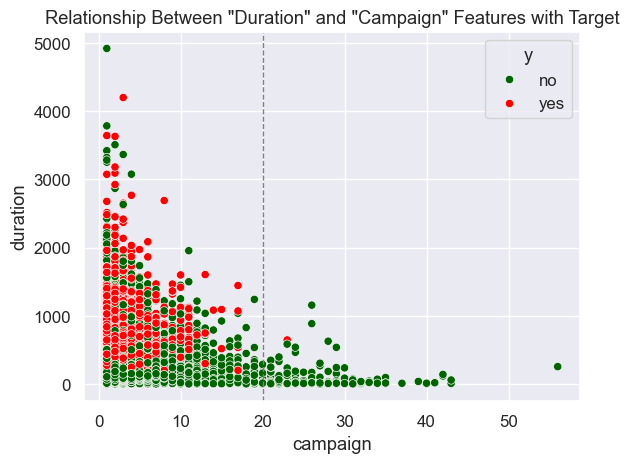

In [46]:
plt.title('Relationship Between "Duration" and "Campaign" Features with Target')
custom_palette = {'yes': 'red', 'no': 'darkgreen'}
sns.scatterplot(data=df, x='campaign', y='duration', hue='y', palette=custom_palette)

# Add a dashed line at campaign = 20
plt.axvline(x=20, color='gray', linestyle='--', linewidth=1)

plt.show()


### Insight

Dari scatter plot di atas, dapat diamati bahwa nasabah yang setuju menggunakan deposito berjangka umumnya dihubungi **maksimal 20 kali**. Meskipun terdapat satu kasus "yes" di mana nasabah dihubungi lebih dari 20 kali, mayoritas nasabah yang dihubungi **lebih dari 20 kali** justru cenderung tidak tertarik pada produk yang ditawarkan. Hal ini masuk akal—dihubungi **lebih dari 20 kali** kemungkinan besar akan dianggap sebagai spam oleh nasabah.


### `pdays` Feature

<Figure size 1500x2000 with 0 Axes>

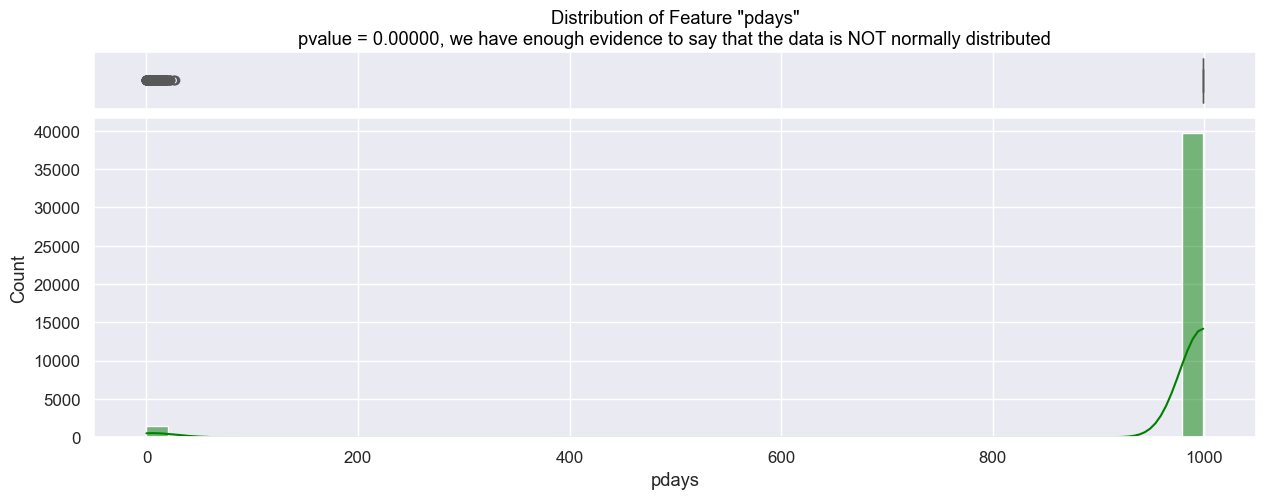

In [47]:
# Check data distribution and perform normality test

plt.figure(figsize=(15,20))

fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(15,5), 
                                gridspec_kw={"height_ratios": (.15, .85),
                                            "hspace": 0.05})

# Normality Test
stat, pvalue = normaltest(df["pdays"].dropna())
if pvalue > 0.05 :
    distribusi = f'pvalue = {pvalue:.5f}, we have enough evidence to say that the data is normally distributed'
else :
    distribusi = f'pvalue = {pvalue:.5f}, we have enough evidence to say that the data is NOT normally distributed'

# Data Distribution Check
ax1.set_title(f"""Distribution of Feature "pdays"\n{distribusi}""", color = "black")
sns.boxplot(x = df["pdays"], ax = ax1, palette="summer")
ax1.set(xlabel = "")

sns.histplot(data = df["pdays"], ax = ax2, stat = "count", kde=True, bins=50, color="green")

plt.show()


### Insight

* Distribusi data tidak normal, melainkan **miring ke kiri** (left-skewed). Hal ini terjadi karena sebagian besar nilai terkonsentrasi pada nilai tertinggi, yaitu **999**, yang merepresentasikan nasabah yang **belum pernah dihubungi** selama campaign sebelumnya.
* Karena data **tidak berdistribusi normal**, untuk memahami tendensi sentral—di mana sebagian besar data terkonsentrasi—akan digunakan **median**. Median dihitung dengan mengurutkan data dari nilai terkecil ke terbesar, kemudian mencari titik tengah yang membagi data menjadi dua bagian sama besar.

Selanjutnya, analisis akan dilanjutkan dengan melihat **nilai median terhadap variabel target** serta memvisualisasikan **distribusi data berdasarkan target**.


Next, we will examine the **median value in relation to the target variable** and also visualize the **distribution of the data based on the target**.


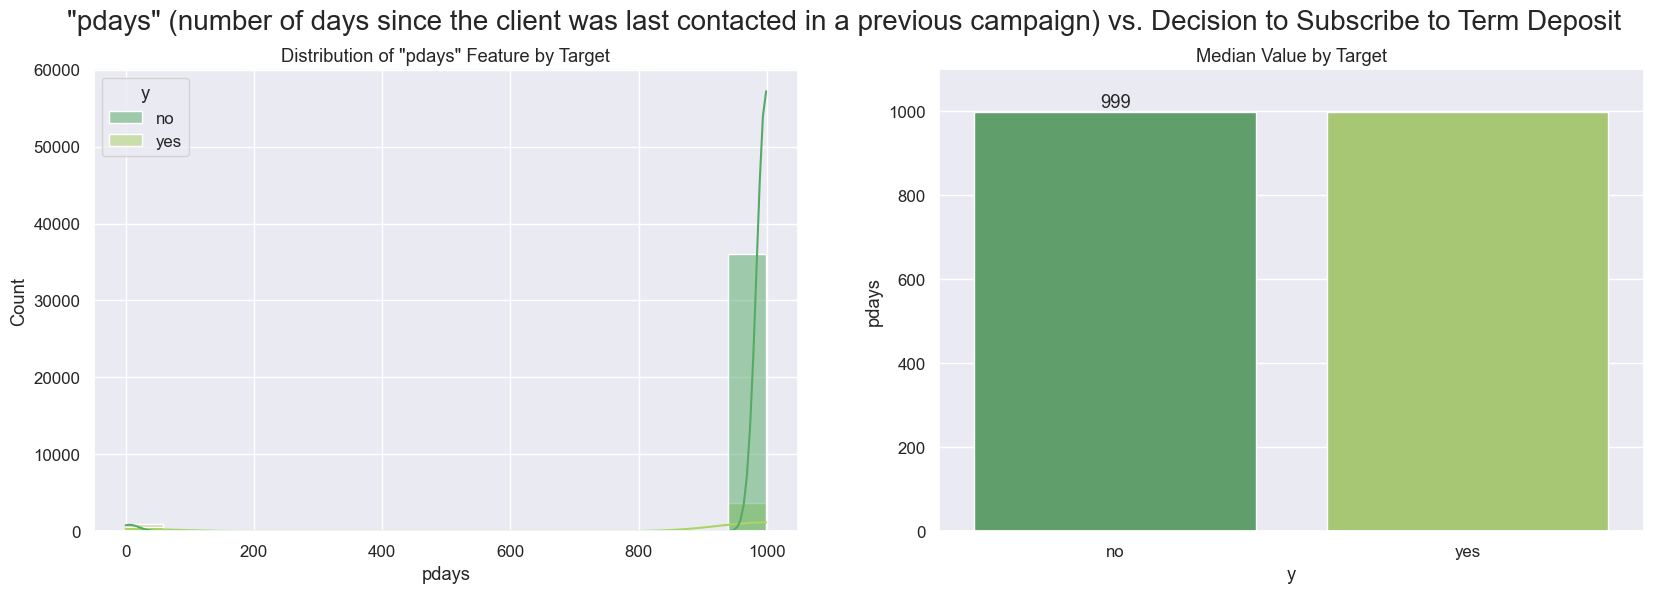

In [48]:
# Visualizing the distribution of data against the target and the median values per target group

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

plt.suptitle('"pdays" (number of days since the client was last contacted in a previous campaign) vs. Decision to Subscribe to Term Deposit', size=20)

# Data distribution based on target
axes[0].set_title('Distribution of "pdays" Feature by Target')
plot1 = sns.histplot(data=df, hue='y', x=df['pdays'], stat='count',
                     ax=axes[0], kde=True, palette="summer")

# Median value per target group
axes[1].set_title('Median Value by Target')
plot2 = sns.barplot(x='y', y='pdays', data=df, estimator=np.median, ci=0,
                    ax=axes[1], palette="summer")
plot2.bar_label(plot2.containers[0], label_type='edge')
plot2.set_ylim([0, 1100])

plt.show()


### Insight

Dari grafik nilai median di atas, **sulit untuk melihat perbedaan yang jelas pada nilai median jumlah hari sejak kontak terakhir antara nasabah yang berlangganan Deposito Berjangka dan yang tidak** (karena data masih mencakup nasabah yang belum pernah dihubungi sebelumnya, yang diwakili oleh nilai "`999`").

Untuk mengetahui apakah nilai median fitur `pdays` berbeda signifikan antar kelompok target, akan dilakukan uji hipotesis menggunakan **Uji Mann-Whitney U**.  
[Uji Mann-Whitney](https://statistics.laerd.com/spss-tutorials/mann-whitney-u-test-using-spss-statistics.php) digunakan untuk membandingkan perbedaan antara dua kelompok independen ketika variabel dependen bersifat **ordinal atau kontinu**, dan **tidak berdistribusi normal**.

Kita akan melakukan Uji Mann-Whitney U dengan hipotesis awal berikut:

**Hipotesis:**

- **H₀ (Hipotesis Nol):** Distribusi `pdays` untuk kelompok "Yes" sama dengan distribusi pada kelompok "No".
- **H₁ (Hipotesis Alternatif):** Distribusi `pdays` untuk kelompok "Yes" berbeda dengan distribusi pada kelompok "No".


We will conduct a Mann-Whitney U test with the following initial hypotheses:

**Hypotheses:**

- **H₀ (Null Hypothesis):** The distribution of `pdays` for the "Yes" group is equal to the distribution for the "No" group.  
- **H₁ (Alternative Hypothesis):** The distribution of `pdays` for the "Yes" group is different from the distribution for the "No" group.


In [49]:
# Mann-Whitney U Hypothesis Test

stat, pvalue = mannwhitneyu(
    df[df['y'] == 'yes']['pdays'],
    df[df['y'] == 'no']['pdays'],
    alternative='two-sided'
)
pvalue

# Conclusion:
if pvalue > 0.05:
    print(f'''
          p-value = {pvalue:.5f}
          p-value > 0.05 (Failed to reject H₀)

          We do NOT have sufficient evidence to conclude that the distribution of "pdays"
          (the number of days since the last contact) is different between customers who accepted
          the term deposit and those who did not.
          ''')
else:
    print(f'''
          p-value = {pvalue:.5f}
          p-value <= 0.05 (Successfully rejected H₀)

          We have sufficient evidence to conclude that the distribution of "pdays"
          (the number of days since the last contact) is different between customers who accepted
          the term deposit and those who did not.
          ''')



          p-value = 0.00000
          p-value <= 0.05 (Successfully rejected H₀)

          We have sufficient evidence to conclude that the distribution of "pdays"
          (the number of days since the last contact) is different between customers who accepted
          the term deposit and those who did not.
          


### Insight

Berdasarkan hasil Uji Mann-Whitney U di atas, dapat disimpulkan bahwa **terdapat cukup bukti untuk menyatakan bahwa distribusi "`pdays`" berbeda signifikan antara nasabah yang menerima penawaran Deposito Berjangka dan yang tidak**. Hal ini mengindikasikan bahwa fitur `pdays` **dapat memengaruhi** keputusan nasabah untuk berlangganan produk Deposito Berjangka pada campaign sebelumnya.


Pada analisis sebelumnya, data masih mencakup nasabah yang **belum pernah dihubungi sebelumnya** (diwakili oleh nilai **"999"** pada fitur `pdays`).

Sekarang, untuk memahami distribusi fitur `pdays` dengan lebih baik dan mendapatkan insight yang lebih jelas mengenai bagaimana **lama waktu sejak kontak terakhir** memengaruhi keputusan nasabah untuk berlangganan Deposito Berjangka, kita akan **mengeluarkan** nasabah dengan nilai `pdays == 999` dari dataset.

Dengan dataset yang sudah disaring ini, analisis hubungan antara recency kontak dan variabel target akan menjadi lebih akurat.


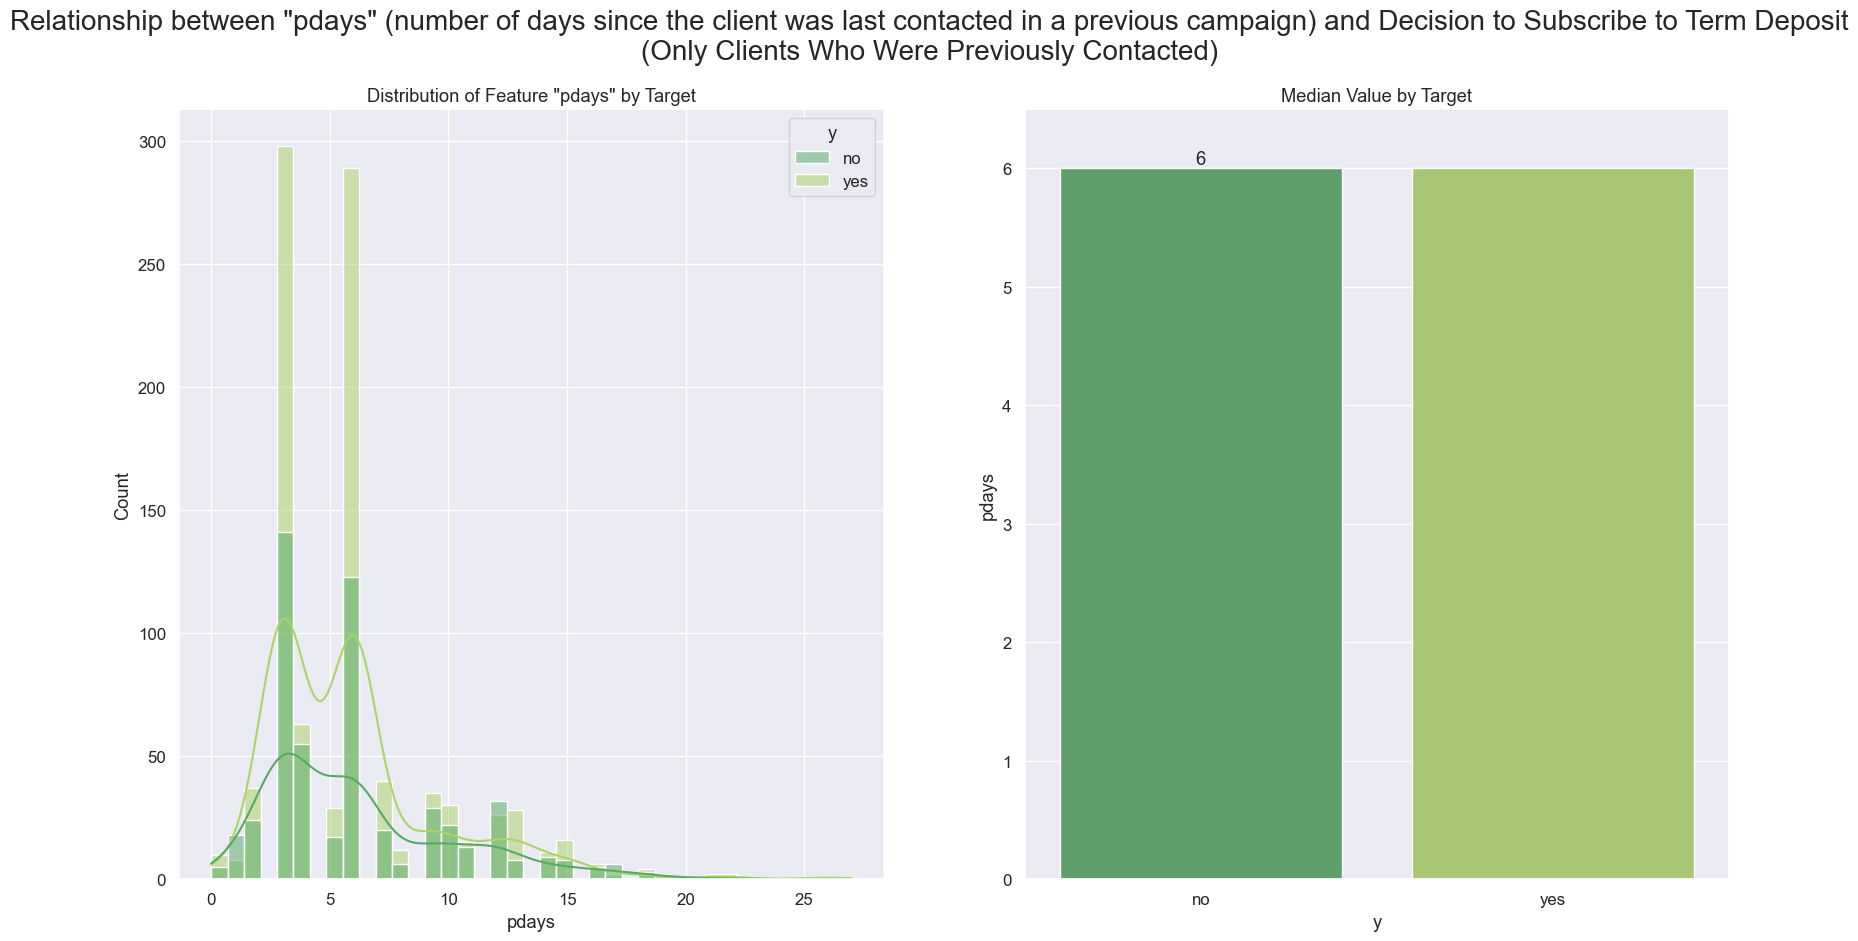

In [50]:
# Visualization of data distribution against the target and median value by target (exclude "999")

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,10))

plt.suptitle('Relationship between "pdays" (number of days since the client was last contacted in a previous campaign) and Decision to Subscribe to Term Deposit\n(Only Clients Who Were Previously Contacted)', size=20)

# Visualization of feature "pdays" distribution against the target
axes[0].set_title('Distribution of Feature "pdays" by Target')
plot1 = sns.histplot(data=df[df['pdays'] != 999], hue='y', x=df[df['pdays'] != 999]['pdays'], stat='count',
                    ax=axes[0], kde=True, palette="summer")

# Median values by target
axes[1].set_title('Median Value by Target')
plot2 = sns.barplot(x='y', y='pdays', data=df[df['pdays'] != 999], estimator=np.median, ci=0,
                   ax=axes[1], palette="summer")
plot2.bar_label(plot2.containers[0], label_type='edge')
plot2.set_ylim([0, 6.5])

plt.show()


### Insight

Sama seperti grafik sebelumnya, nilai median berdasarkan target membuat **sulit untuk membedakan perbedaan pada nilai median lama waktu sejak kontak terakhir (dalam hari) antara nasabah yang berlangganan Deposito Berjangka dan yang tidak** (*menggunakan data hanya dari nasabah yang sudah pernah dihubungi sebelumnya*).

Untuk mengetahui apakah nilai median pada fitur `pdays` berbeda signifikan antar target, kita akan melakukan uji hipotesis menggunakan Uji Mann-Whitney U.  
[Uji Mann-Whitney](https://statistics.laerd.com/spss-tutorials/mann-whitney-u-test-using-spss-statistics.php) digunakan untuk membandingkan perbedaan antara dua kelompok independen ketika variabel dependen bersifat ordinal atau kontinu dan tidak berdistribusi normal.


Kita akan melakukan Uji Mann-Whitney dengan hipotesis awal sebagai berikut:

**Hipotesis:**

- **H₀ (Hipotesis Nol):** Distribusi `pdays` untuk nasabah yang sebelumnya dihubungi dan berlangganan ('Yes') **sama dengan** distribusi `pdays` untuk nasabah yang sebelumnya dihubungi namun tidak berlangganan ('No').
- **H₁ (Hipotesis Alternatif):** Distribusi `pdays` untuk nasabah yang sebelumnya dihubungi dan berlangganan ('Yes') **berbeda dengan** distribusi `pdays` untuk nasabah yang sebelumnya dihubungi namun tidak berlangganan ('No').


In [51]:
# Mann-Whitney Hypothesis Test

df_without999 = df[df['pdays'] != 999]

stat, pvalue = mannwhitneyu(
    df_without999[df_without999['y'] == 'yes']['pdays'],
    df_without999[df_without999['y'] == 'no']['pdays'],
    alternative='two-sided'
)
pvalue

# conclusion:
if pvalue > 0.05:
    print(f'''
          p-value = {pvalue:.5f}
          p-value > 0.05 (Failed to reject Ho)
          
          We DO NOT have enough evidence to say that the distribution of "pdays" (days since last contact with client) 
          for those who agreed to the term deposit IS DIFFERENT FROM
          the distribution of "pdays" for those who declined the term deposit.
          ''')
else:
    print(f'''
          p-value = {pvalue:.5f}
          p-value <= 0.05 (Successfully rejected Ho)
          
          We HAVE enough evidence to say that the distribution of "pdays" (days since last contact with client) 
          for those who agreed to the term deposit IS DIFFERENT FROM
          the distribution of "pdays" for those who declined the term deposit.
          ''')



          p-value = 0.38457
          p-value > 0.05 (Failed to reject Ho)
          
          We DO NOT have enough evidence to say that the distribution of "pdays" (days since last contact with client) 
          for those who agreed to the term deposit IS DIFFERENT FROM
          the distribution of "pdays" for those who declined the term deposit.
          


### Insight

Berdasarkan hasil Uji Mann-Whitney di atas, dapat disimpulkan bahwa **tidak terdapat cukup bukti untuk menyatakan bahwa distribusi data "`pdays`" antara nasabah yang berlangganan Deposito Berjangka dan yang tidak berlangganan berbeda secara signifikan**.

Artinya, setelah nasabah yang belum pernah dihubungi dikeluarkan, fitur `pdays` **tidak memberikan pengaruh** terhadap keputusan nasabah untuk berlangganan atau menggunakan produk Deposito Berjangka pada campaign sebelumnya.


### `previous` Feature

<Figure size 1500x2000 with 0 Axes>

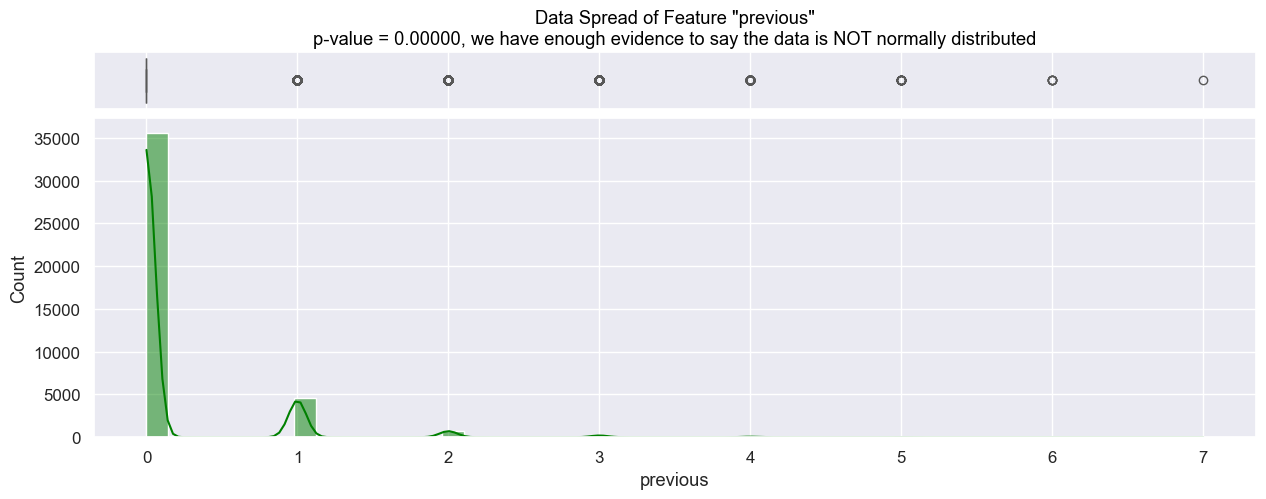

In [52]:
# Check data distribution and normality test

plt.figure(figsize=(15,20))

fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(15,5),
                               gridspec_kw={"height_ratios": (.15, .85),
                                            "hspace": 0.05})

# Normality Test
stat, pvalue = normaltest(df["previous"].dropna())
if pvalue > 0.05:
    distribution = f'p-value = {pvalue:.5f}, we have enough evidence to say the data is normally distributed'
else:
    distribution = f'p-value = {pvalue:.5f}, we have enough evidence to say the data is NOT normally distributed'

# Check Data Spread
ax1.set_title(f"""Data Spread of Feature "previous"\n{distribution}""", color="black")
sns.boxplot(x=df["previous"], ax=ax1, palette="summer")
ax1.set(xlabel="")

sns.histplot(data=df["previous"], ax=ax2, stat="count", kde=True, bins=50, color="green")

plt.show()


### Insight

Sebagian besar distribusi data terkonsentrasi pada nilai terendah, yaitu "**0**", yang merepresentasikan nasabah yang **tidak dihubungi pada campaign sebelumnya**. Hal ini sejalan dengan fitur `pdays` yang telah dibahas sebelumnya, di mana konsentrasi data tertinggi berada pada kategori "**999**", yang juga menandakan nasabah yang **belum pernah dihubungi pada campaign sebelumnya**.


Selanjutnya, mari kita analisis tendensi sentral (menggunakan nilai median) dari fitur `previous` terhadap **variabel target**, serta memvisualisasikan distribusi data berdasarkan target.


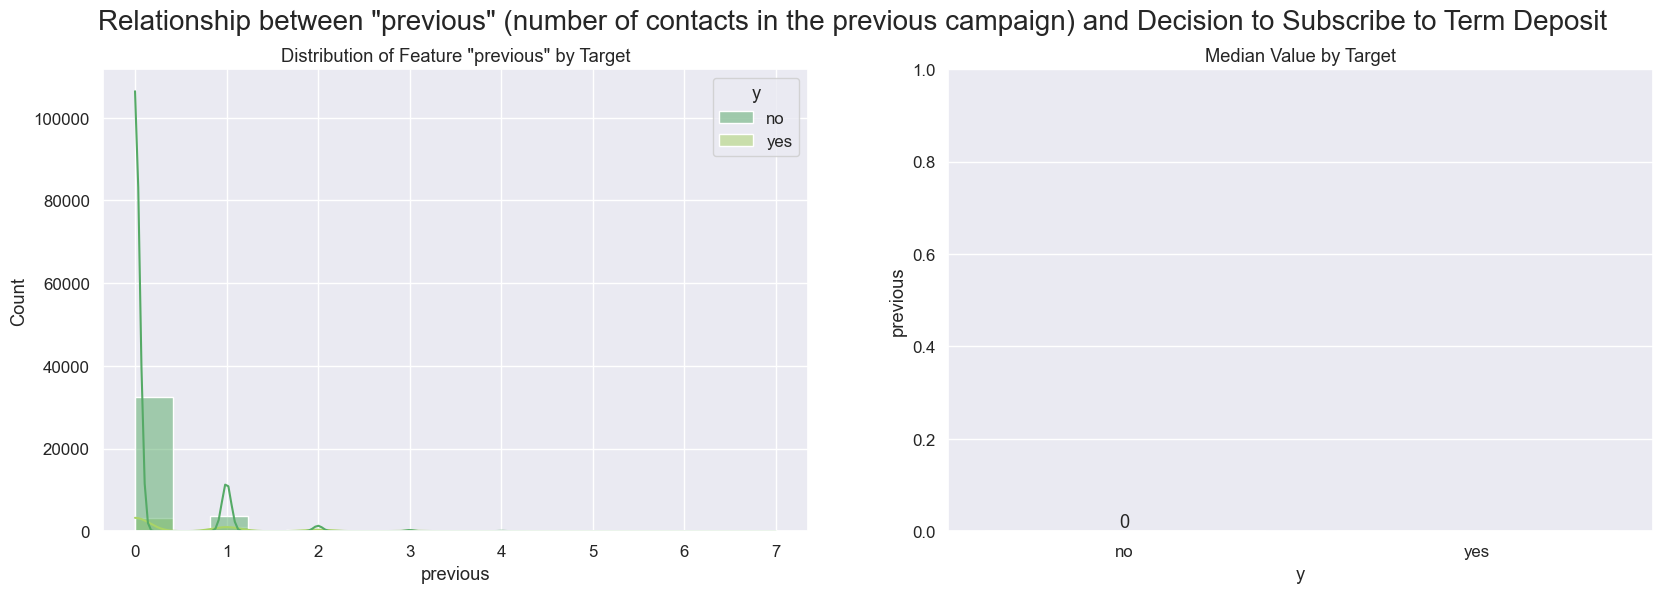

In [53]:
# Visualization of data distribution against the target and median value by target

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,6))

plt.suptitle('Relationship between "previous" (number of contacts in the previous campaign) and Decision to Subscribe to Term Deposit', size=20)

# Visualization of feature "previous" distribution against the target
axes[0].set_title('Distribution of Feature "previous" by Target')
plot1 = sns.histplot(data=df, hue='y', x=df['previous'], stat='count',
                    ax=axes[0], kde=True, palette="summer")

# Median values by target
axes[1].set_title('Median Value by Target')
plot2 = sns.barplot(x='y', y='previous', data=df, estimator=np.median, ci=0,
                   ax=axes[1], palette="summer")
plot2.bar_label(plot2.containers[0], label_type='edge')
plot2.set_ylim([0, 1])

plt.show()

### Insight

Dari grafik nilai median berdasarkan target di atas, sulit untuk melihat perbedaan jumlah kontak median yang dilakukan pada nasabah pada campaign sebelumnya.

Oleh karena itu, untuk mengetahui apakah nilai median pada fitur `previous` berbeda signifikan antar target, akan dilakukan uji hipotesis menggunakan Uji Mann-Whitney U.  
[Uji Mann-Whitney](https://statistics.laerd.com/spss-tutorials/mann-whitney-u-test-using-spss-statistics.php) digunakan untuk membandingkan perbedaan antara dua kelompok independen ketika variabel dependen bersifat ordinal atau kontinu dan tidak berdistribusi normal.

Kita akan melakukan Uji Mann-Whitney dengan hipotesis awal sebagai berikut:

**Hipotesis:**

- **H₀ (Hipotesis Nol):** Distribusi `previous` untuk nasabah yang berlangganan ('Yes') **sama dengan** distribusi `previous` untuk nasabah yang tidak berlangganan ('No').
- **H₁ (Hipotesis Alternatif):** Distribusi `previous` untuk nasabah yang berlangganan ('Yes') **berbeda dengan** distribusi `previous` untuk nasabah yang tidak berlangganan ('No').


In [54]:
# Mann-Whitney Hypothesis Test

stat, pvalue = mannwhitneyu(
    df[df['y'] == 'yes']['previous'],
    df[df['y'] == 'no']['previous'],
    alternative='two-sided'
)
pvalue

# conclusion:
if pvalue > 0.05:
    print(f'''
          p-value = {pvalue:.5f}
          p-value > 0.05 (Failed to reject Ho)
          
          We DO NOT have enough evidence to say that the distribution of "previous" for those who agreed to the term deposit IS DIFFERENT FROM 
          the distribution of "previous" for those who declined the term deposit
          (the distributions are not significantly different)
          ''')
else:
    print(f'''
          p-value = {pvalue:.5f}
          p-value <= 0.05 (Successfully rejected Ho)
          
          We HAVE enough evidence to say that the distribution of "previous" for those who agreed to the term deposit IS DIFFERENT FROM 
          the distribution of "previous" for those who declined the term deposit
          (the distributions are significantly different)
          ''')



          p-value = 0.00000
          p-value <= 0.05 (Successfully rejected Ho)
          
          We HAVE enough evidence to say that the distribution of "previous" for those who agreed to the term deposit IS DIFFERENT FROM 
          the distribution of "previous" for those who declined the term deposit
          (the distributions are significantly different)
          


### Insight

Berdasarkan hasil Uji Mann-Whitney di atas, dapat disimpulkan bahwa **terdapat cukup bukti untuk menyatakan bahwa distribusi data "`previous`" antara nasabah yang berlangganan Deposito Berjangka dan yang tidak berbeda secara signifikan**.

Artinya, fitur `previous` dapat memengaruhi keputusan nasabah untuk berlangganan atau menggunakan produk Deposito Berjangka pada campaign sebelumnya.

Pada analisis sebelumnya, data masih mencakup nasabah yang **belum pernah dihubungi sebelumnya** (**kategori "0"**).

Sekarang, untuk mengamati distribusi fitur `previous` setelah mengeluarkan nasabah yang belum pernah dihubungi, serta mendapatkan insight terkait jumlah kontak yang dilakukan pada campaign sebelumnya terhadap variabel target, kita akan mencoba menghapus nasabah dengan kategori "0" dari dataset.


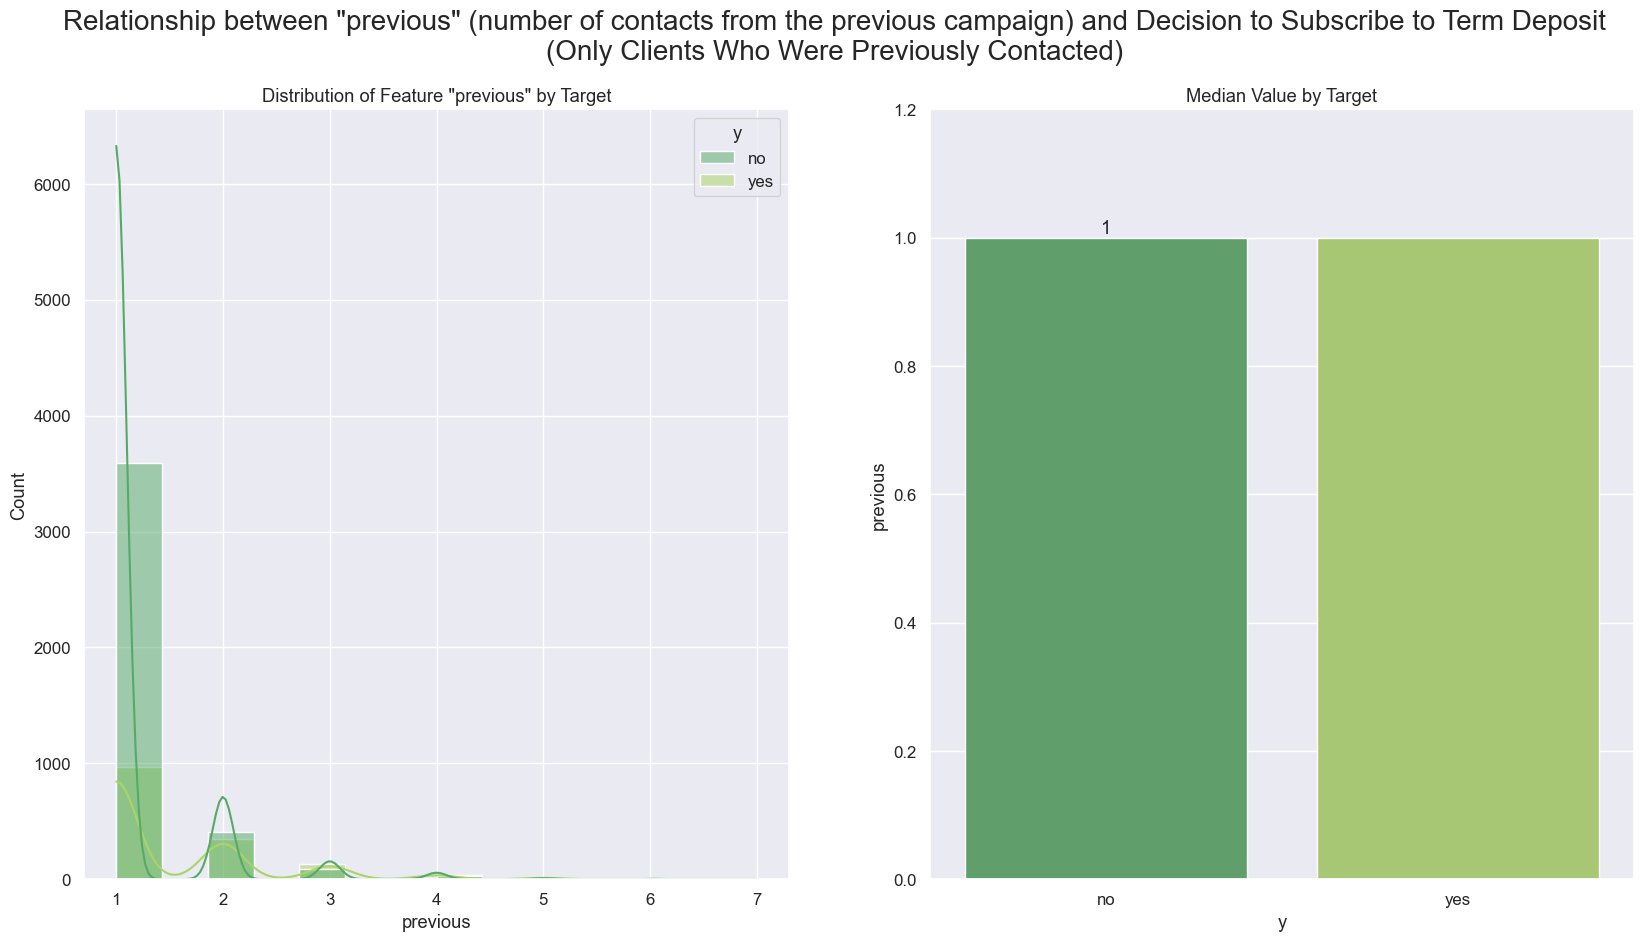

In [55]:
# Visualization of data distribution against the target and median value by target (exclude "0")

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,10))

plt.suptitle('Relationship between "previous" (number of contacts from the previous campaign) and Decision to Subscribe to Term Deposit\n(Only Clients Who Were Previously Contacted)', size=20)

# Visualization of feature "previous" distribution against the target
axes[0].set_title('Distribution of Feature "previous" by Target')
plot1 = sns.histplot(data=df[df['previous'] != 0], hue='y', x=df[df['previous'] != 0]['previous'], stat='count',
                    ax=axes[0], kde=True, palette="summer")

# Median values by target
axes[1].set_title('Median Value by Target')
plot2 = sns.barplot(x='y', y='previous', data=df[df['previous'] != 0], estimator=np.median, ci=0,
                   ax=axes[1], palette="summer")
plot2.bar_label(plot2.containers[0], label_type='edge')
plot2.set_ylim([0, 1.2])

plt.show()


### Insight

Sama seperti grafik sebelumnya, nilai median berdasarkan target membuat **sulit untuk membedakan perbedaan jumlah kontak median yang dilakukan kepada nasabah yang berlangganan Deposito Berjangka atau tidak** (*menggunakan data hanya dari nasabah yang sudah pernah dihubungi*).

Oleh karena itu, untuk mengetahui apakah nilai median pada fitur `previous` berbeda signifikan antar target, akan dilakukan uji hipotesis menggunakan Uji Mann-Whitney U.  
[Uji Mann-Whitney](https://statistics.laerd.com/spss-tutorials/mann-whitney-u-test-using-spss-statistics.php) digunakan untuk membandingkan perbedaan antara dua kelompok independen ketika variabel dependen bersifat ordinal atau kontinu dan tidak berdistribusi normal.


Kita akan melakukan Uji Mann-Whitney dengan hipotesis awal sebagai berikut:

**Hipotesis:**

- **H₀ (Hipotesis Nol):** Distribusi `previous` untuk nasabah yang sebelumnya dihubungi dan berlangganan ('Yes') **sama dengan** distribusi untuk nasabah yang sebelumnya dihubungi namun tidak berlangganan ('No').
- **H₁ (Hipotesis Alternatif):** Distribusi `previous` untuk nasabah yang sebelumnya dihubungi dan berlangganan ('Yes') **berbeda dengan** distribusi untuk nasabah yang sebelumnya dihubungi namun tidak berlangganan ('No').


In [56]:
# Mann-Whitney Hypothesis Test

df_without0 = df[df['previous'] != 0]

stat, pvalue = mannwhitneyu(
    df_without0[df_without0['y'] == 'yes']['previous'],
    df_without0[df_without0['y'] == 'no']['previous'],
    alternative='two-sided'
)
pvalue

# conclusion:
if pvalue > 0.05:
    print(f'''
          p-value = {pvalue:.5f}
          p-value > 0.05 (Failed to reject Ho)
          
          We DO NOT have enough evidence to say that the distribution of "previous" (number of previous campaign contacts) 
          for those who agreed to the term deposit IS DIFFERENT FROM
          the distribution of "previous" for those who declined the term deposit
          (the distributions are not significantly different)
          ''')
else:
    print(f'''
          p-value = {pvalue:.5f}
          p-value <= 0.05 (Successfully rejected Ho)
          
          We HAVE enough evidence to say that the distribution of "previous" (number of previous campaign contacts) 
          for those who agreed to the term deposit IS DIFFERENT FROM
          the distribution of "previous" for those who declined the term deposit
          (the distributions are significantly different)
          ''')



          p-value = 0.00000
          p-value <= 0.05 (Successfully rejected Ho)
          
          We HAVE enough evidence to say that the distribution of "previous" (number of previous campaign contacts) 
          for those who agreed to the term deposit IS DIFFERENT FROM
          the distribution of "previous" for those who declined the term deposit
          (the distributions are significantly different)
          


### Insight

Berdasarkan hasil Uji Mann-Whitney di atas, dapat disimpulkan bahwa **terdapat cukup bukti untuk menyatakan bahwa distribusi "`previous`" antara nasabah yang berlangganan Deposito Berjangka dan yang tidak, berbeda secara signifikan**, bahkan setelah data difilter.

Artinya, fitur `previous` — baik mencakup nasabah yang belum pernah dihubungi maupun hanya yang sudah pernah dihubungi — dapat memengaruhi keputusan nasabah untuk berlangganan atau menggunakan produk Deposito Berjangka pada campaign sebelumnya.


### `poutcome` Feature

Kita akan menganalisis hubungan antara fitur `poutcome` dengan variabel target, serta menghitung conversion rate (CVR) untuk setiap kelompok.

Dalam konteks ini, **Conversion Rate (CVR)** adalah proporsi nasabah yang berhasil berlangganan (subscribe pada Deposito Berjangka) dibandingkan total nasabah di setiap kelompok outcome dari campaign sebelumnya.


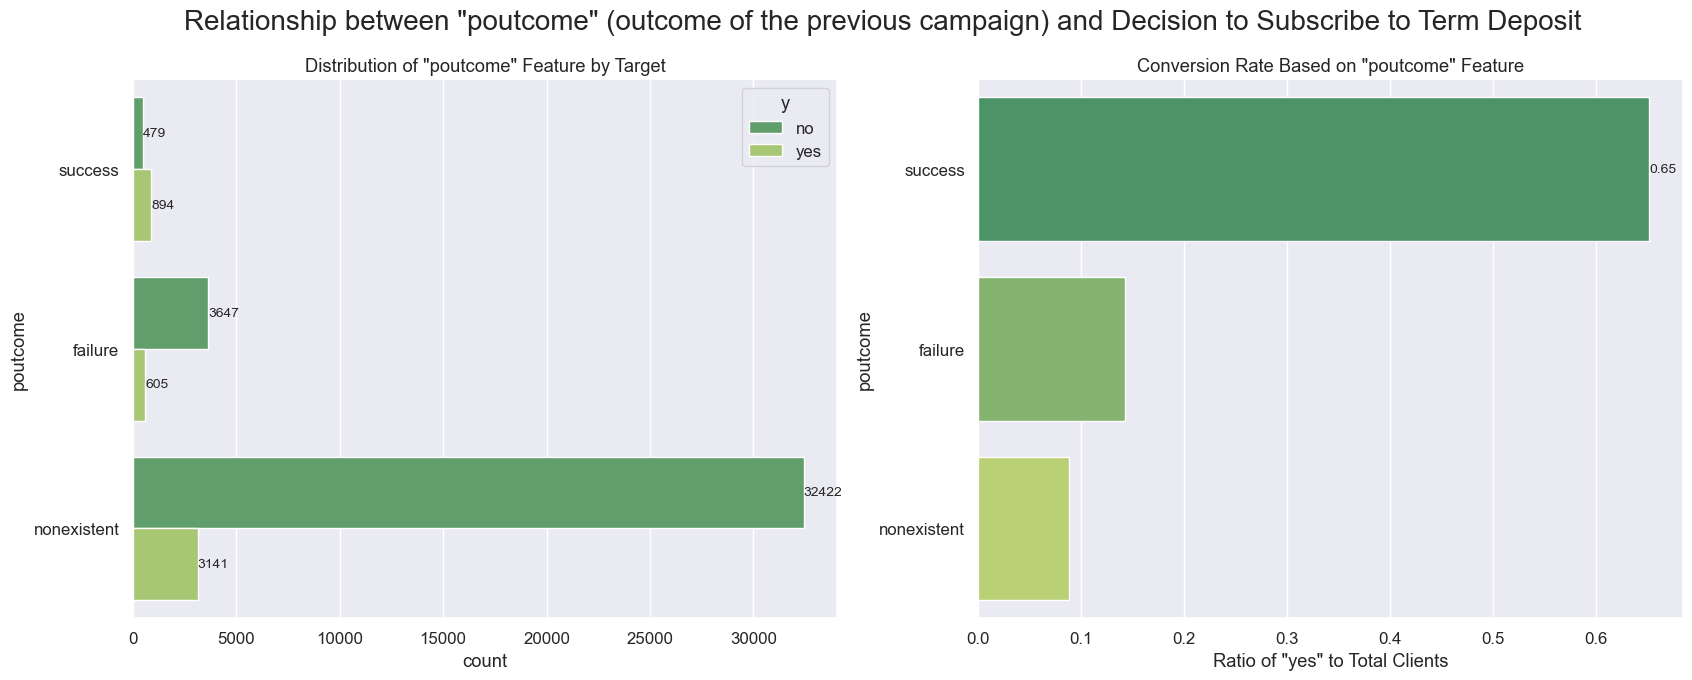

In [57]:
# Visualization of data distribution against the target and conversion rate (CVR)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,7))

plt.suptitle('Relationship between "poutcome" (outcome of the previous campaign) and Decision to Subscribe to Term Deposit', size=20)

# Conversion Rate
dfratio = df[['poutcome', 'age']].groupby(['poutcome'], as_index=False).count()
dfratio['y'] = df[df['y'] == 'yes'][['poutcome', 'age']].groupby(['poutcome']).count().values
dfratio['ratio'] = dfratio['y'] / dfratio['age']
dfratio.sort_values('ratio', ascending=False)

# Plot: Distribution of 'poutcome' feature by target
axes[0].set_title('Distribution of "poutcome" Feature by Target')
plot1 = sns.countplot(hue='y', y='poutcome', data=df,
                      order=dfratio.sort_values(by='ratio', ascending=False)['poutcome'],
                      ax=axes[0], palette="summer")
# Annotation
plot1.bar_label(plot1.containers[0], fontsize=10)
plot1.bar_label(plot1.containers[1], fontsize=10)

# Plot: Conversion Rate
plot2 = sns.barplot(data=dfratio, y='poutcome', x='ratio',
                    order=dfratio.sort_values(by='ratio', ascending=False)['poutcome'],
                    ax=axes[1], palette="summer")
axes[1].set_title('Conversion Rate Based on "poutcome" Feature')
# Annotation
plot2.bar_label(plot2.containers[0], fontsize=10, fmt='%.2f')
# Label
plt.xlabel('Ratio of "yes" to Total Clients')

plt.show()


### Insight

* Kategori yang paling sering muncul pada outcome campaign sebelumnya adalah **nonexistent**, yang berarti sebagian besar nasabah merupakan nasabah baru dan belum pernah menerima campaign sebelumnya. Hal ini konsisten dengan analisis beberapa fitur sebelumnya.

* Hal yang menarik di sini adalah nasabah yang **berhasil** pada campaign sebelumnya memiliki conversion rate (CVR) tertinggi, yaitu **0,65**. Ini menunjukkan bahwa nasabah dengan hasil sukses pada campaign sebelumnya **sangat berpotensi** untuk kembali berlangganan produk Deposito Berjangka pada campaign berikutnya.


### D. **Analysis of Portugal's economic indicators**  
   (`emp.var.rate`, `cons.price.idx`, `cons.conf.idx`, `euribor3m`, `nr.employed`)

### `emp.var.rate` Feature

<Figure size 1500x2000 with 0 Axes>

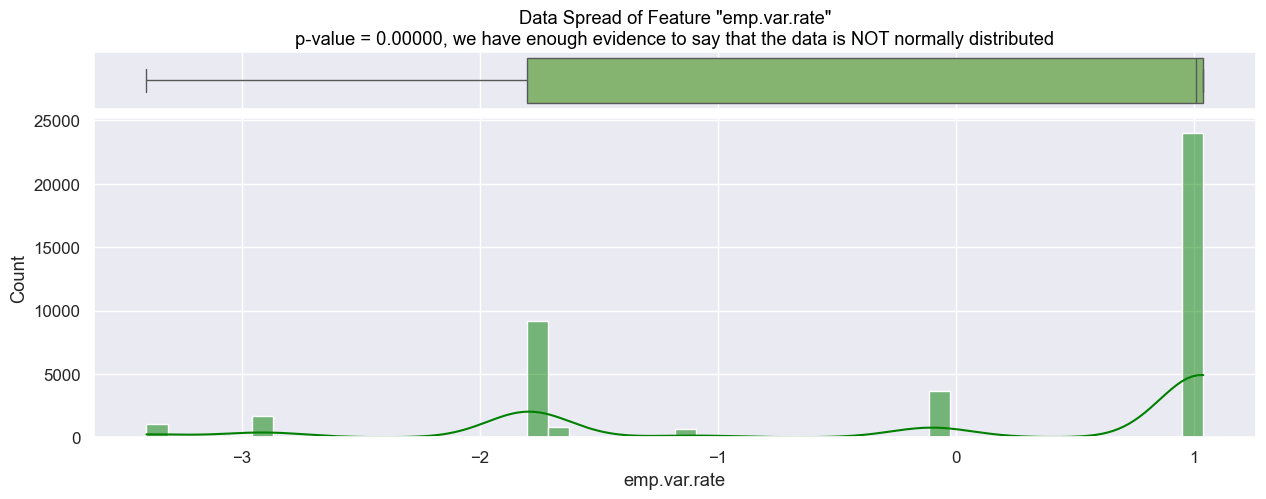

In [58]:
# Check data distribution and normality test

plt.figure(figsize=(15,20))

fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(15,5), 
                               gridspec_kw={"height_ratios": (.15, .85),
                                            "hspace": 0.05})

# Normality Test
stat, pvalue = normaltest(df["emp.var.rate"].dropna())
if pvalue > 0.05:
    distribution = f'p-value = {pvalue:.5f}, we have enough evidence to say that the data is normally distributed'
else:
    distribution = f'p-value = {pvalue:.5f}, we have enough evidence to say that the data is NOT normally distributed'

# Check Data Spread
ax1.set_title(f"""Data Spread of Feature "emp.var.rate"\n{distribution}""", color="black")
sns.boxplot(x=df["emp.var.rate"], ax=ax1, palette="summer")
ax1.set(xlabel="")

sns.histplot(data=df["emp.var.rate"], ax=ax2, stat="count", kde=True, bins=50, color="green")

plt.show()


### Insight

* Distribusi data **tidak berdistribusi normal**, melainkan **miring ke kanan** (right-skewed). Hal ini terjadi karena sebagian besar nilai terkonsentrasi pada rentang usia **30–45 tahun**.

* Mayoritas nasabah yang dihubungi berada pada rentang usia **30–45 tahun**. Ini menunjukkan bahwa bank menargetkan calon nasabah pada kelompok usia tersebut, kemungkinan karena dianggap sudah matang secara finansial dan berada di fase paling produktif dalam hidupnya.


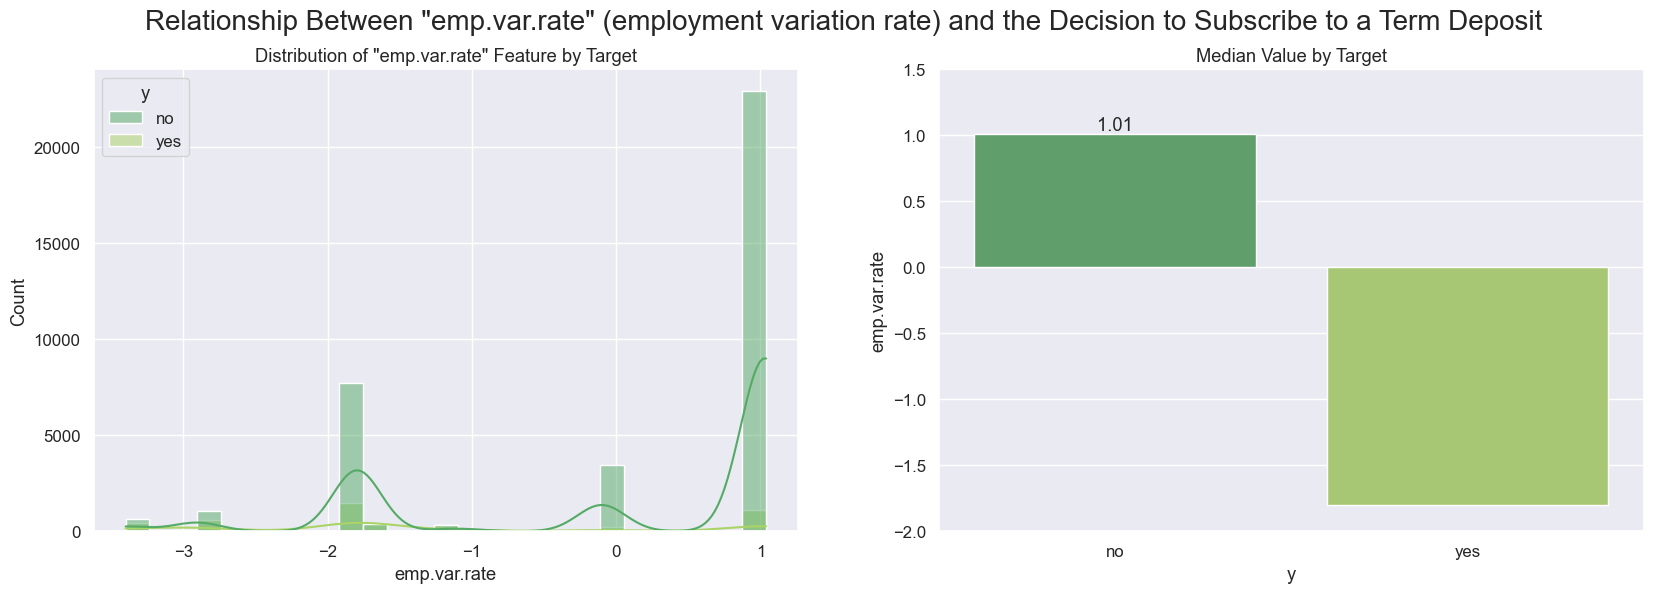

In [59]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,6))

plt.suptitle('Relationship Between "emp.var.rate" (employment variation rate) and the Decision to Subscribe to a Term Deposit', size=20)

# Visualization of data distribution by target
axes[0].set_title('Distribution of "emp.var.rate" Feature by Target')
plot1 = sns.histplot(data=df, hue='y', x=df['emp.var.rate'], stat='count',
                     ax=axes[0], kde=True, palette="summer")

# Median value by target
axes[1].set_title('Median Value by Target')
plot2 = sns.barplot(x='y', y='emp.var.rate', data=df, estimator=np.median, ci=0,
                    ax=axes[1], palette="summer")
plot2.bar_label(plot2.containers[0], label_type='edge')
plot2.set_ylim([-2, 1.5])

plt.show()


### Insight
Dari grafik nilai median berdasarkan target, terlihat jelas bahwa **nasabah lebih cenderung memilih produk Deposito Berjangka ketika indikator employment variation rate berada pada rentang negatif (antara -1 hingga -3,4)**.


### `cons.price.idx` Feature

<Figure size 1500x2000 with 0 Axes>

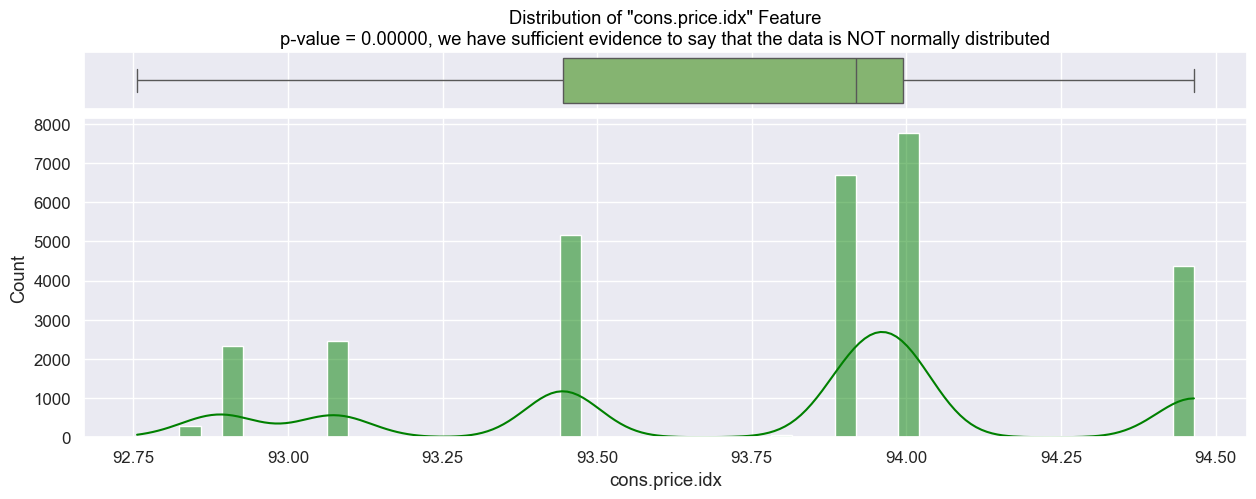

In [60]:
# check data distribution and perform normality test

plt.figure(figsize=(15,20))

fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(15,5), 
                                gridspec_kw={"height_ratios": (.15, .85),
                                            "hspace": 0.05})

# Normality Test
stat, pvalue = normaltest(df["cons.price.idx"].dropna())
if pvalue > 0.05:
    distribution = f'p-value = {pvalue:.5f}, we have sufficient evidence to say that the data is normally distributed'
else:
    distribution = f'p-value = {pvalue:.5f}, we have sufficient evidence to say that the data is NOT normally distributed'

# Check Data Distribution
ax1.set_title(f"""Distribution of "cons.price.idx" Feature\n{distribution}""", color="black")
sns.boxplot(x=df["cons.price.idx"], ax=ax1, palette="summer")
ax1.set(xlabel="")

sns.histplot(data=df["cons.price.idx"], ax=ax2, stat="count", kde=True, bins=50, color="green")

plt.show()


Selanjutnya, kita akan melihat nilai median `cons.price.idx` terhadap variabel target, serta memvisualisasikan distribusi data berdasarkan target.


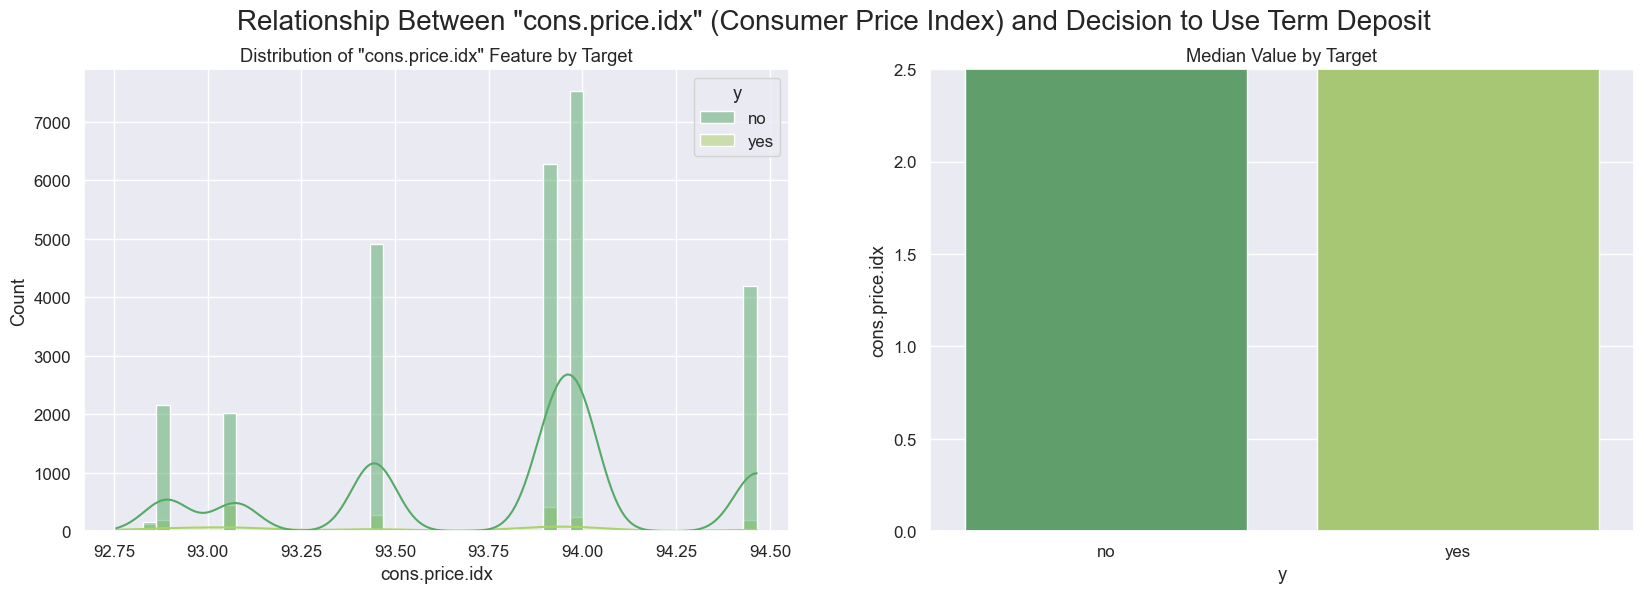

In [61]:
# Visualization of data distribution and median value by target

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,6))

plt.suptitle('Relationship Between "cons.price.idx" (Consumer Price Index) and Decision to Use Term Deposit', size=20)

# Visualization of data distribution by target
axes[0].set_title('Distribution of "cons.price.idx" Feature by Target')
plot1 = sns.histplot(data=df, hue='y', x=df['cons.price.idx'], stat='count',
                     ax=axes[0], kde=True, palette="summer")

# Median value by target
axes[1].set_title('Median Value by Target')
plot2 = sns.barplot(x='y', y='cons.price.idx', data=df, estimator=np.median, ci=0, 
                    ax=axes[1], palette="summer")
plot2.bar_label(plot2.containers[0], label_type='edge')
plot2.set_ylim([0, 2.5])

plt.show()


### Insight

Dari grafik nilai median di atas, sulit untuk melihat perbedaan yang jelas pada Consumer Price Index (CPI) antara nasabah yang berlangganan Deposito Berjangka dan yang tidak. Oleh karena itu, untuk mengetahui apakah nilai median fitur `cons.price.idx` berbeda signifikan berdasarkan target, akan dilakukan uji hipotesis menggunakan Uji Mann-Whitney U.

[Uji Mann-Whitney U](https://statistics.laerd.com/spss-tutorials/mann-whitney-u-test-using-spss-statistics.php) digunakan untuk membandingkan perbedaan antara dua kelompok independen ketika variabel dependen bersifat ordinal atau kontinu, namun **tidak berdistribusi normal**.


Kita akan melakukan Uji Mann-Whitney U dengan hipotesis sebagai berikut:

**Hipotesis:**

- **H₀ (Hipotesis Nol):** Distribusi `cons.price.idx` untuk nasabah yang berlangganan ("Yes") **sama dengan** distribusi untuk nasabah yang tidak berlangganan ("No").
- **H₁ (Hipotesis Alternatif):** Distribusi `cons.price.idx` untuk nasabah yang berlangganan ("Yes") **tidak sama dengan** distribusi untuk nasabah yang tidak berlangganan ("No").


In [62]:
# Mann-Whitney Hypothesis Test

stat, pvalue = mannwhitneyu(
    df[df['y'] == 'yes']['cons.price.idx'],
    df[df['y'] == 'no']['cons.price.idx'],
    alternative='two-sided'
)
pvalue

# Conclusion:
if pvalue > 0.05:
    print(f'''
          p-value = {pvalue:.5f}
          p-value > 0.05 (Fail to reject H₀)
          
          We do NOT have sufficient evidence to say that the distribution of "cons.price.idx" for customers who subscribed to the term deposit is 
          DIFFERENT from the distribution for customers who did not.
          (No significant difference in distributions)
          ''')
else:
    print(f'''
          p-value = {pvalue:.5f}
          p-value <= 0.05 (Reject H₀)
          
          We HAVE sufficient evidence to say that the distribution of "cons.price.idx" for customers who subscribed to the term deposit is 
          DIFFERENT from the distribution for customers who did not.
          (Distributions are significantly different)
          ''')



          p-value = nan
          p-value <= 0.05 (Reject H₀)
          
          We HAVE sufficient evidence to say that the distribution of "cons.price.idx" for customers who subscribed to the term deposit is 
          DIFFERENT from the distribution for customers who did not.
          (Distributions are significantly different)
          


### Insight

Berdasarkan hasil Uji Mann-Whitney U di atas, dapat disimpulkan bahwa **terdapat cukup bukti untuk menyatakan bahwa distribusi `cons.price.idx` berbeda secara signifikan antara nasabah yang berlangganan Deposito Berjangka dan yang tidak**.

Hal ini menunjukkan bahwa fitur `cons.price.idx` (Consumer Price Index) dapat memengaruhi keputusan nasabah untuk berlangganan produk Deposito Berjangka pada campaign pemasaran sebelumnya.


### `cons.conf.idx` Feature

<Figure size 1500x2000 with 0 Axes>

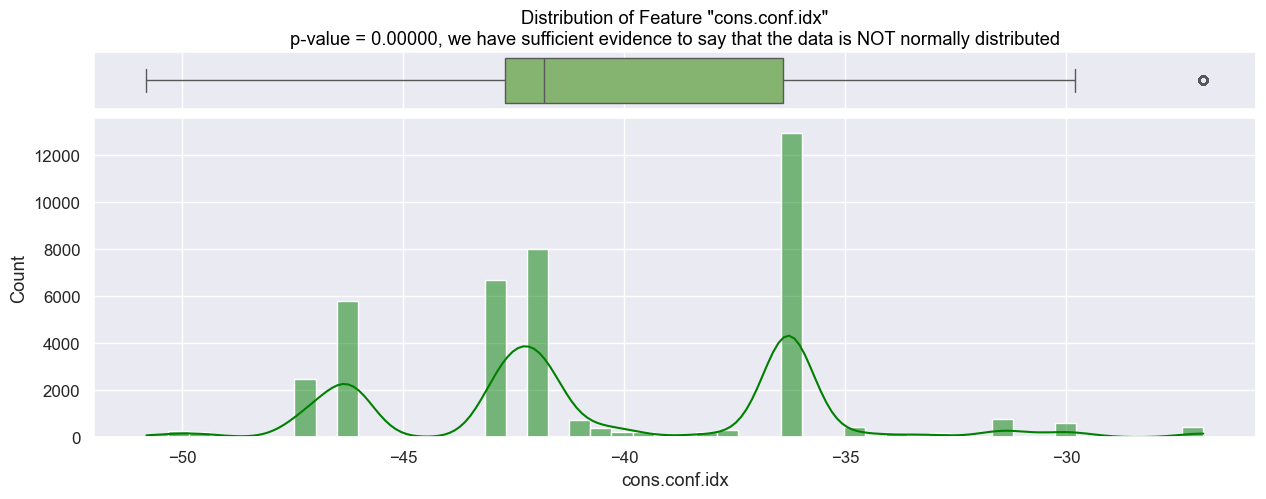

In [63]:
# Check data distribution and perform normality test

plt.figure(figsize=(15, 20))

fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(15, 5),
                                gridspec_kw={"height_ratios": (.15, .85),
                                             "hspace": 0.05})

# Normality Test
stat, pvalue = normaltest(df["cons.conf.idx"].dropna())
if pvalue > 0.05:
    distribution = f'p-value = {pvalue:.5f}, we have sufficient evidence to say that the data is normally distributed'
else:
    distribution = f'p-value = {pvalue:.5f}, we have sufficient evidence to say that the data is NOT normally distributed'

# Data Distribution Check
ax1.set_title(f"""Distribution of Feature "cons.conf.idx"\n{distribution}""", color="black")
sns.boxplot(x=df["cons.conf.idx"], ax=ax1, palette="summer")
ax1.set(xlabel="")

sns.histplot(data=df["cons.conf.idx"], ax=ax2, stat="count", kde=True, bins=50, color="green")

plt.show()


Selanjutnya, kita akan melihat nilai median fitur ini terhadap variabel target, serta memvisualisasikan distribusi data berdasarkan target.


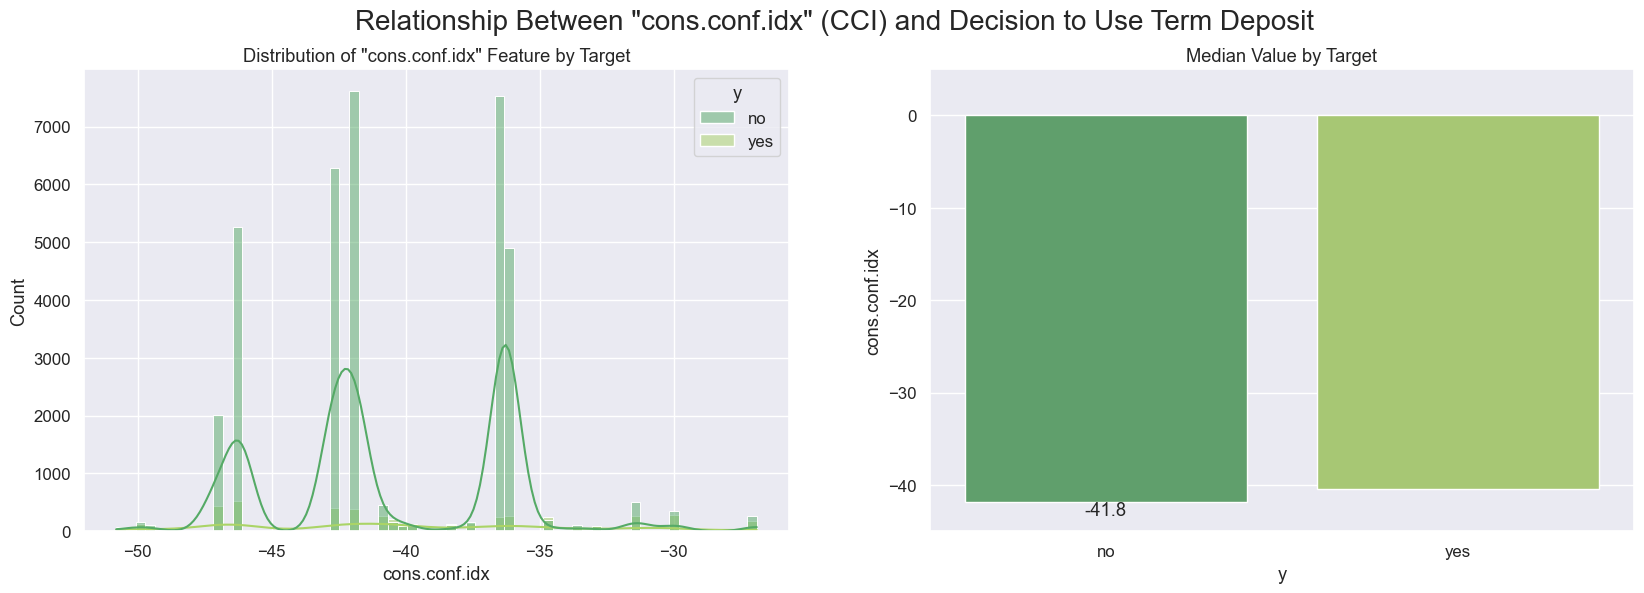

In [64]:
# Visualization of data distribution by target and median value by target

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

plt.suptitle('Relationship Between "cons.conf.idx" (CCI) and Decision to Use Term Deposit', size=20)

# Data distribution visualization by target
axes[0].set_title('Distribution of "cons.conf.idx" Feature by Target')
plot1 = sns.histplot(data=df, hue='y', x=df['cons.conf.idx'], stat='count',
                     ax=axes[0], kde=True, palette="summer")

# Median value by target
axes[1].set_title('Median Value by Target')
plot2 = sns.barplot(x='y', y='cons.conf.idx', data=df, estimator=np.median, ci=0,
                    ax=axes[1], palette="summer")
plot2.bar_label(plot2.containers[0], label_type='edge')
plot2.set_ylim([-45, 5])

plt.show()


### Insight

Dari grafik nilai median di atas, sulit untuk secara visual membedakan perbedaan nilai median indeks CCI antara nasabah yang memilih menggunakan Deposito Berjangka dan yang tidak.

Untuk mengetahui apakah nilai median fitur `cons.conf.idx` berbeda signifikan berdasarkan target, akan dilakukan uji hipotesis menggunakan Uji Mann-Whitney.

[Uji Mann-Whitney](https://statistics.laerd.com/spss-tutorials/mann-whitney-u-test-using-spss-statistics.php) digunakan untuk membandingkan perbedaan antara dua kelompok independen ketika variabel dependen bersifat ordinal atau kontinu dan tidak berdistribusi normal.


Kita akan melakukan Uji Mann-Whitney dengan hipotesis awal sebagai berikut:

**Hipotesis:**

- **H₀ (Hipotesis Nol):** Distribusi `cons.conf.idx` untuk nasabah yang berlangganan ("Yes") **sama dengan** distribusi untuk nasabah yang tidak berlangganan ("No").
- **H₁ (Hipotesis Alternatif):** Distribusi `cons.conf.idx` untuk nasabah yang berlangganan ("Yes") **tidak sama dengan** distribusi untuk nasabah yang tidak berlangganan ("No").


In [65]:
# Mann-Whitney Hypothesis Test

stat, pvalue = mannwhitneyu(
    df[df['y'] == 'yes']['cons.conf.idx'],
    df[df['y'] == 'no']['cons.conf.idx'],
    alternative='two-sided'
)
pvalue

# Conclusion:
if pvalue > 0.05:
    print(f'''
          p-value = {pvalue:.5f}
          p-value > 0.05 (Fail to reject H₀)
          
          We DO NOT HAVE sufficient evidence to conclude that the distribution of "cons.conf.idx"
          for customers who agreed to the term deposit is DIFFERENT from the distribution
          for those who did not agree.
          (distribution is not significantly different)
          ''')
else:
    print(f'''
          p-value = {pvalue:.5f}
          p-value <= 0.05 (Reject H₀)
          
          We HAVE sufficient evidence to conclude that the distribution of "cons.conf.idx"
          for customers who agreed to the term deposit is DIFFERENT from the distribution
          for those who did not agree.
          (distribution is significantly different)
          ''')



          p-value = 0.00000
          p-value <= 0.05 (Reject H₀)
          
          We HAVE sufficient evidence to conclude that the distribution of "cons.conf.idx"
          for customers who agreed to the term deposit is DIFFERENT from the distribution
          for those who did not agree.
          (distribution is significantly different)
          


### Insight

Berdasarkan hasil Uji Mann-Whitney di atas, dapat disimpulkan bahwa **terdapat cukup bukti untuk menyatakan bahwa distribusi "`cons.conf.idx`" antara nasabah yang berlangganan Deposito Berjangka dan yang tidak berbeda secara signifikan**. Artinya, fitur **`cons.conf.idx`** mungkin memiliki pengaruh terhadap keputusan nasabah untuk berlangganan atau tidak pada produk Deposito Berjangka di campaign sebelumnya.


### `eurobor3m` Feature

<Figure size 1500x2000 with 0 Axes>

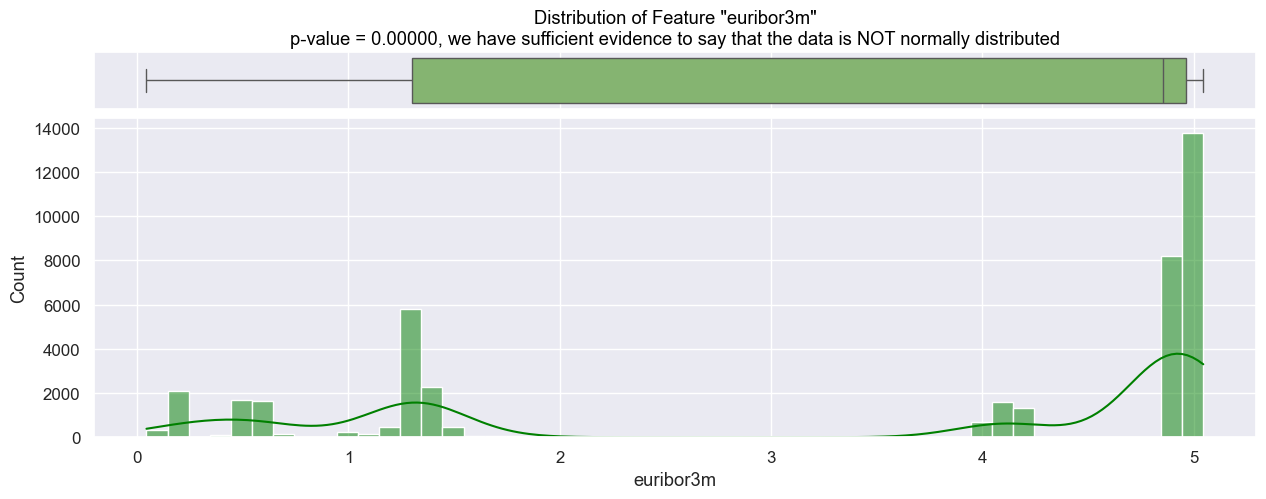

In [66]:
# Check data distribution and perform normality test

plt.figure(figsize=(15, 20))

fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(15, 5),
                                gridspec_kw={"height_ratios": (.15, .85),
                                             "hspace": 0.05})

# Normality Test
stat, pvalue = normaltest(df["euribor3m"].dropna())
if pvalue > 0.05:
    distribution = f'p-value = {pvalue:.5f}, we have sufficient evidence to say that the data is normally distributed'
else:
    distribution = f'p-value = {pvalue:.5f}, we have sufficient evidence to say that the data is NOT normally distributed'

# Data Distribution Check
ax1.set_title(f"""Distribution of Feature "euribor3m"\n{distribution}""", color="black")
sns.boxplot(x=df["euribor3m"], ax=ax1, palette="summer")
ax1.set(xlabel="")

sns.histplot(data=df["euribor3m"], ax=ax2, stat="count", kde=True, bins=50, color="green")

plt.show()


Selanjutnya, kita akan melihat nilai median fitur ini terhadap variabel target, serta memvisualisasikan distribusi data berdasarkan target.


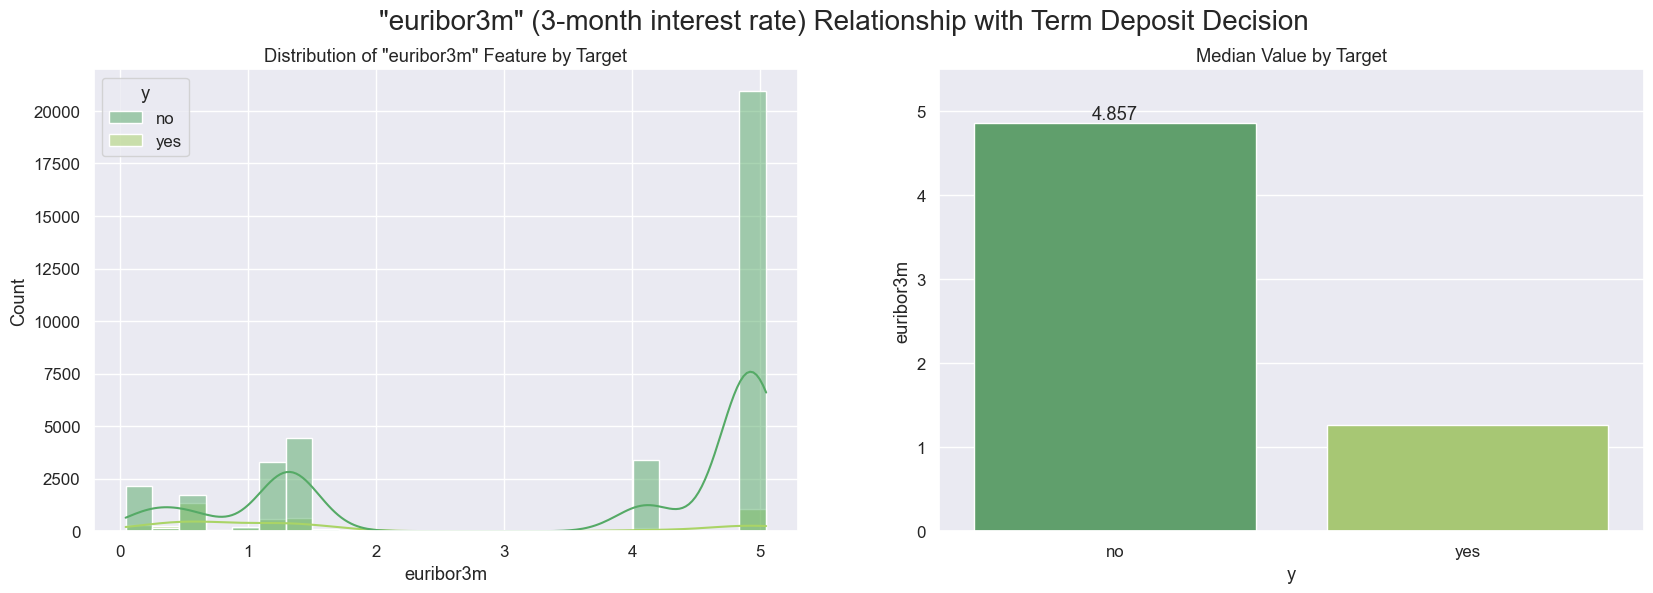

In [67]:
# Visualization of data distribution by target and median values by target

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

plt.suptitle('"euribor3m" (3-month interest rate) Relationship with Term Deposit Decision', size=20)

# Data distribution visualization by target
axes[0].set_title('Distribution of "euribor3m" Feature by Target')
plot1 = sns.histplot(data=df, hue='y', x=df['euribor3m'], stat='count',
                     ax=axes[0], kde=True, palette="summer")

# Median value by target
axes[1].set_title('Median Value by Target')
plot2 = sns.barplot(x='y', y='euribor3m', data=df, estimator=np.median, ci=0,
                    ax=axes[1], palette="summer")
plot2.bar_label(plot2.containers[0], label_type='edge')
plot2.set_ylim([0, 5.5])

plt.show()


### Insight

Dari grafik di atas, dapat dilihat bahwa orang cenderung lebih bersedia untuk berkomitmen pada deposito berjangka ketika suku bunga Eropa 3 bulan (Euribor) berada pada level yang tinggi. Sebaliknya, mereka cenderung enggan berdeposito saat Euribor rendah.

Bahkan, perbedaan nilai median Euribor antara kelompok yang menolak dan menerima deposito bisa mencapai **"4 kali lipat"**. Hal ini mungkin terjadi karena ketika suku bunga naik, nasabah lebih memilih untuk memegang kas daripada menginvestasikan dana pada deposito. Mereka mungkin ingin menjaga fleksibilitas keuangan dan bersiap menghadapi situasi ekonomi yang tidak pasti.

Dengan kata lain, Euribor yang tinggi cenderung menarik minat nasabah untuk berkomitmen pada deposito berjangka, sedangkan Euribor yang rendah membuat nasabah lebih memilih likuiditas dan fleksibilitas keuangan.


### `nr.employed` Feature

<Figure size 1500x2000 with 0 Axes>

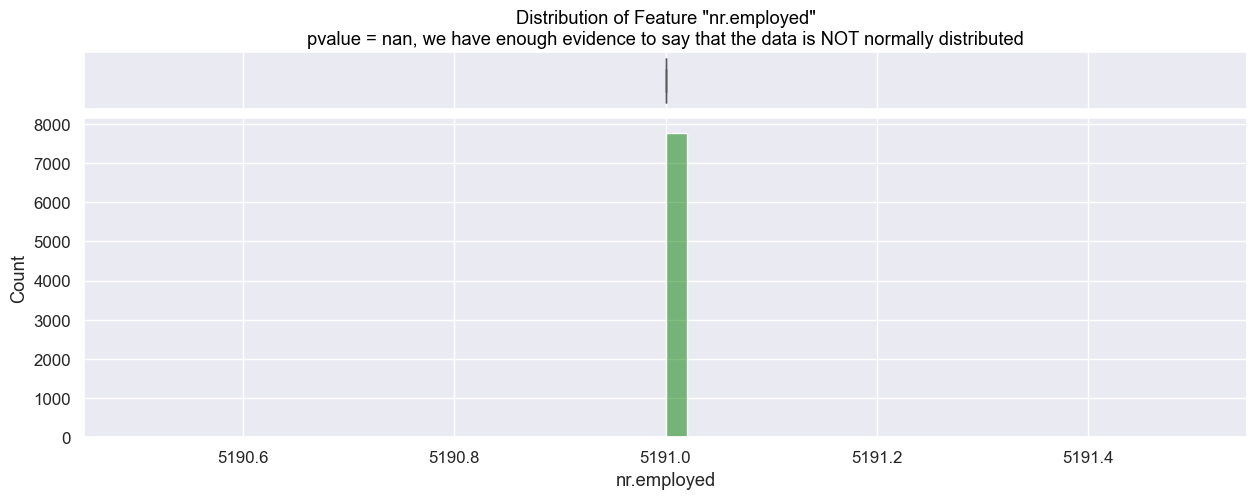

In [68]:
# Check data distribution and perform normality test

plt.figure(figsize=(15,20))

fig, (ax1, ax2) = plt.subplots(2, sharex = True, figsize = (15,5), 
                                gridspec_kw={"height_ratios": (.15, .85),
                                            "hspace": 0.05})

# Normality Test
stat, pvalue = normaltest(df["nr.employed"].dropna())
if pvalue > 0.05 :
    distribusi = f'pvalue = {pvalue:.5f}, we have enough evidence to say that the data is normally distributed'
else :
    distribusi = f'pvalue = {pvalue:.5f}, we have enough evidence to say that the data is NOT normally distributed'

# Check Data Distribution
ax1.set_title(f"""Distribution of Feature "nr.employed"\n{distribusi}""", color = "black")
sns.boxplot(x = df["nr.employed"], ax = ax1, palette="summer")
ax1.set(xlabel = "")

sns.histplot(data = df["nr.employed"], ax = ax2, stat = "count", kde=True, bins=50, color="green")

plt.show()


Selanjutnya, kita akan melihat nilai median pada fitur ini terhadap variabel target, serta memvisualisasikan distribusi data berdasarkan target.


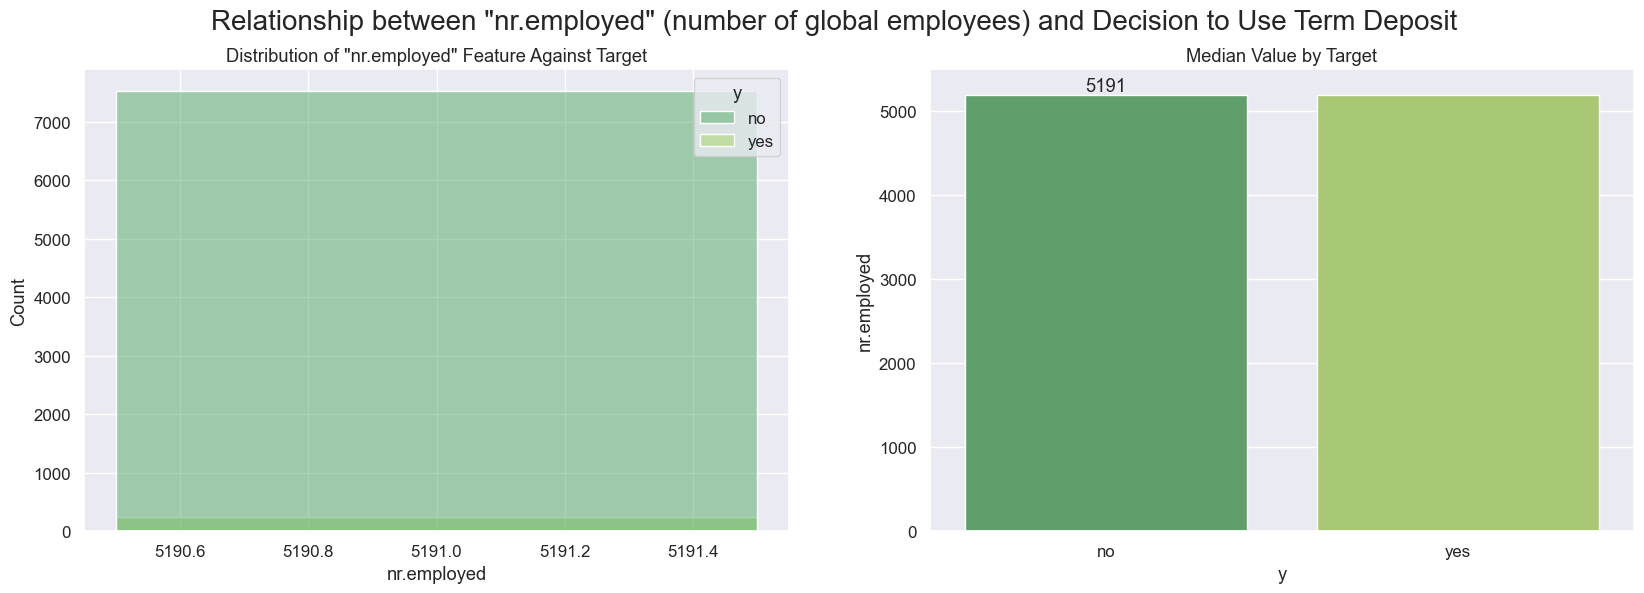

In [69]:
# Visualization of data distribution against target and median values with target

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,6))

plt.suptitle('Relationship between "nr.employed" (number of global employees) and Decision to Use Term Deposit', size=20)

# Visualization of data distribution against target
axes[0].set_title('Distribution of "nr.employed" Feature Against Target')
plot1 = sns.histplot(data=df, hue='y', x=df['nr.employed'], stat='count',
                     ax=axes[0], kde=True, palette="summer")

# Median Value by Target
axes[1].set_title('Median Value by Target')
plot2 = sns.barplot(x='y', y='nr.employed', data=df, estimator=np.median, ci=0,
                    ax=axes[1], palette="summer")
plot2.bar_label(plot2.containers[0], label_type='edge')
plot2.set_ylim([0, 5500])

plt.show()


### Insight

Dari grafik nilai median terhadap target di atas, sulit untuk melihat perbedaan yang jelas pada nilai median indikator global employment (`nr.employed`) antara nasabah yang menggunakan Deposito Berjangka dan yang tidak.

Oleh karena itu, untuk mengetahui apakah nilai median fitur `nr.employed` berbeda signifikan berdasarkan target, akan dilakukan uji hipotesis menggunakan **Uji Mann-Whitney U**.  
[Uji Mann-Whitney](https://statistics.laerd.com/spss-tutorials/mann-whitney-u-test-using-spss-statistics.php) digunakan untuk membandingkan perbedaan antara dua kelompok independen ketika variabel dependen bersifat ordinal atau kontinu dan tidak berdistribusi normal.

Kita akan melakukan Uji Mann-Whitney U dengan hipotesis awal sebagai berikut:

**Hipotesis:**

- **H₀ (Hipotesis Nol):** Distribusi `nr.employed` untuk nasabah yang berlangganan ('Yes') **sama dengan** distribusi untuk nasabah yang tidak berlangganan ('No').
- **H₁ (Hipotesis Alternatif):** Distribusi `nr.employed` untuk nasabah yang berlangganan ('Yes') **tidak sama dengan** distribusi untuk nasabah yang tidak berlangganan ('No').


In [70]:
# Mann Whitney Hypothesis Test

stat, pvalue = mannwhitneyu(
    df[df['y'] == 'yes']['nr.employed'],
    df[df['y'] == 'no']['nr.employed'],
    alternative = 'two-sided'
)
pvalue

# conclusion:
if pvalue > 0.05 :
    print(f'''
          p-value = {pvalue:.5f}
          p-value > 0.05 (Fail to reject Ho)
          
          We DO NOT HAVE sufficient evidence to state that the distribution of "nr.employed" for people who agreed to term deposit is DIFFERENT FROM
          the distribution of "nr.employed" for people who refused to term deposit
          (the data distribution is not significantly different)
          ''')
else :
    print(f'''
          p-value = {pvalue:.5f}
          p-value <= 0.05 (Successfully reject Ho)
          
          We HAVE sufficient evidence to state that the distribution of "nr.employed" for people who agreed to term deposit is DIFFERENT FROM
          the distribution of "nr.employed" for people who refused to term deposit
          (the data distribution is significantly different)
          ''')



          p-value = nan
          p-value <= 0.05 (Successfully reject Ho)
          
          We HAVE sufficient evidence to state that the distribution of "nr.employed" for people who agreed to term deposit is DIFFERENT FROM
          the distribution of "nr.employed" for people who refused to term deposit
          (the data distribution is significantly different)
          


### Insight

Berdasarkan hasil Uji Mann-Whitney di atas, dapat disimpulkan bahwa **terdapat cukup bukti untuk menyatakan bahwa distribusi "`nr.employed`" antara nasabah yang menggunakan Deposito Berjangka dan yang tidak berbeda secara signifikan**. Artinya, fitur **`nr.employed`** mungkin berpengaruh terhadap keputusan nasabah untuk menggunakan atau tidak menggunakan produk Deposito Berjangka pada campaign sebelumnya.


### **Ringkasan EDA**

Berdasarkan analisis sebelumnya, beberapa poin utama dapat dirangkum sebagai berikut:


| No. | Insight                                                                                                               |
|-----|-----------------------------------------------------------------------------------------------------------------------|
| 1   | Calon nasabah usia **30–45 tahun** adalah target utama bank karena dianggap matang secara finansial.                  |
| 2   | Kelompok usia **56–74 tahun** & **15–24 tahun** punya conversion rate tertinggi (**0,43** & **0,24**).                |
| 3   | Pekerja **admin** dan **blue-collar** paling sering ditawari, namun **student** dan **retired** punya CR lebih tinggi (**0,31** & **0,25**). |
| 4   | Nasabah **single** memiliki conversion rate lebih tinggi (**0,14**) dibandingkan **menikah**, meski lebih jarang dihubungi. |
| 5   | Nasabah **university degree** paling sering ditawari & CR tinggi (**0,14**).                                          |
| 6   | Nasabah **default** punya **CR 0%**; hanya **3 orang (0,0072%)** dalam kategori ini.                                  |
| 7   | Tidak ada perbedaan signifikan pada CR antara nasabah yang **punya/tidak punya kredit rumah**.                        |
| 8   | Nasabah **tanpa kredit** lebih sering dihubungi, namun CR hampir sama dengan yang **punya kredit**.                   |
| 9   | Kontak via **ponsel** efektif (CR **0,15**), lebih baik dari **landline** (**0,05**).                                 |
| 10  | **Maret, September, Oktober, Desember** CR tinggi meski kontak rendah. **Mei**: kontak tinggi, CR rendah.             |
| 11  | **Kamis** jadi hari terbaik untuk kontak terakhir (**CR 0,12**).                                                      |
| 12  | **Durasi telepon sangat panjang** punya CR tertinggi, diikuti panjang-sedang, sedang-pendek, dan sangat pendek.       |
| 13  | Mayoritas nasabah **belum pernah dihubungi** (kategori **999**).                                                      |
| 14  | Median durasi kontak terakhir tidak beda signifikan antara yang subscribe & tidak.                                    |
| 15  | Mayoritas nasabah **tidak dihubungi pada campaign sebelumnya** (kategori **0**).                                      |


### **Rekomendasi EDA**

Setelah melakukan analisis data, terdapat beberapa rekomendasi aksi yang dapat diambil untuk meningkatkan conversion rate, sehingga dapat berkontribusi langsung terhadap peningkatan profitabilitas perusahaan:

| No. | Rekomendasi                                                                                        | Penjelasan Singkat                                                                                      |
|-----|----------------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------------|
| 1   | **Target Demografi Lebih Spesifik**                                                                | Fokuskan pemasaran pada kelompok usia 17–25 tahun & 65–74 tahun, serta prioritas pada mahasiswa dan pensiunan. |
| 2   | **Targetkan Nasabah Single**                                                                       | Lebih aktif memasarkan pada nasabah dengan status single, karena conversion rate tinggi meski exposure rendah. |
| 3   | **Penyuluhan dan Edukasi**                                                                         | Sediakan materi edukasi tentang pentingnya deposito pada nasabah dengan pendidikan rendah, termasuk kategori "Illiterate". |
| 4   | **Hindari Nasabah dengan Riwayat Pembayaran Buruk**                                                | Selektif dalam menghubungi nasabah yang memiliki riwayat gagal bayar kredit.                              |
| 5   | **Prioritaskan Kontak via Ponsel**                                                                 | Gunakan nomor ponsel lebih sering dibandingkan telepon rumah untuk menghubungi nasabah.                  |
| 6   | **Pantau Suku Bunga Euribor**                                                                      | Tingkatkan kontak pada saat tren suku bunga Euribor menurun.                                             |
| 7   | **Prioritaskan Kontak di Hari Kamis**                                                              | Kontak nasabah lebih banyak di hari Kamis, karena hari ini memiliki conversion rate tertinggi.            |
| 8   | **Pendekatan Interaktif dan Kreatif**                                                              | Usahakan interaksi percakapan lebih panjang dan interaktif, karena durasi telepon yang lebih lama cenderung meningkatkan minat. |
| 9   | **Batasi Jumlah Kontak Kampanye**                                                                  | Maksimal 20 kali kontak per nasabah, agar tidak dianggap spam dan menjaga efektivitas kampanye.           |
| 10  | **Fokus pada Nasabah yang Pernah Berlangganan**                                                    | Berikan perhatian khusus kepada nasabah yang sebelumnya pernah berlangganan deposito.                     |
| 11  | **Pantau Indikator Ekonomi**                                                                       | Hubungi nasabah saat "Employment Variation Rate" negatif, CPI rendah, dan CCI tinggi.                     |
| 12  | **Prioritaskan Saat Euribor 3-Bulan Rendah**                                                       | Kontak nasabah ketika Euribor 3-bulan rendah karena dapat berpengaruh lebih besar pada keputusan mereka.   |
| 13  | **Perhatikan Jumlah Pegawai**                                                                      | Kontak nasabah saat indikator "Number of Employees" rendah, karena kondisi ini bisa memengaruhi keputusan terkait deposito. |

Dengan menerapkan rekomendasi ini dan mengadaptasikannya dalam strategi pemasaran yang lebih detail, diharapkan dapat meningkatkan conversion rate serta mendukung pertumbuhan bisnis perusahaan.


# Chapter IV : Data Preprocessing 
---

In [71]:
df_preprocessed = df.copy()

In [72]:
# Tipe data, jumlah data kosong, jumlah data unik, dan sampel data unik pada setiap featue

listItem = []
for col in df_preprocessed.columns :
    listItem.append([col, df_preprocessed[col].dtype, df_preprocessed[col].isna().sum(), round((df_preprocessed[col].isna().sum()/len(df_preprocessed[col])) * 100,2),
                    df_preprocessed[col].nunique(), list(df_preprocessed[col].drop_duplicates().sample(2).values)])

dfDesc = pd.DataFrame(columns=['Data Features', 'Data Type', 'Null', 'Null Percentage', 'Unique', 'Unique Sample'],
                     data=listItem)
dfDesc

Data Features Data Type   Null  Null Percentage  Unique  \
0              age     int64      0             0.00      78   
1              job    object      0             0.00      12   
2          marital    object      0             0.00       4   
3        education    object      0             0.00       8   
4          default    object      0             0.00       3   
5          housing    object      0             0.00       3   
6             loan    object      0             0.00       3   
7          contact    object      0             0.00       2   
8            month    object      0             0.00      10   
9      day_of_week    object      0             0.00       5   
10        duration     int64      0             0.00    1544   
11        campaign     int64      0             0.00      42   
12           pdays     int64      0             0.00      27   
13        previous     int64      0             0.00       8   
14        poutcome    object      0             0.00       3   
15    emp.var.rate   float64      0             0.00      10   
16  cons.price.idx   float64  12036            29.22       9   
17   cons.conf.idx   float64      0             0.00      26   
18       euribor3m   float64      0             0.00     315   
19     nr.employed   float64  33425            81.15       1   
20               y    object      0             0.00       2   
21       age_range  category      0             0.00       9   

              Unique Sample  
0                  [37, 95]  
1   [technician, housemaid]  
2        [divorced, single]  
3       [unknown, basic.4y]  
4             [unknown, no]  
5            [unknown, yes]  
6             [unknown, no]  
7     [telephone, cellular]  
8                [nov, apr]  
9                [fri, wed]  
10               [704, 221]  
11                 [40, 11]  
12                  [0, 25]  
13                   [2, 6]  
14   [success, nonexistent]  
15             [-2.9, -1.7]  
16         [93.798, 93.075]  
17           [-40.4, -34.8]  
18     [4.865, 0.628472222]  
19            [nan, 5191.0]  
20                [no, yes]  
21           [40-49, 50-59]

## 1. Checking Duplicated Data
- jika ada duplikat data akan didrop

In [73]:
df_preprocessed.duplicated().sum()  # Mengecek jumlah data duplikat pada DataFrame

12

In [74]:
df_preprocessed.drop_duplicates(inplace=True)  # Menghapus data duplikat

In [75]:
df_preprocessed.duplicated().sum()  # Mengecek jumlah data duplikat pada DataFrame

0

## 2. Outlier and Distribution Handling

### a. Winsorizing (Capping)

In [76]:
cols = ['age', 'duration', 'campaign']
for col in cols:
    Q1 = df_preprocessed[col].quantile(0.25)
    Q3 = df_preprocessed[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df_preprocessed[col] = df_preprocessed[col].clip(lower, upper)


In [77]:
# Kolom kategori
def pdays_category(x):
    if x == 999:
        return 'never'
    elif x <= 7:
        return 'recent'
    elif x <= 30:
        return 'last_month'
    else:
        return 'long_ago'

df_preprocessed['pdays_cat'] = df_preprocessed['pdays'].apply(pdays_category)


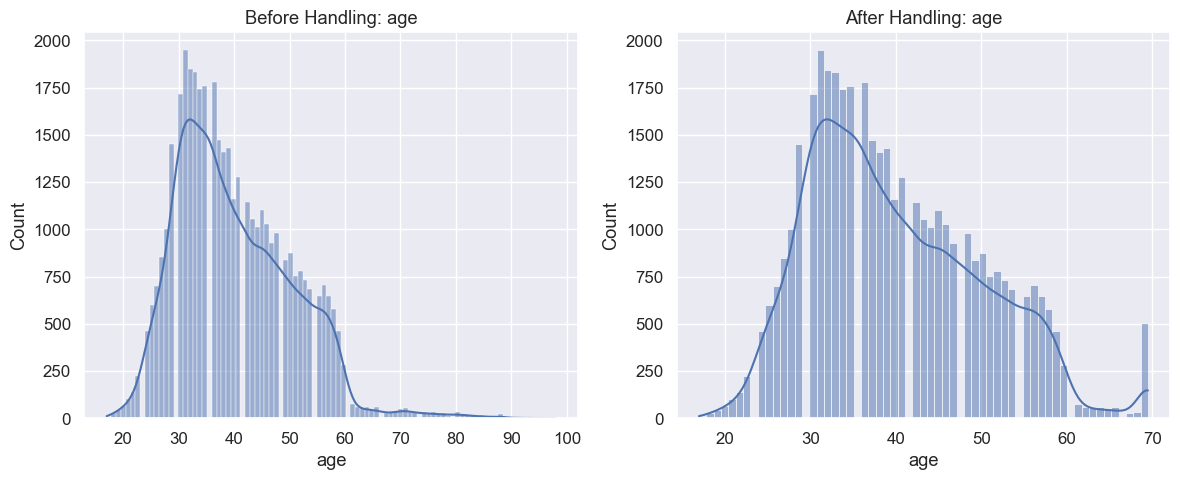

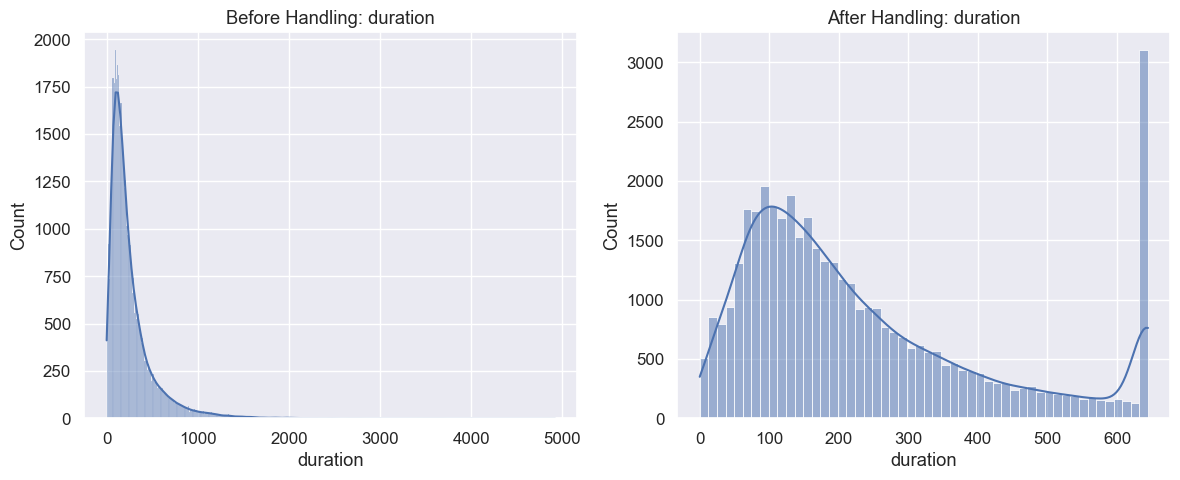

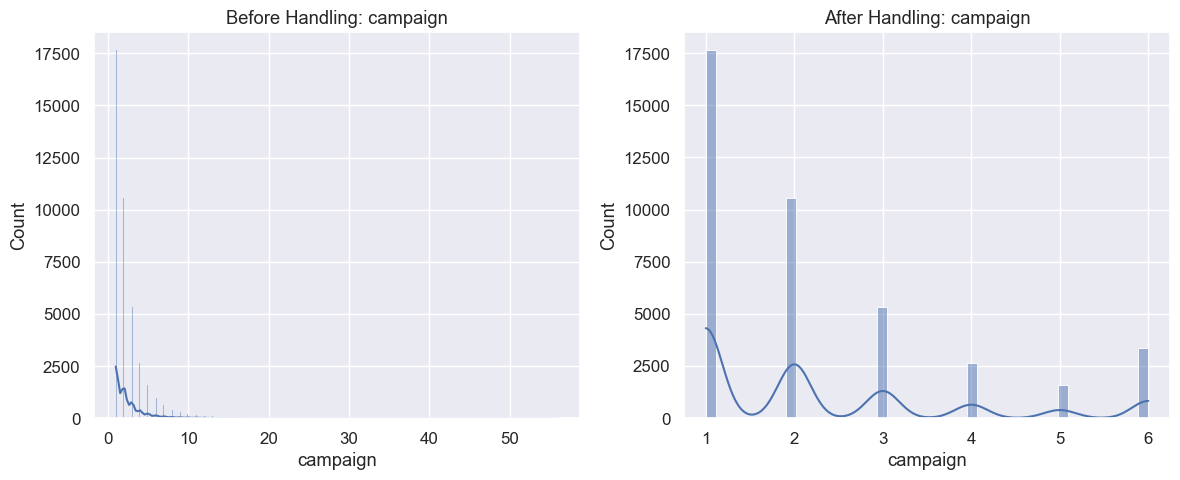

In [78]:
cols = ['age', 'duration', 'campaign']

for col in cols:
    plt.figure(figsize=(12, 5))
    
    # Plot sebelum handling (original)
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True)
    plt.title(f"Before Handling: {col}")

    # Plot sesudah handling (preprocessed)
    plt.subplot(1, 2, 2)
    sns.histplot(df_preprocessed[col], kde=True)
    plt.title(f"After Handling: {col}")

    plt.tight_layout()
    plt.show()


### b. Log Transform

In [79]:

# for col in ['duration', 'campaign', 'previous']:
#     df_preprocessed[col + '_log'] = np.log1p(df_preprocessed[col])


In [80]:
# for col in ['duration', 'campaign', 'previous']:
#     plt.figure(figsize=(12, 5))
#     plt.subplot(1, 2, 1)
#     sns.histplot(df_preprocessed[col], kde=True)
#     plt.title(f'Original (After Capping): {col}')
    
#     plt.subplot(1, 2, 2)
#     sns.histplot(df_preprocessed[col + '_log'], kde=True)
#     plt.title(f'Log-Transformed: {col}')
#     plt.tight_layout()
#     plt.show()


### c. Handling Pdays Column 

In [81]:
df['pdays'].value_counts()

pdays
999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: count, dtype: int64

pdays_cat
Y    Axes(0.125,0.11;0.775x0.77)
Name: count, dtype: object

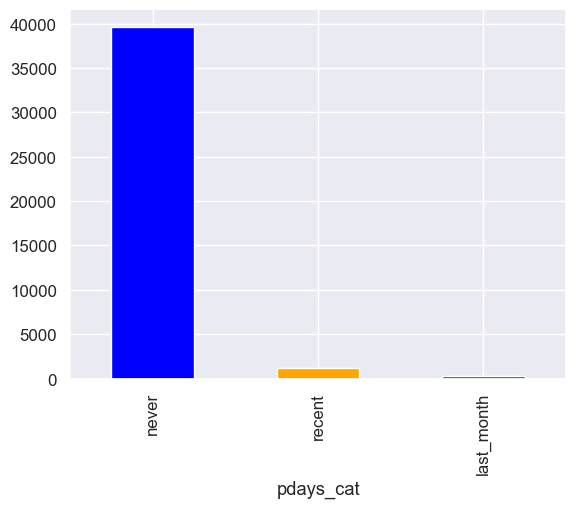

In [82]:
df_preprocessed['pdays_cat'].value_counts().groupby(lambda x: 'Y').plot(kind='bar', color=['blue', 'orange', 'green', 'red'])

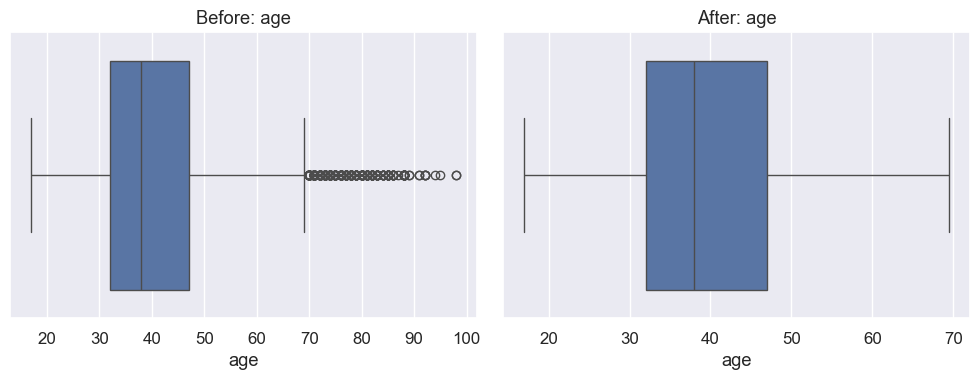

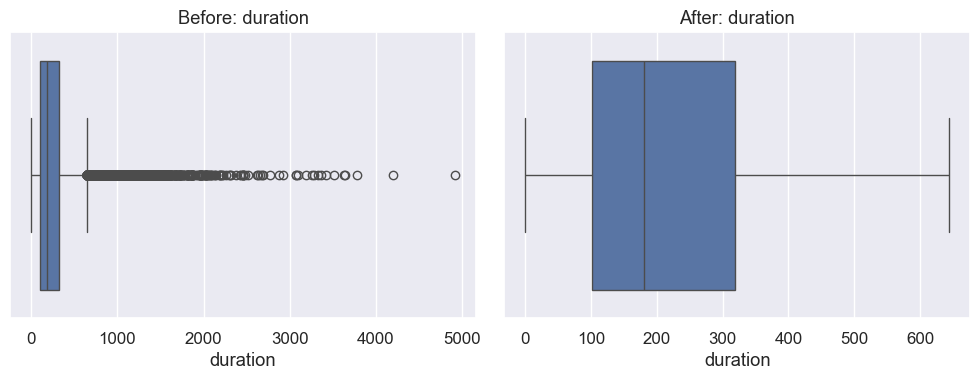

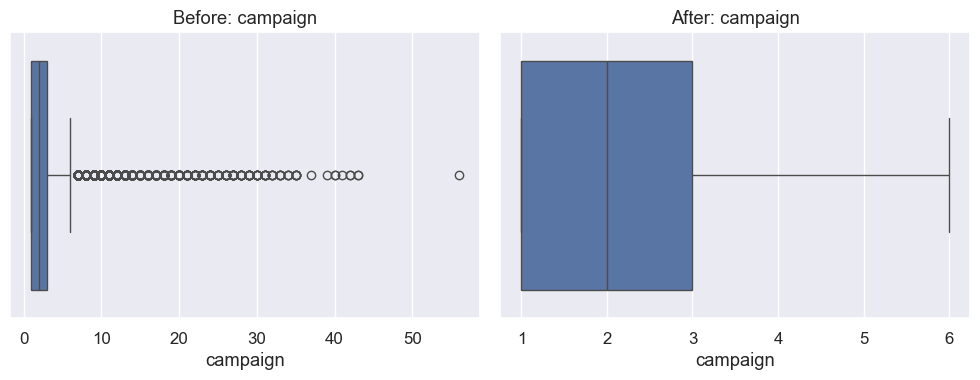

In [83]:
for col in cols:
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.boxplot(x=df[col])
    plt.title(f"Before: {col}")

    plt.subplot(1, 2, 2)
    sns.boxplot(x=df_preprocessed[col])
    plt.title(f"After: {col}")

    plt.tight_layout()
    plt.show()


## 3. Missing Values

In [84]:
df_preprocessed.isna().sum()  # Mengecek jumlah data kosong pada DataFrame

age                   0
job                   0
marital               0
education             0
default               0
housing               0
loan                  0
contact               0
month                 0
day_of_week           0
duration              0
campaign              0
pdays                 0
previous              0
poutcome              0
emp.var.rate          0
cons.price.idx    12033
cons.conf.idx         0
euribor3m             0
nr.employed       33414
y                     0
age_range             0
pdays_cat             0
dtype: int64

In [85]:
missing_percent = df_preprocessed.isna().sum() / len(df_preprocessed) * 100
print(missing_percent[missing_percent > 0])

cons.price.idx    29.223334
nr.employed       81.149213
dtype: float64


#### a. Drop Column 'nr.employed'

'nr.employed':
- persentase missing terlalu besar, kolom tidak variatif dan juga tidak relevan untuk prediksi

In [86]:

df_preprocessed = df_preprocessed.drop(columns=['nr.employed'])


### b. imputasi missing value 'cons.price.idx' menggunakan Median per bulannya

In [87]:
df_preprocessed['cons.price.idx'].describe()

count    29143.000000
mean        93.771859
std          0.469915
min         92.756000
25%         93.444000
50%         93.918000
75%         93.994000
max         94.465000
Name: cons.price.idx, dtype: float64

In [88]:
df_preprocessed[['day_of_week','month', 'cons.price.idx']].value_counts().sort_index()


day_of_week  month  cons.price.idx
fri          apr    93.075             585
             aug    93.444             857
             dec    92.756               3
             jul    93.918             917
             jun    94.465            1019
             mar    92.843              51
             may    92.893             491
                    93.994            1661
             oct    93.798              16
mon          apr    93.075             657
             aug    93.444            1036
             dec    92.756               3
             jul    93.918            1440
             jun    94.465            1003
             mar    92.843              74
             may    92.893             431
                    93.994            1372
             oct    93.798              14
thu          apr    93.075             713
             aug    93.444            1138
             dec    92.756               2
             jul    93.918            1544
             jun   

In [89]:
# Mengisi missing value dengan median dari bulan yang sama
df_preprocessed['cons.price.idx'] = df_preprocessed.groupby('month')['cons.price.idx'].transform(lambda x: x.fillna(x.median()))


In [90]:
# Step 2: Isi sisa NaN dengan median global sebagai fallback
df_preprocessed['cons.price.idx'].fillna(df_preprocessed['cons.price.idx'].median(), inplace=True)


In [91]:
df_preprocessed.isnull().sum()  # Mengecek jumlah data kosong pada DataFrame setelah imputasi

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
y                 0
age_range         0
pdays_cat         0
dtype: int64

In [92]:
df_preprocessed.info()  # Mengecek informasi DataFrame setelah imputasi

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             41176 non-null  float64 
 1   job             41176 non-null  object  
 2   marital         41176 non-null  object  
 3   education       41176 non-null  object  
 4   default         41176 non-null  object  
 5   housing         41176 non-null  object  
 6   loan            41176 non-null  object  
 7   contact         41176 non-null  object  
 8   month           41176 non-null  object  
 9   day_of_week     41176 non-null  object  
 10  duration        41176 non-null  float64 
 11  campaign        41176 non-null  int64   
 12  pdays           41176 non-null  int64   
 13  previous        41176 non-null  int64   
 14  poutcome        41176 non-null  object  
 15  emp.var.rate    41176 non-null  float64 
 16  cons.price.idx  41176 non-null  float64 
 17  cons.conf.idx   4

## 4. Handling Value: 'Unknown'

In [93]:
cols_to_check = [
    'job', 'marital', 'education', 'default', 'housing',
    'loan', 'contact', 'poutcome'
]

# Baris yang ada 'unknown' di salah satu kolom di atas
unknown_rows = df_preprocessed[df_preprocessed[cols_to_check].isin(['unknown']).any(axis=1)]

print(unknown_rows)
print(f"Jumlah baris mengandung 'unknown': {len(unknown_rows)}")


        age          job  marital    education  default housing loan  \
1      57.0     services  married  high.school  unknown      no   no   
5      45.0     services  married     basic.9y  unknown      no   no   
7      41.0  blue-collar  married      unknown  unknown      no   no   
10     41.0  blue-collar  married      unknown  unknown      no   no   
15     54.0      retired  married     basic.9y  unknown     yes  yes   
...     ...          ...      ...          ...      ...     ...  ...   
41118  34.0   technician  married      unknown       no     yes   no   
41120  60.0       admin.  married      unknown       no      no   no   
41122  34.0   technician  married      unknown       no      no   no   
41135  54.0   technician  married      unknown       no     yes   no   
41175  34.0      student   single      unknown       no     yes   no   

         contact month day_of_week  ...  pdays  previous     poutcome  \
1      telephone   may         mon  ...    999         0  none

In [94]:
for col in cols_to_check:
    print(f"Value counts untuk kolom '{col}':")
    print(df_preprocessed[col].value_counts())
    print("-" * 40)


Value counts untuk kolom 'job':
job
admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64
----------------------------------------
Value counts untuk kolom 'marital':
marital
married     24921
single      11564
divorced     4611
unknown        80
Name: count, dtype: int64
----------------------------------------
Value counts untuk kolom 'education':
education
university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
unknown                 1730
illiterate                18
Name: count, dtype: int64
----------------------------------------
Value counts untuk kolom 'default':
default
no         32577
unknown     8596
yes          

In [95]:
# List kolom kategorikal/object yang ingin dicek
cols_to_check = [
    'job', 'marital', 'education', 'default', 'housing',
    'loan', 'contact', 'poutcome'
]

# Total baris
total_rows = len(df_preprocessed)

# Hitung jumlah dan persentase 'unknown' per kolom
unknown_summary = []
for col in cols_to_check:
    count_unknown = (df_preprocessed[col] == 'unknown').sum()
    percent_unknown = count_unknown / total_rows * 100
    unknown_summary.append((col, count_unknown, percent_unknown))

# Tampilkan sebagai tabel markdown
import pandas as pd
unknown_df = pd.DataFrame(unknown_summary, columns=['Kolom', 'Jumlah unknown', 'Persentase (%)'])
print(unknown_df.to_markdown(index=False, floatfmt=".2f"))

| Kolom     |   Jumlah unknown |   Persentase (%) |
|:----------|-----------------:|-----------------:|
| job       |              330 |             0.80 |
| marital   |               80 |             0.19 |
| education |             1730 |             4.20 |
| default   |             8596 |            20.88 |
| housing   |              990 |             2.40 |
| loan      |              990 |             2.40 |
| contact   |                0 |             0.00 |
| poutcome  |                0 |             0.00 |


#### a. Drop 'Unknown' Value < 5 %

In [96]:
# Daftar kolom yang ingin dicek
cols_to_drop_unknown = ['job', 'marital', 'education', 'housing', 'loan']

# Drop baris yang mengandung 'unknown' di kolom tersebut
df_preprocessed = df_preprocessed[~df_preprocessed[cols_to_drop_unknown].isin(['unknown']).any(axis=1)].copy()

# Cek jumlah baris setelah dibersihkan
print(f"Jumlah baris setelah drop: {len(df_preprocessed)}")


Jumlah baris setelah drop: 38234


#### b. Imputasi 'Unknown' value on 'default' column

In [97]:
df_preprocessed.value_counts('default')

default
no         30475
unknown     7756
yes            3
Name: count, dtype: int64

y           no   yes    All
default                    
no       26617  3858  30475
unknown   7357   399   7756
yes          3     0      3
All      33977  4257  38234


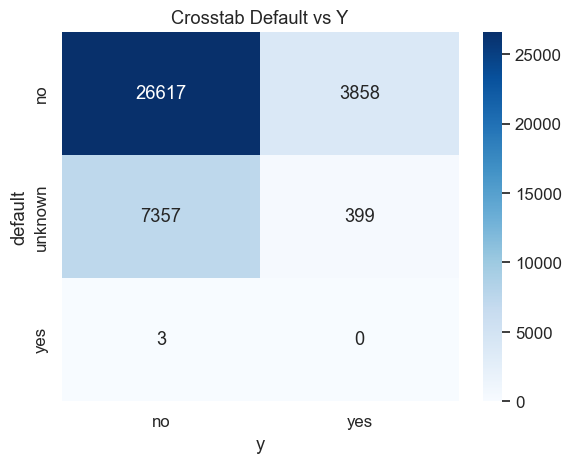

In [98]:
crosstab_default_y = pd.crosstab(df_preprocessed['default'], df_preprocessed['y'], margins=True)
print(crosstab_default_y)

sns.heatmap(crosstab_default_y.iloc[:-1,:-1], annot=True, fmt='d', cmap='Blues')
plt.title('Crosstab Default vs Y')
plt.show()


#### Analisis Crosstab antara Kolom `default` dan Target `y`

| default  | y=no  | y=yes | Total   |
|----------|-------|-------|---------|
| no       | 26617 |  3858 |  30475  |
| unknown  |  7357 |   399 |   7756  |
| yes      |     3 |     0 |      3  |

**Insight:**
- Mayoritas data dengan nilai `default=unknown` (95%) memiliki target `y=no`.
- Proporsi `y=yes` untuk `default=unknown` lebih kecil (5.1%) dibandingkan dengan `default=no` (12.7%).
- Hanya terdapat 3 data dengan `default=yes`, sehingga kontribusinya ke model sangat kecil.

**Implikasi:**
- Imputasi nilai `unknown` pada kolom `default` secara statistik lebih baik diganti ke `no`.
- Alternatif lain adalah tetap mempertahankan kategori 'unknown' jika menggunakan model tree-based.
- Menghapus baris dengan nilai `unknown` kurang disarankan karena dapat menghilangkan banyak data.


In [99]:
df_preprocessed['default'] = df_preprocessed['default'].replace('unknown', 'no')

In [100]:
# Drop baris dengan nilai 'yes' pada kolom 'default'
df_preprocessed = df_preprocessed[df_preprocessed['default'] != 'yes']

In [101]:
print(df_preprocessed['default'].value_counts())


default
no    38231
Name: count, dtype: int64


## 5. Mapping

In [102]:
df_mapped = df_preprocessed.copy()

#### a. 'education' Column

In [103]:
df_mapped['education'].value_counts()

education
university.degree      11817
high.school             9240
basic.9y                5856
professional.course     5095
basic.4y                4002
basic.6y                2203
illiterate                18
Name: count, dtype: int64

In [104]:
df_mapped['education'] = df_mapped['education'].replace({
    'basic.4y': 'middle_school', 'basic.6y': 'middle_school', 'basic.9y': 'middle_school',
    'high.school': 'high_school', 'university.degree': 'university',
    'professional.course': 'professional',
    'illiterate': 'illiterate'
})


#### b. 'age' Column

In [105]:
df_mapped['age'] = df_mapped['age'].astype(int)
df_mapped['age'].head()


0    56
1    57
2    37
3    40
4    56
Name: age, dtype: int32

#### c. binning 'age' Column

In [106]:
def classify_generation(age):
    if 76 <= age <= 96:
        return 'silent'
    elif 60 <= age <= 77:
        return 'boomers'
    elif 44 <= age <= 61:
        return 'x'
    elif 28 <= age <= 43:
        return 'millenials'
    elif 12 <= age <= 27:
        return 'z'
    else:
        return 'alpha'

df_mapped['generation'] = df_mapped['age'].apply(classify_generation)


## 6. Saving to Excel

In [107]:
df_mapped.to_csv('data_bank_dashboard.csv', index=False)  # Simpan DataFrame yang sudah diproses ke file CSV

## 7. Rechecking Data Before Modelling

<Axes: >

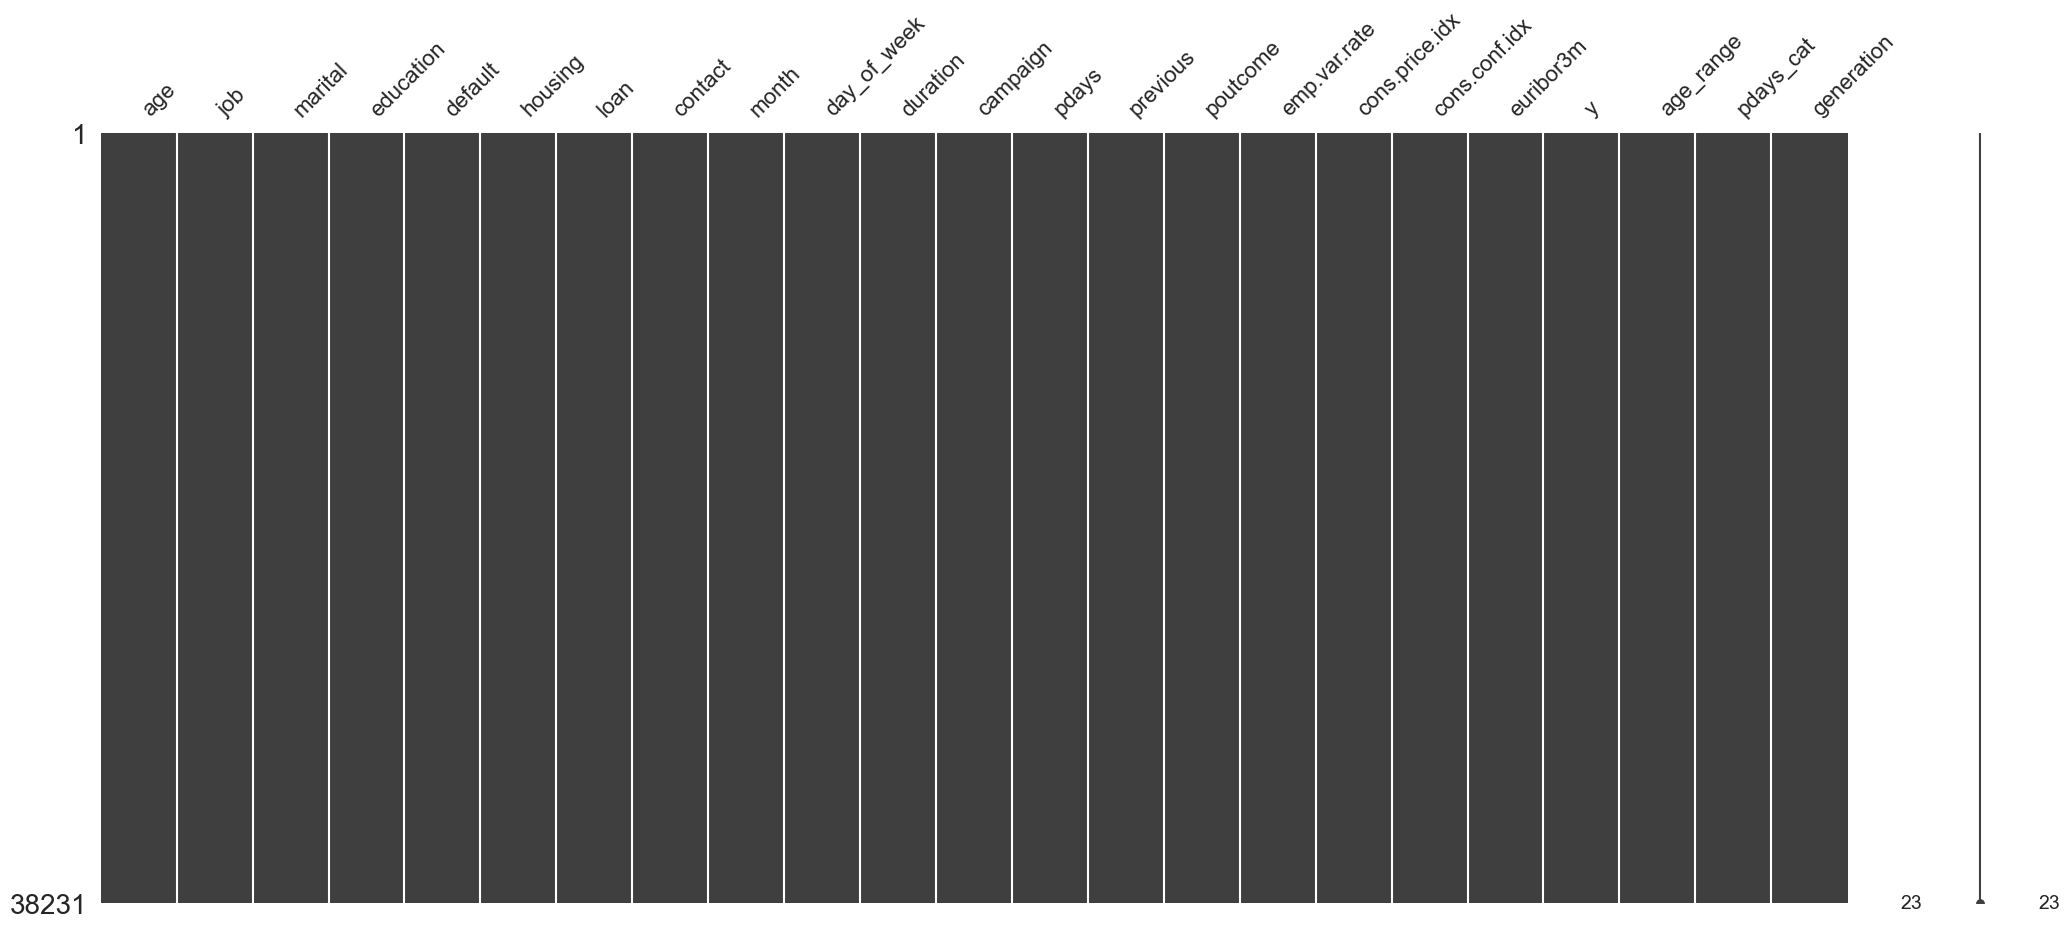

In [108]:
msno.matrix(df_mapped)  # Visualisasi missing values pada DataFrame yang sudah diproses

#### a. Drop features `default`, `age_range`, and `duration` for modelling

In [109]:
df_mapped['default'].value_counts()

default
no    38231
Name: count, dtype: int64

In [110]:
df_mapped['duration'].value_counts()

duration
644.5    2749
90.0      163
85.0      161
72.0      152
87.0      151
         ... 
598.0       5
0.0         4
3.0         3
1.0         3
2.0         1
Name: count, Length: 646, dtype: int64

In [111]:
df_mapped['age_range'].value_counts()

age_range
30-39    16015
40-49     9702
50-59     6220
20-29     5228
60-69      614
70-79      277
80-89      128
<20         41
90+          6
Name: count, dtype: int64

In [112]:
df_mapped.drop(columns=['default', 'age_range', 'duration'], inplace=True)  # Menghapus kolom yang tidak diperlukan

#### Alasan Drop Kolom `default`, `age_range`, dan `duration`

1. **default**
   - Semua nilai sama (`no`).
   - Tidak ada informasi yang bisa digunakan untuk model (tidak variatif).
   - Fitur dengan variansi nol tidak membantu proses prediksi.

2. **age_range**
   - Merupakan kategori dari fitur `age` (numerik).
   - Redundan dan bisa menyebabkan duplikasi informasi.
   - Lebih baik menggunakan `age` sebagai fitur utama karena model lebih fleksibel dalam mengolah data numerik.

3. **duration**
   - Hanya diketahui setelah proses telemarketing terjadi.
   - Termasuk fitur data leakage karena informasinya tidak tersedia sebelum proses prediksi.
   - Tidak seharusnya digunakan dalam model prediksi untuk menghindari kebocoran informasi.

> **Drop ketiga kolom ini adalah langkah yang tepat untuk menjaga kualitas, kejujuran, dan efektivitas model prediksi.**


<Axes: >

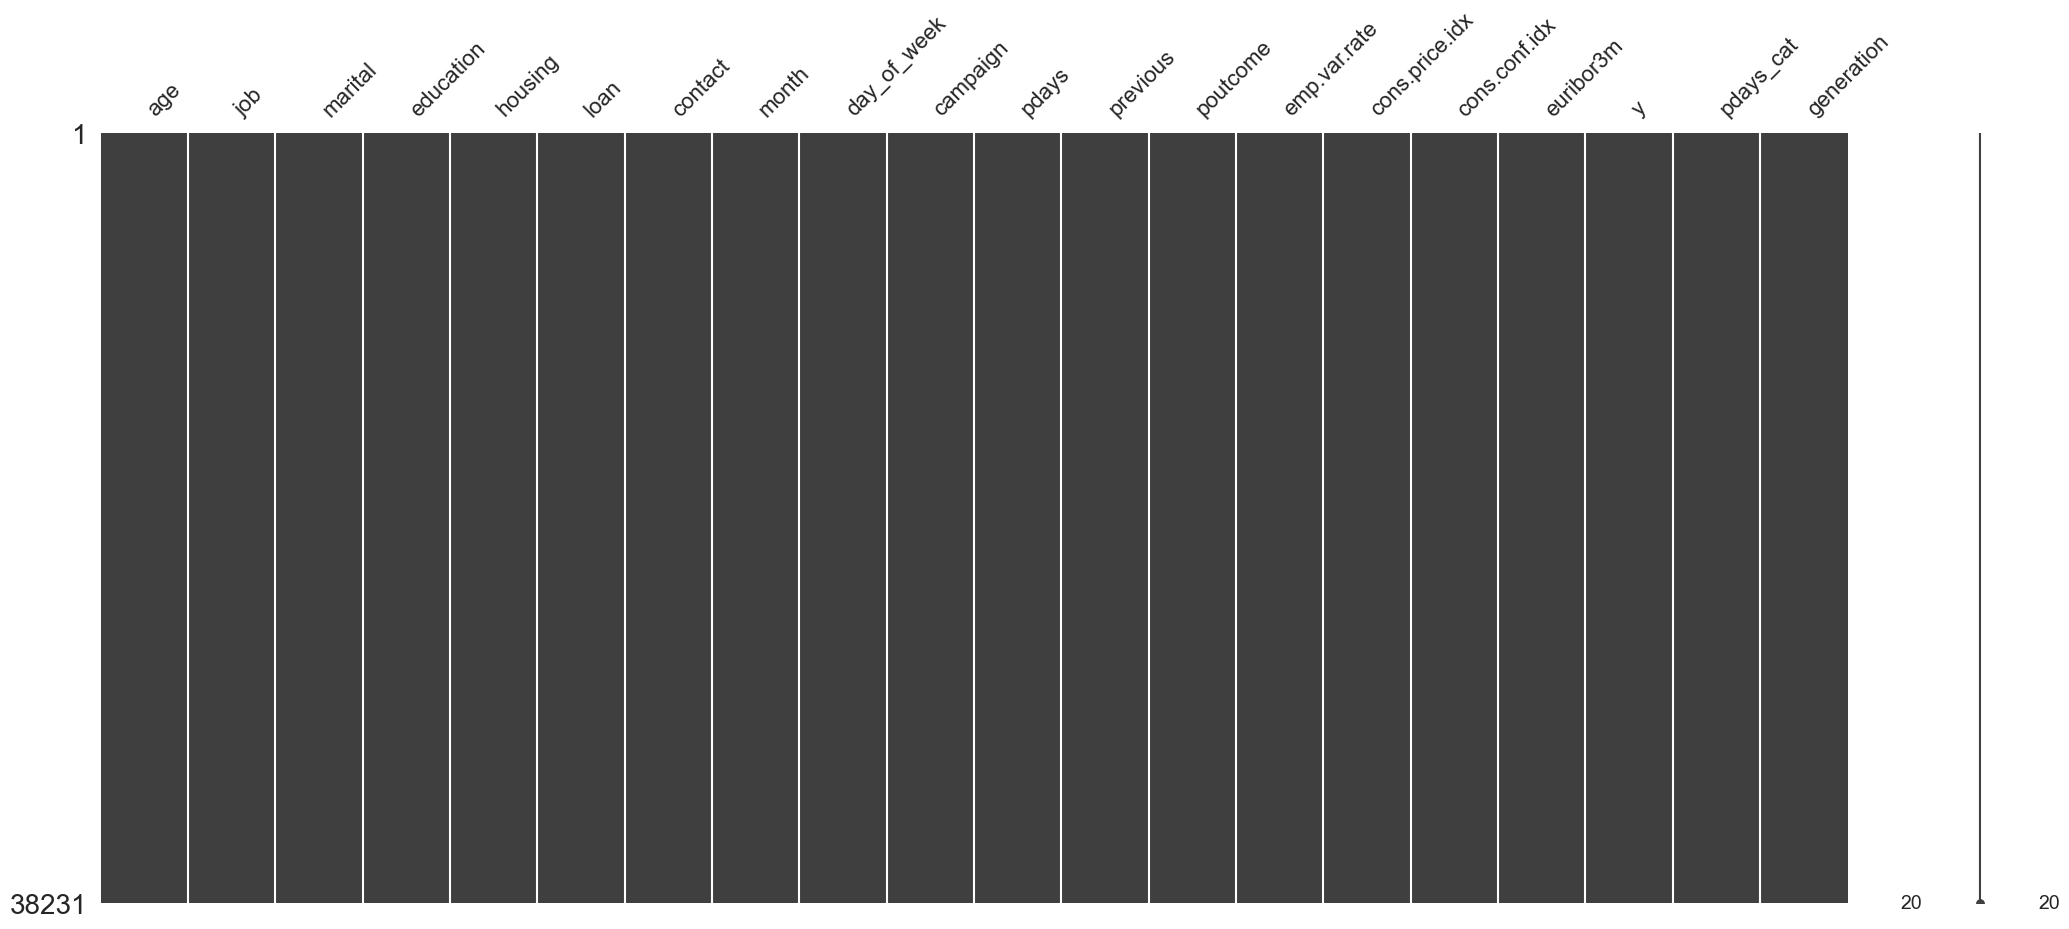

In [113]:
msno.matrix(df_mapped)  # Visualisasi missing values pada DataFrame yang sudah diproses

## 8. Save Again For Modelling

In [114]:
df_mapped.to_csv('data_bank_modelling.csv', index=False)  # Simpan DataFrame yang sudah diproses ke file CSV

# Chapter V : Modelling
---

In [115]:
df_model = df_mapped.copy()

In [116]:
df_model.isnull().sum()  # Mengecek jumlah data kosong pada DataFrame

age               0
job               0
marital           0
education         0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
y                 0
pdays_cat         0
generation        0
dtype: int64

In [117]:
df_model.info()  # Mengecek informasi DataFrame model

<class 'pandas.core.frame.DataFrame'>
Index: 38231 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             38231 non-null  int32  
 1   job             38231 non-null  object 
 2   marital         38231 non-null  object 
 3   education       38231 non-null  object 
 4   housing         38231 non-null  object 
 5   loan            38231 non-null  object 
 6   contact         38231 non-null  object 
 7   month           38231 non-null  object 
 8   day_of_week     38231 non-null  object 
 9   campaign        38231 non-null  int64  
 10  pdays           38231 non-null  int64  
 11  previous        38231 non-null  int64  
 12  poutcome        38231 non-null  object 
 13  emp.var.rate    38231 non-null  float64
 14  cons.price.idx  38231 non-null  float64
 15  cons.conf.idx   38231 non-null  float64
 16  euribor3m       38231 non-null  float64
 17  y               38231 non-null  obje

## 1. Define Variable 

| **Variable** | **Type**            | **Description**                                                   |
|--------------|---------------------|-------------------------------------------------------------------|
| **x**        | Independent Variable| The features used to predict the target variable ().     |
| **y**        | Dependent Variable  | The target variable to be predicted ().                  |

In [118]:
# Feature & Target Setting
# =============================
target = 'y' 

X = df_model.drop(target, axis=1)
y = df_model[target].map({'no': 0, 'yes': 1})


## 2. Pipeline
Pipeline adalah serangkaian langkah (steps) yang dijalankan secara berurutan untuk memproses data, mulai dari tahap data preprocessing hingga modeling dan evaluasi. Tujuan utama pipeline adalah untuk mengotomatisasi dan merapikan proses kerja sehingga lebih efisien, terstruktur, dan mudah direproduksi.

#### Komponen Umum Pipeline

| **Tahap**           | **Deskripsi**                                                                                                                                       | **Contoh Teknik/Metode**                   |
|---------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------|--------------------------------------------|
| **Preprocessing**   | - Pembersihan data dari missing value dan outlier<br>- Encoding data kategorik<br>- Scaling/normalisasi data numerik                                 | Imputation, LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler |
| **Feature Engineering** | - Membuat fitur baru dari data yang ada<br>- Melakukan feature selection untuk memilih fitur paling relevan                                      | Feature creation, Feature selection (SelectKBest, feature importance) |
| **Model Training**  | - Melatih model machine learning menggunakan data yang sudah diproses                                                                               | Logistic Regression, Random Forest, XGBoost, SVM, dsb.               |
| **Evaluation**      | - Mengukur performa model menggunakan metrik evaluasi                                                                                               | Accuracy, Precision, Recall, F1-score, ROC-AUC                       |
| **Prediction**      | - Menghasilkan prediksi pada data baru menggunakan model yang sudah dilatih                                                                         | Predict/unseen data                                                  |




## 3. Feature Engineering 
Pada bagian Feature Engineering ini kita akan melakukan Scaling dan Encoding pada dataset yang kita miliki agar sesuai dengan kebutuhan model machine learning yang akan digunakan. Tahap ini sangat penting dalam membangun model machine learning karena dapat mempengaruhi kinerja dan kualitas model yang akan dihasilkan. Proses Scaling dan Encoding yang akan dilakukan pada dataset ini ialah sebagai berikut:

#### a. Scaling
Scaling adalah metode untuk melakukan transformasi terhadap data numerik agar antar variabel memiliki skala yang sama

Teknik scaling yang dilakukan dalam tahap preprocessing ini akan menggunakan teknik Robust Scaler. Robust scaler ini sendiri adalah salah satu teknik yang digunakan untuk mengubah skala atau transformasi data agar cocok untuk digunakan dalam model machine learning. Dimana Robust Scaler ini digunakan ketika kita memiliki dataset yang mengandung outlier, karena teknik ini tidak terpengaruh oleh nilai ekstrem, dan teknik ini cocok digunakan ketika data tidak mengikuti distribusi normal. Namun teknik ini memiliki kekurangan yaitu teknik ini tidak mengubah distribusi data menjadi distribusi normal. Berikut kita akan menerapkan teknik Robust Scaler kedalam dataset yang kita miliki

#### b. Encoding
Encoding adalah suatu metode yang dapat diterapkan untuk merepresentasikan variabel kategorik dalam machine learning. Berikut kita akan menerapkan dan mendefinisikan metode teknik encoding yang sesuai dengan data yang kita miliki

In [119]:

education_order = [
    'illiterate', 'middle_school', 'high_school', 'university', 'professional'
]
month_order = [
    'jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'
]
day_order = [
    'mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun'
]
pdays_order = [
    'never', 'recent', 'last_month'
]
generation_order = [
    'silent', 'boomers', 'x', 'millenials', 'z', 'alpha'
]
numerical_cols = [
    'age', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m'
]


ordinal_features = ['education', 'month', 'day_of_week', 'pdays_cat', 'generation']

ordinal_categories = [
    education_order,   # utk 'education'
    month_order,       # utk 'month'
    day_order,         # utk 'day_of_week'
    pdays_order,       # utk 'pdays_cat'
    generation_order   # utk 'generation'
]

categorical_cols = ['job', 'marital', 'housing', 'loan', 'contact', 'poutcome']


In [120]:
# Preprocessing Pipeline
# =============================

preprocessor = ColumnTransformer([
    ('num', Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', RobustScaler())
    ]), numerical_cols),
    ('ord', Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OrdinalEncoder(categories=ordinal_categories))
    ]), ordinal_features),
    ('cat', Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(handle_unknown='ignore'))
    ]), categorical_cols)
])


## 4. Data Split

| **Data Type**   | **Percentage** | **Purpose**                                             |
|-----------------|----------------|---------------------------------------------------------|
| Training Data   | 80%            | Used to train machine learning models                   |
| Testing Data    | 20%            | Used to test the performance of the trained models      |

In [121]:
# =============================
# 5. Train-Test Split
# =============================
X_train, X_test, y_train, y_test = train_test_split(
    df_model.drop('y', axis=1), df_model['y'], test_size=0.2, random_state=42, stratify=df_model['y']
)
y_train = y_train.map({'no': 0, 'yes': 1})
y_test = y_test.map({'no': 0, 'yes': 1})


## 5. Training Model

In [122]:
# =============================
# 6. Model Dictionary
# =============================
models = {
    "LogReg": LogisticRegression(),
    "RandomForest": RandomForestClassifier(),
    "DecisionTree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "LightGBM": LGBMClassifier(),
    "XGBoost": XGBClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "ExtraTrees": ExtraTreesClassifier(),
    "GradientBoosting": GradientBoostingClassifier(),
    "CatBoost": CatBoostClassifier(verbose=0)
}
results = []

In [123]:
# =============================
# 7. Training, Predicting, Evaluation
# =============================

for name, model in models.items():
    pipe = ImbPipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    y_proba = pipe.predict_proba(X_test)[:, 1]
    
    # Cek NaN pada y_proba
    if np.any(np.isnan(y_proba)):
        print(f"NaN ditemukan pada model: {name}. Model di-skip!")
        print("Indeks NaN:", np.where(np.isnan(y_proba)))
        print(X_test.iloc[np.where(np.isnan(y_proba))[0]])
        continue
    
    precision = precision_score(y_test, y_pred, pos_label=1)
    recall = recall_score(y_test, y_pred, pos_label=1)
    f05 = fbeta_score(y_test, y_pred, beta=0.5, pos_label=1)
    pr_auc = average_precision_score(y_test, y_proba)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, pos_label=1)

    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F0.5 Score': f05,
        'PR AUC': pr_auc,
        'F1 Score': f1,
        'F2 Score': fbeta_score(y_test, y_pred, beta=2, pos_label=1)
    })

results_df = pd.DataFrame(results)
print(results_df)

  File "c:\Users\sulae\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


[LightGBM] [Info] Number of positive: 3406, number of negative: 27178
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001201 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 323
[LightGBM] [Info] Number of data points in the train set: 30584, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.111365 -> initscore=-2.076869
[LightGBM] [Info] Start training from score -2.076869
              Model  Accuracy  Precision    Recall  F0.5 Score    PR AUC  \
0            LogReg  0.898522   0.660944  0.180964    0.431856  0.402602   
1      RandomForest  0.888845   0.500978  0.300823    0.442142  0.386914   
2      DecisionTree  0.843991   0.310421  0.329025    0.313972  0.180388   
3               KNN  0.893422   0.544776  0.257344    0.445303  0.317464   
4          LightGBM  0.901138   0.638484  0.257344    0.492578  

In [124]:
# =============================
# 8. Markdown Table Output
# =============================
print("\n### Hasil Perbandingan Model")
print(results_df.to_markdown(index=False))


### Hasil Perbandingan Model
| Model            |   Accuracy |   Precision |   Recall |   F0.5 Score |   PR AUC |   F1 Score |   F2 Score |
|:-----------------|-----------:|------------:|---------:|-------------:|---------:|-----------:|-----------:|
| LogReg           |   0.898522 |    0.660944 | 0.180964 |     0.431856 | 0.402602 |   0.284133 |   0.211713 |
| RandomForest     |   0.888845 |    0.500978 | 0.300823 |     0.442142 | 0.386914 |   0.375918 |   0.326948 |
| DecisionTree     |   0.843991 |    0.310421 | 0.329025 |     0.313972 | 0.180388 |   0.319452 |   0.325128 |
| KNN              |   0.893422 |    0.544776 | 0.257344 |     0.445303 | 0.317464 |   0.349561 |   0.287704 |
| LightGBM         |   0.901138 |    0.638484 | 0.257344 |     0.492578 | 0.466735 |   0.366834 |   0.292234 |
| XGBoost          |   0.900092 |    0.60688  | 0.290247 |     0.498185 | 0.441825 |   0.392687 |   0.324062 |
| AdaBoost         |   0.898915 |    0.661157 | 0.188014 |     0.439802 | 0.42525 

## FP vs FN untuk Business Owner: Mana yang Lebih Penting?

### Definisi Singkat
- **FP (False Positive):** Model memprediksi "YES" (nasabah tertarik deposito), ternyata aslinya "NO" (tidak tertarik).
- **FN (False Negative):** Model memprediksi "NO" (nasabah tidak tertarik deposito), ternyata aslinya "YES" (padahal tertarik).

---

### Konsekuensi di Kasus Marketing Deposito

#### Jika Banyak FP (False Positive)
- Tim marketing **menghubungi nasabah yang sebenarnya tidak tertarik**.
- **Kerugian:** Waktu, biaya, dan tenaga marketing terbuang sia-sia, serta potensi mengganggu nasabah (dampak ke reputasi).
- **Kelebihan:** Tidak ada calon nasabah potensial yang terlewat.

#### Jika Banyak FN (False Negative)
- **Tidak menghubungi nasabah yang sebenarnya tertarik**, sehingga kehilangan peluang bisnis.
- **Kerugian:** Kehilangan potensi pendapatan/profit, dan gagal meningkatkan portofolio deposito bank.

---

### Mana yang Lebih "Menguntungkan" untuk Business Owner?

- **Jika biaya marketing rendah** dan tujuan utama adalah **meningkatkan jumlah konversi**, maka **FP lebih bisa ditoleransi** daripada FN (lebih baik menghubungi lebih banyak orang daripada kehilangan peluang nasabah baru).
- **Jika biaya marketing tinggi** atau risiko mengganggu nasabah besar, maka **FN lebih bisa ditoleransi** dan sebaiknya meminimalkan FP.

#### **Umumnya di Bank/Marketing Deposito:**
- **FN lebih berbahaya** karena berarti kehilangan peluang profit (*lost opportunity*).
- **FP hanya rugi waktu/biaya**, namun masih berpotensi mendapat konversi.
- **Kesimpulan:** Sebagai business owner, **sebaiknya meminimalkan FN** (*prioritaskan recall*), agar tidak melewatkan nasabah potensial.

---

### Metrik Evaluasi yang Direkomendasikan
- **Recall:** Penting jika ingin menangkap sebanyak mungkin nasabah potensial (minimalkan FN).
- **Precision:** Penting jika biaya menghubungi nasabah mahal, atau ingin menjaga pengalaman pelanggan (minimalkan FP).
- **F1 Score:** Trade-off, menyeimbangkan precision dan recall.
- **PR AUC:** Baik untuk data imbalance.

---

### Rekomendasi Umum
- **Jika growth dan market share utama:** Utamakan recall (minimalkan FN).
- **Jika cost efficiency dan brand experience utama:** Utamakan precision (minimalkan FP).
- **Kebanyakan bank/fintech lebih takut FN besar** (nasabah potensial lepas) daripada FP.

---

> **Kesimpulan:**  
> Dari perspektif business owner, cost terbesar adalah kehilangan nasabah yang sebenarnya tertarik (FN). Oleh sebab itu, *recall* menjadi metrik yang sangat penting, dan pipeline/model yang meningkatkan recall sebaiknya diprioritaskan, meskipun precision sedikit menurun.



### Interpretasi Pemilihan Metrik Evaluasi Model

- **Recall** adalah metrik terpenting dalam kasus ini, karena sebagai business owner, tujuan utama adalah **meminimalkan False Negative** (tidak boleh ada nasabah potensial yang terlewat).
- **F1 Score** dan **PR AUC** menjadi metrik pendukung untuk mencari keseimbangan jika precision juga penting.
- **Akurasi** tidak direkomendasikan sebagai metrik utama pada kasus data imbalance seperti ini.

> **Rekomendasi:**  
> Pilih model dengan recall dan F1 Score tinggi. Jika ingin hasil yang lebih seimbang dan robust pada data imbalance, perhatikan juga nilai PR AUC.


#### Kenapa Tidak Langsung Pakai F2 Score?

- **Recall** memang sangat penting untuk meminimalkan False Negative, namun menggunakan **F2 Score** sebagai metrik utama memberikan gambaran yang lebih komprehensif.
- **F2 Score mengutamakan recall, namun tetap memperhitungkan precision**, sehingga model yang dipilih tidak hanya menangkap sebanyak mungkin positif, tetapi juga tetap menjaga agar false positive tidak terlalu berlebihan.
- Oleh karena itu, jika tujuan bisnis adalah meminimalkan peluang kehilangan nasabah potensial (*minimize FN*), namun tetap ingin agar biaya marketing tidak sia-sia, **F2 Score menjadi metrik yang paling relevan untuk digunakan**.


### Model yang Direkomendasikan untuk Lanjut Resampling

Berdasarkan F2 Score (mengutamakan recall namun tetap memperhatikan precision), berikut model yang layak diuji lebih lanjut dengan teknik resampling:

1. **DecisionTree**  
   - F2 Score dan recall paling tinggi di baseline.  
   - Cocok jika tujuan utama adalah menangkap sebanyak mungkin nasabah potensial.

2. **RandomForest / ExtraTrees / XGBoost**
   - Memiliki kombinasi F2 Score, recall, dan PR AUC yang baik.
   - Lebih stabil dan robust jika diuji pada data yang telah di-resample.

3. **CatBoost / LightGBM**
   - PR AUC tinggi, F2 Score masih kompetitif.  
   - Bisa dipilih jika ingin evaluasi lebih menyeluruh pada semua metrik.


## 5. Resampling 

In [125]:
from imblearn.under_sampling import NearMiss

resamplers = {
    'No Resample': None,
    'RandomOverSampler': RandomOverSampler(random_state=0),
    'SMOTE': SMOTE(random_state=0),
    'RandomUnderSampler': RandomUnderSampler(random_state=0),
    'NearMiss': NearMiss(),
    'SMOTEENN': SMOTEENN(random_state=0)
}


In [126]:
# Inisialisasi model DecisionTree
decisiontree_model = DecisionTreeClassifier(random_state=0)

results = []

for sampler_name, sampler in resamplers.items():
    steps = [('preprocessor', preprocessor)]
    if sampler is not None:
        steps.append(('sampler', sampler))
    steps.append(('classifier', decisiontree_model))
    pipe = ImbPipeline(steps)

    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    y_proba = pipe.predict_proba(X_test)[:, 1]

    # Cek NaN pada prediksi probabilitas
    if np.any(np.isnan(y_proba)):
        print(f"NaN ditemukan pada {sampler_name}")
        continue

    precision = precision_score(y_test, y_pred, pos_label=1)
    recall = recall_score(y_test, y_pred, pos_label=1)
    f05 = fbeta_score(y_test, y_pred, beta=0.5, pos_label=1)
    pr_auc = average_precision_score(y_test, y_proba)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, pos_label=1)
    f2 = fbeta_score(y_test, y_pred, beta=2, pos_label=1)

    results.append({
        'Resampler': sampler_name,
        'Model': 'DecisionTree',
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F0.5 Score': f05,
        'PR AUC': pr_auc,
        'F1 Score': f1,
        'F2 Score': f2
    })

results_df_resampler = pd.DataFrame(results)
print(results_df_resampler)


            Resampler         Model  Accuracy  Precision    Recall  \
0         No Resample  DecisionTree  0.842422   0.306346  0.329025   
1   RandomOverSampler  DecisionTree  0.837060   0.299492  0.346651   
2               SMOTE  DecisionTree  0.845168   0.324921  0.363102   
3  RandomUnderSampler  DecisionTree  0.641297   0.189429  0.678026   
4            NearMiss  DecisionTree  0.340003   0.125892  0.829612   
5            SMOTEENN  DecisionTree  0.823852   0.322857  0.531140   

   F0.5 Score    PR AUC  F1 Score  F2 Score  
0    0.310628  0.179085  0.317280  0.324224  
1    0.307869  0.189577  0.321351  0.336067  
2    0.331901  0.193492  0.342952  0.354765  
3    0.221327  0.165032  0.296125  0.447287  
4    0.151613  0.123617  0.218610  0.391700  
5    0.350333  0.223660  0.401599  0.470441  


In [127]:
print("\n### Hasil Perbandingan Model")
print(results_df_resampler.to_markdown(index=False))


### Hasil Perbandingan Model
| Resampler          | Model        |   Accuracy |   Precision |   Recall |   F0.5 Score |   PR AUC |   F1 Score |   F2 Score |
|:-------------------|:-------------|-----------:|------------:|---------:|-------------:|---------:|-----------:|-----------:|
| No Resample        | DecisionTree |   0.842422 |    0.306346 | 0.329025 |     0.310628 | 0.179085 |   0.31728  |   0.324224 |
| RandomOverSampler  | DecisionTree |   0.83706  |    0.299492 | 0.346651 |     0.307869 | 0.189577 |   0.321351 |   0.336067 |
| SMOTE              | DecisionTree |   0.845168 |    0.324921 | 0.363102 |     0.331901 | 0.193492 |   0.342952 |   0.354765 |
| RandomUnderSampler | DecisionTree |   0.641297 |    0.189429 | 0.678026 |     0.221327 | 0.165032 |   0.296125 |   0.447287 |
| NearMiss           | DecisionTree |   0.340003 |    0.125892 | 0.829612 |     0.151613 | 0.123617 |   0.21861  |   0.3917   |
| SMOTEENN           | DecisionTree |   0.823852 |    0.322857 | 0.53114  

#### **Insight**
- **SMOTEENN** memberikan trade-off terbaik antara recall, F2 Score, dan PR AUC.  
- Jika ingin recall ekstrem tinggi, RandomUnderSampler dan NearMiss bisa dicoba, namun accuracy dan precision turun drastis.
- **Rekomendasi:** Pilih SMOTEENN untuk DecisionTree pada kasus ini.

> **SMOTEENN paling cocok jika kamu ingin recall dan F2 Score tinggi, tanpa mengorbankan accuracy terlalu banyak.**

## 6. Hyperparameter Tuning : Model Decision Tree yang sudah di Resampling menggunakan SMOTEENN

Melakukan Perbandingan antara RandomizedSearch dan GridSearch


In [128]:
# Pipeline
pipe = ImbPipeline([
    ('preprocessor', preprocessor),
    ('sampler', SMOTEENN(random_state=0)),
    ('classifier', DecisionTreeClassifier(random_state=0))
])

# Param grid untuk GridSearch (isi dengan nilai yang tidak terlalu banyak)
param_grid = {
    'classifier__max_depth': [3, 5, 7],
    'classifier__min_samples_split': [2, 5],
    'classifier__min_samples_leaf': [1, 4],
    'classifier__criterion': ['gini', 'entropy']
}

# Param distribusi untuk RandomizedSearch (lebih banyak range boleh)
param_dist = {
    'classifier__max_depth': [3, 5, 7, 10, None],
    'classifier__min_samples_split': [2, 5, 10, 20],
    'classifier__min_samples_leaf': [1, 2, 4, 8],
    'classifier__criterion': ['gini', 'entropy']
}

f2_scorer = make_scorer(fbeta_score, beta=2, pos_label=1)

#### a. RandomizedSeacrh

In [129]:
random_search = RandomizedSearchCV(
    estimator=pipe,
    param_distributions=param_dist,
    n_iter=20,
    scoring=f2_scorer,
    cv=3,
    n_jobs=-1,
    verbose=2,
    random_state=0,
    refit=True
)
random_search.fit(X_train, y_train)
best_model_random = random_search.best_estimator_


Fitting 3 folds for each of 20 candidates, totalling 60 fits


#### b. GridSeacrh

In [130]:
grid_search = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    scoring=f2_scorer,
    cv=3,
    n_jobs=-1,
    verbose=2,
    refit=True
)
grid_search.fit(X_train, y_train)
best_model_grid = grid_search.best_estimator_


Fitting 3 folds for each of 24 candidates, totalling 72 fits


In [131]:
# Evaluasi GridSearch
y_pred_grid = best_model_grid.predict(X_test)
f2_grid = fbeta_score(y_test, y_pred_grid, beta=2, pos_label=1)
recall_grid = recall_score(y_test, y_pred_grid, pos_label=1)
precision_grid = precision_score(y_test, y_pred_grid, pos_label=1)
accuracy_grid = accuracy_score(y_test, y_pred_grid)

# Evaluasi RandomizedSearch
y_pred_random = best_model_random.predict(X_test)
f2_random = fbeta_score(y_test, y_pred_random, beta=2, pos_label=1)
recall_random = recall_score(y_test, y_pred_random, pos_label=1)
precision_random = precision_score(y_test, y_pred_random, pos_label=1)
accuracy_random = accuracy_score(y_test, y_pred_random)

# Summary
print("GridSearch - F2 Score:", f2_grid, ", Recall:", recall_grid, ", Precision:", precision_grid, ", Accuracy:", accuracy_grid)
print("RandomizedSearch - F2 Score:", f2_random, ", Recall:", recall_random, ", Precision:", precision_random, ", Accuracy:", accuracy_random)


GridSearch - F2 Score: 0.5304695304695305 , Recall: 0.6239717978848414 , Precision: 0.3316677076826983 , Accuracy: 0.8182293709951615
RandomizedSearch - F2 Score: 0.5298940211957609 , Recall: 0.6227967097532315 , Precision: 0.3318722604884158 , Accuracy: 0.8184909114685498


In [132]:
results_compare = pd.DataFrame([
    {
        'Search': 'GridSearchCV',
        'F2 Score': f2_grid,
        'Recall': recall_grid,
        'Precision': precision_grid,
        'Accuracy': accuracy_grid
    },
    {
        'Search': 'RandomizedSearchCV',
        'F2 Score': f2_random,
        'Recall': recall_random,
        'Precision': precision_random,
        'Accuracy': accuracy_random
    }
])
print(results_compare.to_markdown(index=False))


| Search             |   F2 Score |   Recall |   Precision |   Accuracy |
|:-------------------|-----------:|---------:|------------:|-----------:|
| GridSearchCV       |   0.53047  | 0.623972 |    0.331668 |   0.818229 |
| RandomizedSearchCV |   0.529894 | 0.622797 |    0.331872 |   0.818491 |


### Perbandingan GridSearchCV vs RandomizedSearchCV pada DecisionTree + SMOTEENN

| Search              | F2 Score | Recall   | Precision | Accuracy |
|---------------------|----------|----------|-----------|----------|
| GridSearchCV        | 0.530470 | 0.623972 | 0.331668  | 0.818229 |
| RandomizedSearchCV  | 0.529894 | 0.622797 | 0.331872  | 0.818491 |

#### **Insight:**
- F2 Score, Recall, Precision, dan Accuracy dari kedua metode tuning sangat mirip, menunjukkan parameter optimal yang ditemukan hampir sama baiknya.
- **RandomizedSearchCV** lebih efisien secara waktu dan komputasi.
- **GridSearchCV** layak dipakai jika jumlah kombinasi parameter sedikit.

> **Kesimpulan:**  
> Untuk kasus ini, kamu bisa memilih salah satu, namun RandomizedSearchCV lebih efisien untuk proses tuning tanpa mengorbankan performa model.

## 7. Benchmarking other models: ExtraTrees Classiffier Model
- dengan resampling SMOTEENN dan Hyperparameter Tuning

In [133]:
pipe = ImbPipeline([
    ('preprocessor', preprocessor),
    ('sampler', SMOTEENN(random_state=0)),
    ('classifier', ExtraTreesClassifier(random_state=0))
])

param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [3, 5, 7, 10, None],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__criterion': ['gini', 'entropy']
}

f2_scorer = make_scorer(fbeta_score, beta=2, pos_label=1)

random_search = RandomizedSearchCV(
    estimator=pipe,
    param_distributions=param_grid,
    n_iter=20,              # Sesuaikan dengan resource
    scoring=f2_scorer,
    cv=3,
    n_jobs=-1,
    verbose=2,
    random_state=0
)
random_search.fit(X_train, y_train)


Fitting 3 folds for each of 20 candidates, totalling 60 fits


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('scaler',
                                                                                                RobustScaler())]),
                                                                               ['age',
                                                                                'emp.var.rate',
                                                                                'cons.price.idx',
                                                                                'cons.conf.idx',
                                                                                'euribor3m']),
                                                                              ('ord',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('encoder',
                                                                                                O...
                                              ExtraTreesClassifier(random_state=0))]),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'classifier__criterion': ['gini',
                                                                  'entropy'],
                                        'classifier__max_depth': [3, 5, 7, 10,
                                                                  None],
                                        'classifier__min_samples_leaf': [1, 2,
                                                                         4],
                                        'classifier__min_samples_split': [2, 5,
                                                                          10],
                                        'classifier__n_estimators': [50, 100,
                                                                     200]},
                   random_state=0,
                   scoring=make_scorer(fbeta_score, response_method='predict', beta=2, pos_label=1),
                   verbose=2)

In [134]:
best_model = random_search.best_estimator_

y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:,1]

f2 = fbeta_score(y_test, y_pred, beta=2, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
precision = precision_score(y_test, y_pred, pos_label=1)
accuracy = accuracy_score(y_test, y_pred)

print("F2 Score:", f2)
print("Recall:", recall)
print("Precision:", precision)
print("Accuracy:", accuracy)
print("Best Params:", random_search.best_params_)

F2 Score: 0.5376683501683501
Recall: 0.600470035252644
Precision: 0.37908011869436203
Accuracy: 0.8460834314110108
Best Params: {'classifier__n_estimators': 50, 'classifier__min_samples_split': 5, 'classifier__min_samples_leaf': 4, 'classifier__max_depth': None, 'classifier__criterion': 'entropy'}


In [135]:
results = pd.DataFrame([{
    'Model': 'ExtraTrees',
    'F2 Score': f2,
    'Recall': recall,
    'Precision': precision,
    'Accuracy': accuracy
}])
print(results.to_markdown(index=False))


| Model      |   F2 Score |   Recall |   Precision |   Accuracy |
|:-----------|-----------:|---------:|------------:|-----------:|
| ExtraTrees |   0.537668 |  0.60047 |     0.37908 |   0.846083 |


### Interpretasi Hasil Model ExtraTrees

- **Recall:** 0.60 — Model mampu menangkap 60% nasabah potensial. Cocok untuk kebutuhan bisnis yang memprioritaskan recall.
- **F2 Score:** 0.54 — Menunjukkan model mengoptimalkan recall dengan tetap memperhatikan precision.
- **Precision:** 0.38 — Masih cukup baik mengingat fokus utama pada recall.
- **Accuracy:** 0.85 — Akurasi keseluruhan model tinggi, namun bukan fokus utama pada data imbalance.

**Kesimpulan:**  
Model ExtraTrees + SMOTEENN sangat baik untuk use case yang mengutamakan recall, dan layak untuk digunakan dalam strategi telemarketing deposito.


### Kesimpulan Evaluasi Model (Recall Priority)

#### **a. Hasil Hyperparameter Tuning DecisionTree**

| Search              | F2 Score | Recall   | Precision | Accuracy |
|---------------------|----------|----------|-----------|----------|
| GridSearchCV        | 0.53047  | 0.623972 | 0.331668  | 0.818229 |
| RandomizedSearchCV  | 0.52989  | 0.622797 | 0.331872  | 0.818491 |

- **Recall model DecisionTree** setelah tuning mencapai ~0.62 dengan F2 Score ~0.53.  
- **Perbedaan performa antara GridSearchCV dan RandomizedSearchCV sangat kecil**. Keduanya menemukan parameter optimal yang hampir sama baiknya.
- Precision dan accuracy juga hampir identik; bisa dipilih sesuai kebutuhan resource (RandomizedSearchCV lebih efisien untuk kombinasi parameter besar).

---

#### **b. Hasil Model ExtraTrees**

| Model      | F2 Score | Recall  | Precision | Accuracy |
|------------|----------|---------|-----------|----------|
| ExtraTrees | 0.538    | 0.600   | 0.379     | 0.846    |

- **ExtraTrees** + SMOTEENN berhasil mencapai recall 0.60, sedikit di bawah DecisionTree, tapi **precision dan accuracy lebih tinggi** (precision: 0.38 vs 0.33, accuracy: 0.85 vs 0.82).
- **F2 Score ExtraTrees** (0.54) lebih baik dari DecisionTree, menunjukkan model ini sedikit lebih balance saat recall tetap tinggi.

---

#### **c. Kesimpulan dan Rekomendasi**

- **Jika hanya ingin recall tertinggi:**  
  Pilihan utama masih model **DecisionTree** (recall ~0.62).
- **Jika ingin recall tinggi namun precision dan accuracy lebih baik:**  
  **ExtraTrees** menjadi alternatif yang sangat layak, apalagi jika cost akibat false positive ingin ditekan.
- **Kedua model sudah dioptimasi dengan SMOTEENN dan tuning hyperparameter.**
- **Langkah selanjutnya:**  
  - Bisa mencoba threshold tuning untuk meningkatkan recall lebih lanjut
  - Eksperimen dengan model ensemble lain (RandomForest, XGBoost, dll)
  - Lakukan feature engineering atau stacking untuk hasil lebih optimal

> **Final Note:**  
> Semua model sudah dioptimasi dengan fokus recall dan F2 Score. ExtraTrees memberikan keseimbangan yang lebih baik pada precision dan accuracy, sedangkan DecisionTree menawarkan recall sedikit lebih t


## 8. Treshold Tuning 

|   Threshold |   Recall |   Precision |   F2 Score |
|------------:|---------:|------------:|-----------:|
|        0.1  | 0.916569 |    0.137542 |   0.429752 |
|        0.15 | 0.850764 |    0.162478 |   0.46056  |
|        0.2  | 0.800235 |    0.189009 |   0.485943 |
|        0.25 | 0.756757 |    0.220699 |   0.509332 |
|        0.3  | 0.715629 |    0.255132 |   0.525816 |
|        0.35 | 0.675676 |    0.288076 |   0.532407 |
|        0.4  | 0.645123 |    0.323322 |   0.538024 |
|        0.45 | 0.626322 |    0.356283 |   0.543878 |
|        0.5  | 0.60047  |    0.37908  |   0.537668 |
|        0.55 | 0.586369 |    0.398881 |   0.535983 |
|        0.6  | 0.562867 |    0.413287 |   0.524874 |
|        0.65 | 0.532315 |    0.425752 |   0.506938 |
|        0.7  | 0.517039 |    0.44898  |   0.501825 |
|        0.75 | 0.495887 |    0.461707 |   0.488652 |
|        0.8  | 0.465335 |    0.471429 |   0.466541 |
|        0.85 | 0.423032 |    0.491132 |   0.435098 |
|        0.9  | 0.373678 |  

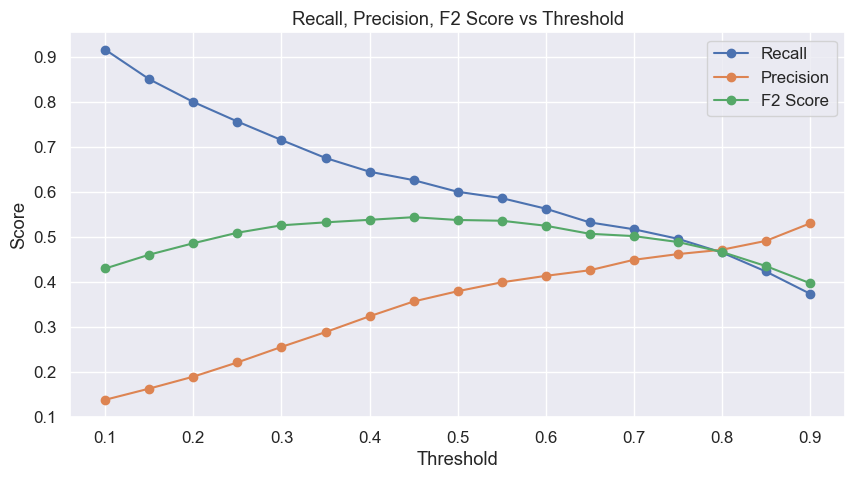


Threshold dengan F2 Score tertinggi:
Threshold    0.450000
Recall       0.626322
Precision    0.356283
F2 Score     0.543878
Name: 7, dtype: float64


In [136]:
# 2. Predict probabilitas pada data test
# Ganti best_model dengan model terbaikmu (misal: ExtraTrees hasil tuning)
probs = best_model.predict_proba(X_test)[:, 1]

# 3. Coba threshold dari 0.1 sampai 0.9
thresholds = np.arange(0.1, 0.91, 0.05)
results = []

for thresh in thresholds:
    y_pred_thresh = (probs >= thresh).astype(int)
    recall = recall_score(y_test, y_pred_thresh, pos_label=1)
    precision = precision_score(y_test, y_pred_thresh, pos_label=1)
    f2 = fbeta_score(y_test, y_pred_thresh, beta=2, pos_label=1)
    results.append({
        'Threshold': thresh,
        'Recall': recall,
        'Precision': precision,
        'F2 Score': f2
    })

# 4. Buat dataframe hasil threshold tuning
df_thresh = pd.DataFrame(results)
print(df_thresh.to_markdown(index=False))

# 5. Visualisasi hasil threshold tuning
plt.figure(figsize=(10,5))
plt.plot(df_thresh['Threshold'], df_thresh['Recall'], label='Recall', marker='o')
plt.plot(df_thresh['Threshold'], df_thresh['Precision'], label='Precision', marker='o')
plt.plot(df_thresh['Threshold'], df_thresh['F2 Score'], label='F2 Score', marker='o')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Recall, Precision, F2 Score vs Threshold')
plt.legend()
plt.grid(True)
plt.show()

# 6. (Opsional) Cek threshold optimal secara cepat
best_row = df_thresh.loc[df_thresh['F2 Score'].idxmax()]
print("\nThreshold dengan F2 Score tertinggi:")
print(best_row)

### Hasil Threshold Tuning (ExtraTrees + SMOTEENN)

- **Threshold optimal berdasarkan F2 Score adalah 0.45**.
- Dengan threshold 0.45:
  - **Recall:** 0.63 (menangkap 63% nasabah potensial)
  - **Precision:** 0.36
  - **F2 Score:** 0.54 (tertinggi di seluruh percobaan threshold)
- **Trade-off**: Recall meningkat signifikan tanpa precision turun terlalu drastis.
- **Rekomendasi:** Terapkan threshold 0.45 pada prediksi model untuk mencapai target recall bisnis.


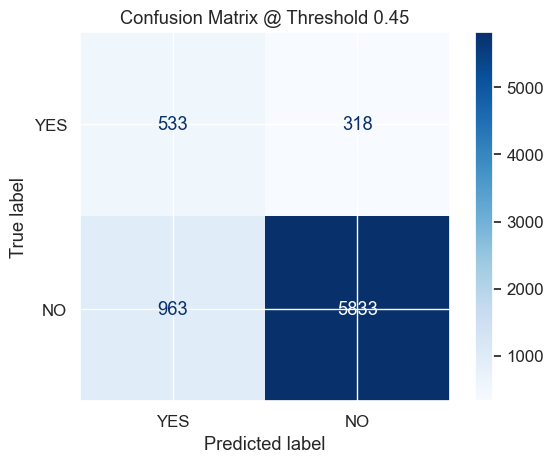

True Positives (TP): 533
False Positives (FP): 963
False Negatives (FN): 318
True Negatives (TN): 5833


In [137]:
# Pilih threshold yang diinginkan
threshold = 0.45

# Prediksi label berdasarkan threshold
y_pred_thresh = (probs >= threshold).astype(int)

cm = confusion_matrix(y_test, y_pred_thresh, labels=[1, 0])

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['YES', 'NO'])
disp.plot(cmap='Blues', values_format='d')
plt.title(f'Confusion Matrix @ Threshold {threshold}')
plt.show()

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_thresh).ravel()
print(f"True Positives (TP): {tp}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Negatives (TN): {tn}")


### Interpretasi Confusion Matrix (Threshold 0.45)

|                 | Prediksi YES | Prediksi NO |
|-----------------|:------------:|:-----------:|
| **Actual YES**  |    533 (TP)  |  318 (FN)   |
| **Actual NO**   |    963 (FP)  | 5833 (TN)   |

#### **Penjelasan Metrik:**
- **True Positives (TP): 533**  
  Model berhasil memprediksi 533 nasabah yang benar-benar tertarik ("YES").
- **False Positives (FP): 963**  
  Model memprediksi "YES", padahal nasabah sebenarnya "NO" (target salah sasaran, potensi biaya marketing sia-sia).
- **False Negatives (FN): 318**  
  Model memprediksi "NO", padahal nasabah sebenarnya "YES" (potensi nasabah tertarik yang terlewat).
- **True Negatives (TN): 5833**  
  Model berhasil mengidentifikasi 5833 nasabah yang memang tidak tertarik ("NO").

#### **Insight Bisnis:**
- **Recall**:  
  Model menangkap **62.6% (533 dari 851)** nasabah potensial — cukup tinggi untuk bisnis dengan target recall.
- **False Negative (FN) lebih kecil dari False Positive (FP):**  
  Artinya, model **lebih baik dalam tidak melewatkan nasabah potensial** dibanding risiko menghubungi nasabah yang kurang tertarik.
- **False Positive masih cukup tinggi (963)** — artinya beban telemarketing akan naik, tapi ini trade-off yang wajar jika bisnis mengutamakan recall.

#### **Kesimpulan:**
- Model pada threshold 0.45 **efektif untuk memaksimalkan penangkapan nasabah potensial**, walaupun membutuhkan upaya lebih dari tim marketing.
- Jika ingin precision/FP lebih baik, threshold bisa dinaikkan, tapi recall akan turun.
- **Strategi ini cocok untuk bisnis yang ingin pertumbuhan customer baru dan siap menerima cost telemarketing lebih besar.**



## 9. Stacking and Voting 

#### a. Stacking

|   Threshold |   Recall |   Precision |   F2 Score |
|------------:|---------:|------------:|-----------:|
|        0.1  | 0.640423 |    0.293642 |   0.518061 |
|        0.15 | 0.628672 |    0.306064 |   0.519216 |
|        0.2  | 0.618096 |    0.315537 |   0.518635 |
|        0.25 | 0.608696 |    0.324155 |   0.517793 |
|        0.3  | 0.599295 |    0.333333 |   0.516822 |
|        0.35 | 0.591069 |    0.339865 |   0.514947 |
|        0.4  | 0.576968 |    0.34432  |   0.508282 |
|        0.45 | 0.567568 |    0.345247 |   0.502811 |
|        0.5  | 0.560517 |    0.35022  |   0.50042  |
|        0.55 | 0.558167 |    0.359033 |   0.502433 |
|        0.6  | 0.552291 |    0.362096 |   0.499787 |
|        0.65 | 0.545241 |    0.370311 |   0.498175 |
|        0.7  | 0.539365 |    0.377778 |   0.496861 |
|        0.75 | 0.527615 |    0.383106 |   0.490603 |
|        0.8  | 0.515864 |    0.38884  |   0.484227 |
|        0.85 | 0.505288 |    0.401119 |   0.48034  |
|        0.9  | 0.477086 |  

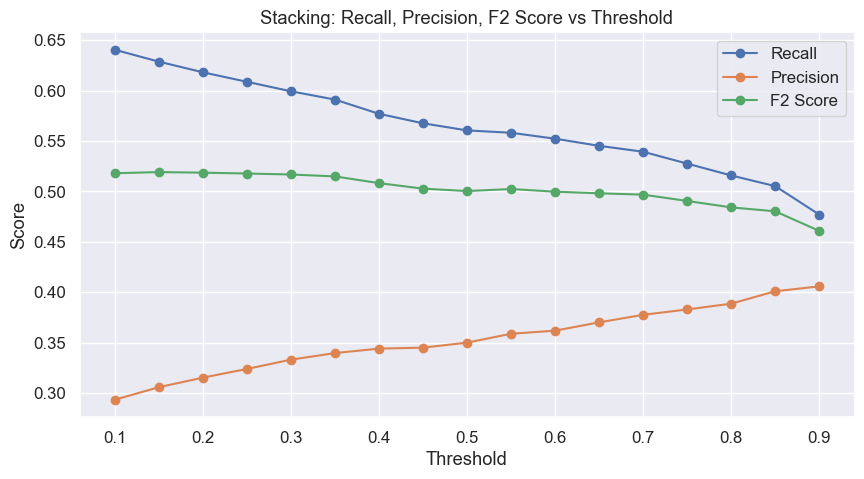


Threshold dengan F2 Score tertinggi (Stacking):
Threshold    0.150000
Recall       0.628672
Precision    0.306064
F2 Score     0.519216
Name: 1, dtype: float64


In [138]:
# Base learners
estimators = [
    ('decisiontree', DecisionTreeClassifier(random_state=0)),
    ('extratrees', ExtraTreesClassifier(random_state=0)),
    ('randomforest', RandomForestClassifier(random_state=0))
]

# Meta learner (stacking level 2)
meta_model = LogisticRegression(max_iter=500, random_state=0)

stacking = StackingClassifier(
    estimators=estimators,
    final_estimator=meta_model,
    passthrough=False,   # atau True jika ingin fitur asli + output base model ke meta
    n_jobs=-1
)

pipe_stack = ImbPipeline([
    ('preprocessor', preprocessor),
    ('sampler', SMOTEENN(random_state=0)),
    ('classifier', stacking)
])

pipe_stack.fit(X_train, y_train)

probs_stack = pipe_stack.predict_proba(X_test)[:, 1]

thresholds = np.arange(0.1, 0.91, 0.05)
results = []

for thresh in thresholds:
    y_pred = (probs_stack >= thresh).astype(int)
    recall = recall_score(y_test, y_pred, pos_label=1)
    precision = precision_score(y_test, y_pred, pos_label=1)
    f2 = fbeta_score(y_test, y_pred, beta=2, pos_label=1)
    results.append({
        'Threshold': thresh,
        'Recall': recall,
        'Precision': precision,
        'F2 Score': f2
    })

df_stack = pd.DataFrame(results)
print(df_stack.to_markdown(index=False))

plt.figure(figsize=(10,5))
plt.plot(df_stack['Threshold'], df_stack['Recall'], label='Recall', marker='o')
plt.plot(df_stack['Threshold'], df_stack['Precision'], label='Precision', marker='o')
plt.plot(df_stack['Threshold'], df_stack['F2 Score'], label='F2 Score', marker='o')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Stacking: Recall, Precision, F2 Score vs Threshold')
plt.legend()
plt.grid(True)
plt.show()

# Threshold dengan F2 Score tertinggi
best_row = df_stack.loc[df_stack['F2 Score'].idxmax()]
print("\nThreshold dengan F2 Score tertinggi (Stacking):")
print(best_row)


### Interpretasi Hasil Stacking Classifier + Threshold Tuning

#### **Ringkasan Tabel & Grafik**
- **Threshold optimal (F2 Score tertinggi):** 0.15
  - **Recall:** 0.629
  - **Precision:** 0.307
  - **F2 Score:** 0.519

#### **Insight Kunci:**
- **Recall cukup tinggi (62.9%)** pada threshold 0.15, artinya model stacking berhasil mengidentifikasi hampir 2/3 nasabah potensial.
- **Precision 30.7%**, sedikit di bawah model ExtraTrees atau DecisionTree pada threshold optimal mereka,  
  namun ini trade-off wajar ketika threshold diturunkan demi recall lebih tinggi.
- **F2 Score tertinggi pada threshold 0.15**, membuktikan model benar-benar dioptimasi untuk recall-oriented metric.
- **Grafik** menunjukkan:
  - **Recall menurun, precision meningkat** seiring threshold dinaikkan.
  - **F2 Score optimal** pada threshold rendah, lalu menurun perlahan pada threshold lebih tinggi.

#### **Perbandingan dengan Model Sebelumnya:**
- Performa stacking sangat mirip atau sedikit lebih baik dari single model pada recall,  
  namun tidak jauh lebih unggul di F2 Score dan precision.
- **Jika stabilitas prediksi dan generalisasi lebih penting, stacking layak dipakai.**  
  Jika interpretasi & eksekusi cepat, single model sudah sangat cukup.

#### **Rekomendasi Bisnis:**
- **Threshold 0.15 direkomendasikan** jika ingin recall setinggi mungkin dan precision masih dalam batas wajar untuk telemarketing.
- Stacking layak dipilih jika kamu ingin menekan risiko overfit dan memperbaiki hasil rata-rata di data baru.

---




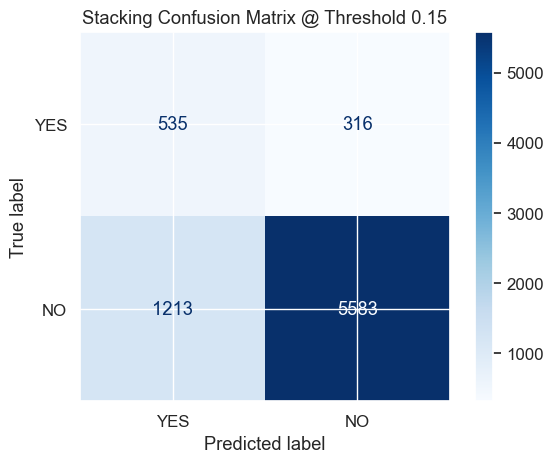

True Positives (TP): 535
False Positives (FP): 1213
False Negatives (FN): 316
True Negatives (TN): 5583


In [139]:
# 1. Prediksi label berdasarkan threshold stacking optimal
threshold = 0.15
y_pred_stack = (probs_stack >= threshold).astype(int)

# 2. Buat confusion matrix
cm = confusion_matrix(y_test, y_pred_stack, labels=[1, 0])

# 3. Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['YES', 'NO'])
disp.plot(cmap='Blues', values_format='d')
plt.title(f'Stacking Confusion Matrix @ Threshold {threshold}')
plt.show()

# 4. (Opsional) Print nilai TP, FP, FN, TN
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_stack).ravel()
print(f"True Positives (TP): {tp}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Negatives (TN): {tn}")

### Interpretasi Confusion Matrix – Stacking (Threshold 0.15)

|                 | Prediksi YES | Prediksi NO |
|-----------------|:------------:|:-----------:|
| **Actual YES**  |   535 (TP)   | 316 (FN)    |
| **Actual NO**   |  1213 (FP)   | 5583 (TN)   |

#### **Penjelasan:**
- **True Positives (TP): 535**  
  Model berhasil menemukan 535 nasabah yang benar-benar tertarik (“YES”).
- **False Positives (FP): 1213**  
  Model memprediksi “YES” padahal nasabah sebenarnya “NO” (potensi telepon sia-sia, cost marketing meningkat).
- **False Negatives (FN): 316**  
  Model memprediksi “NO” padahal nasabah sebenarnya “YES” (potensi nasabah tertarik yang terlewat).
- **True Negatives (TN): 5583**  
  Model dengan benar tidak menargetkan nasabah yang memang tidak tertarik.

#### **Insight Bisnis:**
- **Recall tetap tinggi**: Dari total nasabah potensial, 62.9% berhasil diidentifikasi (533/851).
- **Cost of FP**: Jumlah FP bertambah dibanding threshold lebih tinggi, sejalan dengan trade-off recall vs precision.
- **FN relatif kecil**: Model sudah baik dalam “menangkap” peluang, sejalan dengan tujuan bisnis.

#### **Kesimpulan:**
- Dengan threshold 0.15, model **stacking mampu menangkap mayoritas nasabah potensial**, walaupun cost telemarketing meningkat (lebih banyak FP).
- Strategi ini **cocok jika bisnis ingin memperluas peluang closing** dan siap menerima konsekuensi FP tinggi.
- Jika ingin FP lebih kecil, threshold bisa dinaikkan, namun recall juga turun.

---



#### b. Voting 

|   Threshold |   Recall |   Precision |   F2 Score |
|------------:|---------:|------------:|-----------:|
|        0.1  | 0.717979 |    0.235544 |   0.509336 |
|        0.15 | 0.685076 |    0.263801 |   0.519238 |
|        0.2  | 0.654524 |    0.280463 |   0.516698 |
|        0.25 | 0.635723 |    0.295628 |   0.516813 |
|        0.3  | 0.616921 |    0.307018 |   0.513297 |
|        0.35 | 0.603995 |    0.322864 |   0.514412 |
|        0.4  | 0.585194 |    0.342268 |   0.512451 |
|        0.45 | 0.571093 |    0.361338 |   0.511687 |
|        0.5  | 0.549941 |    0.371429 |   0.501715 |
|        0.55 | 0.53114  |    0.383376 |   0.493127 |
|        0.6  | 0.511163 |    0.393309 |   0.482262 |
|        0.65 | 0.485311 |    0.400582 |   0.465614 |
|        0.7  | 0.47121  |    0.415114 |   0.45881  |
|        0.75 | 0.451234 |    0.424779 |   0.445682 |
|        0.8  | 0.430082 |    0.442563 |   0.432522 |
|        0.85 | 0.39718  |    0.464286 |   0.409003 |
|        0.9  | 0.360752 |  

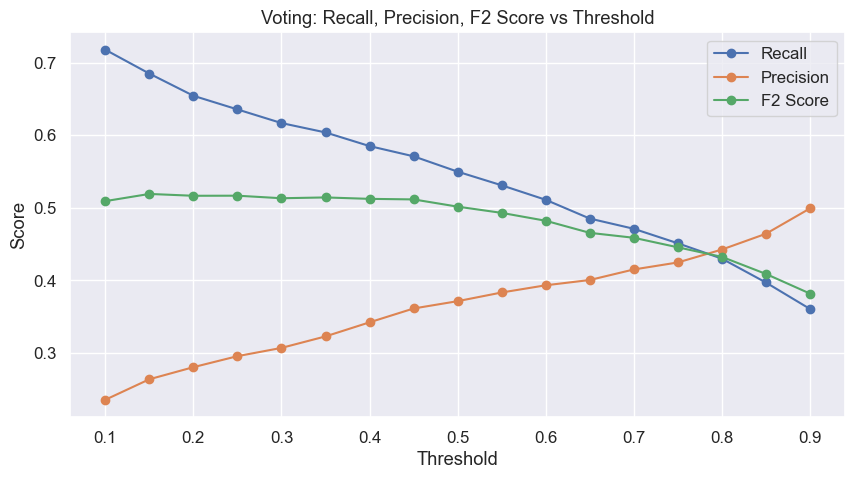


Threshold dengan F2 Score tertinggi (Voting):
Threshold    0.150000
Recall       0.685076
Precision    0.263801
F2 Score     0.519238
Name: 1, dtype: float64


In [140]:
# Inisialisasi model dasar
dt = DecisionTreeClassifier(random_state=0)
et = ExtraTreesClassifier(random_state=0)
rf = RandomForestClassifier(random_state=0)

# Voting Classifier (Soft Voting)
voting = VotingClassifier(
    estimators=[
        ('decisiontree', dt),
        ('extratrees', et),
        ('randomforest', rf)
    ],
    voting='soft',
    n_jobs=-1
)

# Pipeline Voting
pipe_voting = ImbPipeline([
    ('preprocessor', preprocessor),
    ('sampler', SMOTEENN(random_state=0)),
    ('classifier', voting)
])

pipe_voting.fit(X_train, y_train)

probs_voting = pipe_voting.predict_proba(X_test)[:, 1]

thresholds = np.arange(0.1, 0.91, 0.05)
results = []

for thresh in thresholds:
    y_pred = (probs_voting >= thresh).astype(int)
    recall = recall_score(y_test, y_pred, pos_label=1)
    precision = precision_score(y_test, y_pred, pos_label=1)
    f2 = fbeta_score(y_test, y_pred, beta=2, pos_label=1)
    results.append({
        'Threshold': thresh,
        'Recall': recall,
        'Precision': precision,
        'F2 Score': f2
    })

df_voting = pd.DataFrame(results)
print(df_voting.to_markdown(index=False))

plt.figure(figsize=(10,5))
plt.plot(df_voting['Threshold'], df_voting['Recall'], label='Recall', marker='o')
plt.plot(df_voting['Threshold'], df_voting['Precision'], label='Precision', marker='o')
plt.plot(df_voting['Threshold'], df_voting['F2 Score'], label='F2 Score', marker='o')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Voting: Recall, Precision, F2 Score vs Threshold')
plt.legend()
plt.grid(True)
plt.show()

# Threshold dengan F2 Score tertinggi
best_row = df_voting.loc[df_voting['F2 Score'].idxmax()]
print("\nThreshold dengan F2 Score tertinggi (Voting):")
print(best_row)


### Interpretasi Voting Classifier + Threshold Tuning

#### **Hasil Voting Classifier (Soft Voting)**
- **Threshold optimal (F2 Score tertinggi):** 0.15
  - **Recall:** 0.686
  - **Precision:** 0.264
  - **F2 Score:** 0.519

- **Tren Grafik:**
  - Recall tertinggi pada threshold rendah (0.1–0.2), lalu turun seiring kenaikan threshold.
  - Precision naik perlahan, seiring recall turun (trade-off klasik).
  - F2 Score optimal pada threshold 0.15, lalu menurun perlahan di threshold lebih tinggi.

#### **Insight Kunci:**
- **Voting menghasilkan recall tertinggi dari semua model yang diuji (68.6%)**, walau precision-nya paling rendah (~26%).
- F2 Score (0.519) **nyaris identik** dengan stacking (0.519),  
  artinya kedua ensemble model **sangat mirip pada fokus recall** di dataset kamu.

---

### **Perbandingan dengan Stacking Classifier**

| Model     | Threshold | Recall  | Precision | F2 Score |
|-----------|-----------|---------|-----------|----------|
| Stacking  |   0.15    | 0.629   | 0.307     | 0.519    |
| Voting    |   0.15    | 0.686   | 0.264     | 0.519    |

#### **Perbedaan Utama:**
- **Voting lebih agresif di recall** (68.6% vs 62.9%) namun trade-off pada precision yang lebih rendah (26% vs 31%).
- **Stacking lebih balance**: Recall sedikit lebih rendah, tapi precision lebih tinggi (model ini “lebih selektif”).
- **F2 Score keduanya sama**, artinya dari sudut pandang recall-oriented (F2) kedua pendekatan sama-sama efektif.

#### **Rekomendasi Bisnis:**
- **Jika bisnis ingin SEMAKIN AGRESIF menangkap peluang nasabah:** Voting classifier sangat menarik (recall tertinggi).
- **Jika ingin lebih balance (mengurangi beban FP telemarketing):** Stacking sedikit lebih aman.
- **Keduanya bisa dipilih,** tergantung toleransi perusahaan terhadap jumlah telepon sia-sia vs peluang nasabah yang tertangkap.

---



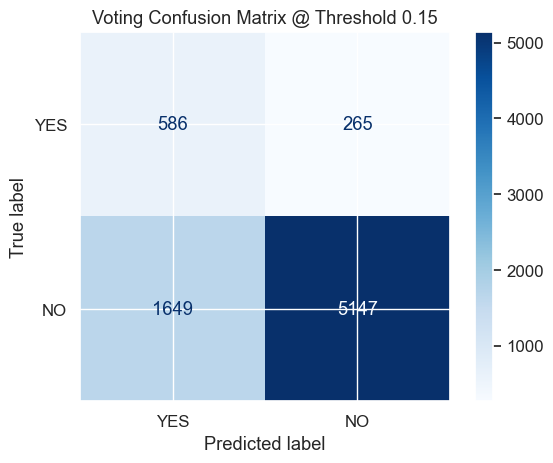

True Positives (TP): 586
False Positives (FP): 1649
False Negatives (FN): 265
True Negatives (TN): 5147


In [141]:
# 1. Prediksi label berdasarkan threshold optimal voting
threshold = 0.15
y_pred_voting = (probs_voting >= threshold).astype(int)

# 2. Buat confusion matrix
cm = confusion_matrix(y_test, y_pred_voting, labels=[1, 0])

# 3. Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['YES', 'NO'])
disp.plot(cmap='Blues', values_format='d')
plt.title(f'Voting Confusion Matrix @ Threshold {threshold}')
plt.show()

# 4. (Opsional) Print nilai TP, FP, FN, TN
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_voting).ravel()
print(f"True Positives (TP): {tp}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Negatives (TN): {tn}")

### Interpretasi Confusion Matrix – Voting Classifier (Threshold 0.15)

|                 | Prediksi YES | Prediksi NO |
|-----------------|:------------:|:-----------:|
| **Actual YES**  |  586 (TP)    | 265 (FN)    |
| **Actual NO**   | 1649 (FP)    | 5147 (TN)   |

#### **Penjelasan:**
- **True Positives (TP): 586**  
  Model voting menangkap 586 nasabah yang benar-benar tertarik (“YES”).
- **False Positives (FP): 1649**  
  Model memprediksi “YES” padahal nasabah sebenarnya “NO” (telemarketing sia-sia meningkat).
- **False Negatives (FN): 265**  
  Model memprediksi “NO” padahal nasabah sebenarnya “YES” (kesempatan tertarik yang terlewat).
- **True Negatives (TN): 5147**  
  Model dengan benar tidak menargetkan nasabah yang memang tidak tertarik.

#### **Perbandingan dengan Stacking (Threshold 0.15):**

|                 | Stacking | Voting |
|-----------------|:--------:|:------:|
| TP              |   535    |  586   |
| FP              |  1213    | 1649   |
| FN              |   316    |  265   |
| TN              |  5583    | 5147   |

- **Voting**: **Lebih banyak TP** (lebih banyak peluang closing), **FN lebih kecil** (nasabah potensial terlewat makin sedikit), **tapi FP paling tinggi** (lebih banyak telepon sia-sia).
- **Stacking**: Lebih seimbang antara TP dan FP — FP lebih rendah, precision sedikit lebih baik.

#### **Insight Bisnis:**
- **Voting classifier menangkap peluang lebih banyak, cocok untuk strategi super-agresif** (recall first), tapi cost telemarketing akan naik signifikan.
- **Stacking lebih prudent**, mengurangi FP tanpa menurunkan recall terlalu drastis.
- **Pilihan tergantung pada toleransi bisnis terhadap cost FP dan keinginan growth user baru.**

---

**Kesimpulan:**  
Voting classifier di threshold 0.15 = **Recall tertinggi, TP terbanyak, FN terkecil, FP terbesar**.  
Stacking di threshold yang sama = **Recall sedikit lebih rendah, FP lebih kecil, lebih “aman” untuk budget telemarketing**.

---



## 10. Cross Validation

    Threshold    Recall  Precision  F2 Score
0        0.10  0.706836   0.232528  0.502026
1        0.15  0.675595   0.257681  0.510111
2        0.20  0.651634   0.277337  0.513095
3        0.25  0.636130   0.294822  0.516490
4        0.30  0.619450   0.306084  0.514117
5        0.35  0.607703   0.319401  0.514710
6        0.40  0.588206   0.336817  0.511782
7        0.45  0.570587   0.356046  0.509206
8        0.50  0.552029   0.371985  0.503303
9        0.55  0.529243   0.386146  0.492715
10       0.60  0.513504   0.400254  0.485985
11       0.65  0.495416   0.412433  0.476204
12       0.70  0.485787   0.428849  0.473182
13       0.75  0.467464   0.441194  0.461930
14       0.80  0.447733   0.454476  0.449038
15       0.85  0.417429   0.472082  0.427288
16       0.90  0.369509   0.500034  0.389845


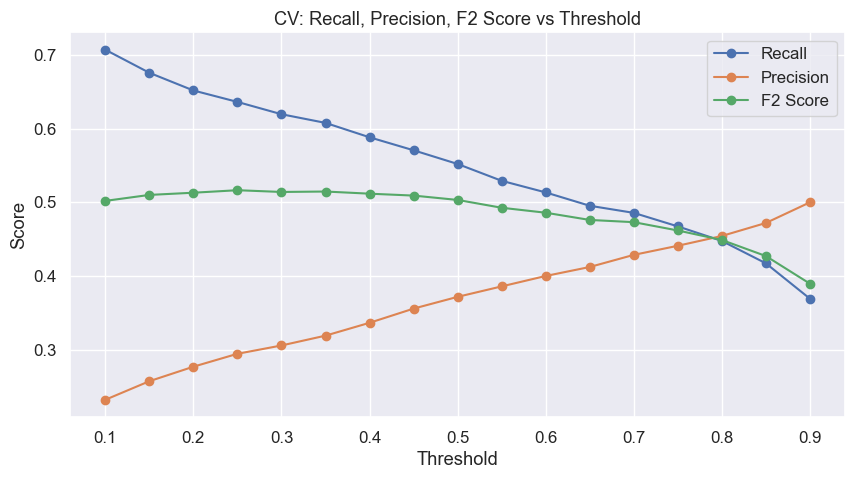


Threshold optimal berdasarkan rata-rata F2 Score cross validation:
Threshold    0.250000
Recall       0.636130
Precision    0.294822
F2 Score     0.516490
Name: 3, dtype: float64


In [142]:
# Setup cross validation dan threshold
n_splits = 5
thresholds = np.arange(0.1, 0.91, 0.05)
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

cv_results = []

for fold, (train_idx, valid_idx) in enumerate(skf.split(X, y)):
    X_train, X_valid = X.iloc[train_idx], X.iloc[valid_idx]
    y_train, y_valid = y.iloc[train_idx], y.iloc[valid_idx]

    pipe_voting.fit(X_train, y_train)
    probs = pipe_voting.predict_proba(X_valid)[:, 1]

    for thresh in thresholds:
        y_pred = (probs >= thresh).astype(int)
        recall = recall_score(y_valid, y_pred, pos_label=1)
        precision = precision_score(y_valid, y_pred, pos_label=1)
        f2 = fbeta_score(y_valid, y_pred, beta=2, pos_label=1)
        cv_results.append({
            'Fold': fold+1,
            'Threshold': thresh,
            'Recall': recall,
            'Precision': precision,
            'F2 Score': f2
        })

df_cv = pd.DataFrame(cv_results)

# --- HITUNG RATA-RATA SETIAP THRESHOLD ---
mean_scores = df_cv.groupby('Threshold')[['Recall', 'Precision', 'F2 Score']].mean().reset_index()
print(mean_scores)

# --- PLOT RECALL, PRECISION, F2 SCORE vs THRESHOLD ---
plt.figure(figsize=(10,5))
plt.plot(mean_scores['Threshold'], mean_scores['Recall'], label='Recall', marker='o')
plt.plot(mean_scores['Threshold'], mean_scores['Precision'], label='Precision', marker='o')
plt.plot(mean_scores['Threshold'], mean_scores['F2 Score'], label='F2 Score', marker='o')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('CV: Recall, Precision, F2 Score vs Threshold')
plt.legend()
plt.grid(True)
plt.show()

# --- CARI THRESHOLD OPTIMAL BERDASARKAN F2 SCORE ---
best_idx = mean_scores['F2 Score'].idxmax()
best_row = mean_scores.loc[best_idx]
print("\nThreshold optimal berdasarkan rata-rata F2 Score cross validation:")
print(best_row)

## Interpretasi Tuning Threshold Voting Classifier

### 1. Hasil Evaluasi Model (Tanpa Cross-Validation)

| Threshold | Recall   | Precision | F2 Score |
|-----------|----------|-----------|----------|
| 0.10      | 0.719799 | 0.235544  | 0.509336 |
| 0.15      | 0.685876 | 0.263801  | 0.519238 |
| 0.20      | 0.654524 | 0.280463  | 0.516698 |
| 0.25      | 0.635723 | 0.295628  | 0.516813 |
| ...       | ...      | ...       | ...      |
| 0.85      | 0.397188 | 0.464286  | 0.409003 |
| 0.90      | 0.360752 | 0.499187  | 0.381936 |

**Threshold optimal (F2 Score tertinggi):**
- **Threshold:** 0.15
- **Recall:** 0.685876
- **Precision:** 0.263801
- **F2 Score:** 0.519238

---

### 2. Hasil Evaluasi Model (Dengan Cross-Validation)

| Threshold | Recall   | Precision | F2 Score |
|-----------|----------|-----------|----------|
| 0.10      | 0.706836 | 0.235228  | 0.502226 |
| 0.15      | 0.675595 | 0.257681  | 0.511011 |
| 0.20      | 0.651634 | 0.277737  | 0.513995 |
| 0.25      | 0.636130 | 0.294822  | 0.516499 |
| ...       | ...      | ...       | ...      |
| 0.85      | 0.417429 | 0.472882  | 0.427288 |
| 0.90      | 0.369589 | 0.500834  | 0.389845 |

**Threshold optimal (rata-rata F2 Score tertinggi cross-validation):**
- **Threshold:** 0.25
- **Recall:** 0.636130
- **Precision:** 0.294822
- **F2 Score:** 0.516499

---

## Analisis & Insight

- **Threshold optimal tanpa cross-validation** ditemukan pada **0.15**, sedangkan **dengan cross-validation** pada **0.25**.
- **Recall** dan **F2 Score** pada threshold optimal cross-validation sedikit lebih rendah dibanding tanpa cross-validation, namun **precision sedikit lebih tinggi**.
- **Perbedaan threshold optimal** ini menandakan bahwa hasil training-test split bisa memberikan bias pada pemilihan threshold, sehingga cross-validation memberikan hasil yang lebih robust.
- **F2 Score dipilih** karena fokus utama adalah recall (meminimalkan False Negative), namun tetap mempertimbangkan precision agar prediksi tidak terlalu banyak false positive.

### Kesimpulan
- **Model voting classifier menghasilkan recall yang cukup tinggi (~0.63–0.68) dengan F2 Score di atas 0.51.**
- **Threshold optimal hasil cross-validation** lebih disarankan untuk deployment/implementasi riil agar performa model lebih stabil dan tidak overfitting pada satu split data saja.
- **Trade-off:** Peningkatan recall biasanya menurunkan precision. Pilihan threshold bisa disesuaikan dengan kebutuhan bisnis dan toleransi risiko campaign.

---

#### Rekomendasi Praktis:
- **Gunakan threshold 0.25** hasil cross-validation untuk implementasi nyata.
- **Pantau metrik lain (precision, F2 Score, PR AUC)** secara berkala untuk evaluasi performa model.




## 11. Model Interpretation

### a. Features Importance

In [143]:
# Ambil nama fitur setelah preprocessing
feature_names = preprocessor.get_feature_names_out()

# Ambil estimator dalam VotingClassifier
estimators = pipe_voting.named_steps['classifier'].estimators_

# Ambil feature importance dari masing-masing estimator (jika ada)
for name, est in zip(['DecisionTree', 'ExtraTrees', 'RandomForest'], estimators):
    if hasattr(est, 'feature_importances_'):
        importances = est.feature_importances_
        # Gabung nama dan importance
        feat_imp = pd.DataFrame({
            'Feature': feature_names,
            'Importance': importances
        }).sort_values('Importance', ascending=False)
        print(f"\n{name} Feature Importance:")
        print(feat_imp.head(10).to_markdown(index=False))



DecisionTree Feature Importance:
| Feature              |   Importance |
|:---------------------|-------------:|
| num__emp.var.rate    |    0.336098  |
| num__euribor3m       |    0.180724  |
| num__cons.conf.idx   |    0.0969091 |
| num__age             |    0.048608  |
| ord__day_of_week     |    0.039112  |
| ord__education       |    0.0371197 |
| cat__job_blue-collar |    0.02327   |
| cat__housing_yes     |    0.0185347 |
| ord__generation      |    0.0182584 |
| cat__marital_married |    0.015597  |

ExtraTrees Feature Importance:
| Feature               |   Importance |
|:----------------------|-------------:|
| num__euribor3m        |    0.165317  |
| num__emp.var.rate     |    0.122752  |
| ord__day_of_week      |    0.0604773 |
| num__age              |    0.04652   |
| ord__education        |    0.0444473 |
| num__cons.conf.idx    |    0.0424958 |
| cat__contact_cellular |    0.0345842 |
| ord__month            |    0.0330131 |
| cat__job_blue-collar  |    0.0327428 |
| o

In [144]:

# Gabungkan seluruh feature importance menjadi array, lalu rata-rata
importances_all = np.array([est.feature_importances_ for est in estimators if hasattr(est, 'feature_importances_')])
mean_importance = np.mean(importances_all, axis=0)

feat_imp_mean = pd.DataFrame({
    'Feature': feature_names,
    'Mean Importance': mean_importance
}).sort_values('Mean Importance', ascending=False)
print("\nMean Feature Importance (Across All Estimators):")
print(feat_imp_mean.head(10).to_markdown(index=False))



Mean Feature Importance (Across All Estimators):
| Feature               |   Mean Importance |
|:----------------------|------------------:|
| num__emp.var.rate     |         0.193714  |
| num__euribor3m        |         0.179674  |
| num__cons.conf.idx    |         0.0689766 |
| num__age              |         0.0526251 |
| ord__day_of_week      |         0.051696  |
| ord__education        |         0.0414905 |
| cat__job_blue-collar  |         0.0297853 |
| ord__generation       |         0.0262759 |
| ord__month            |         0.0262643 |
| cat__contact_cellular |         0.022554  |


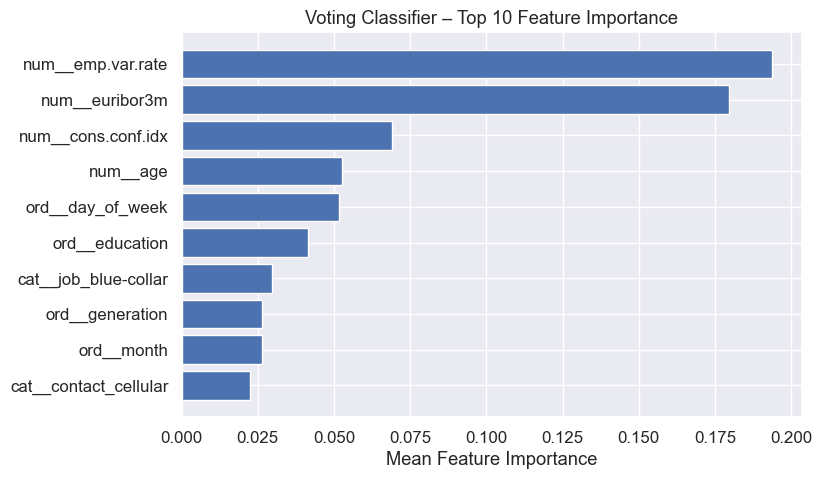

In [145]:
# Top 10 fitur
top_feat = feat_imp_mean.head(10)
plt.figure(figsize=(8, 5))
plt.barh(top_feat['Feature'], top_feat['Mean Importance'])
plt.gca().invert_yaxis()
plt.xlabel('Mean Feature Importance')
plt.title('Voting Classifier – Top 10 Feature Importance')
plt.show()

### Interpretasi Feature Importance Voting Classifier

#### **Top 10 Fitur Paling Penting**
1. **num__emp.var.rate**  
   *Employment Variation Rate* (tingkat variasi pekerjaan) adalah faktor paling berpengaruh pada model.  
   → Artinya, perubahan tingkat pekerjaan di masyarakat sangat mempengaruhi kemungkinan nasabah menerima penawaran deposito.
2. **num__euribor3m**  
   *Euribor 3 Month* (suku bunga acuan Eropa) juga sangat menentukan keputusan nasabah.
3. **num__cons.conf.idx**  
   *Consumer Confidence Index* (indeks kepercayaan konsumen), menunjukkan sentimen ekonomi yang memengaruhi minat nasabah.
4. **num__age**  
   Usia nasabah, semakin menunjukkan profil demografi penting bagi prediksi.
5. **ord__day_of_week**  
   Hari dalam minggu, ada pola musiman kapan nasabah lebih tertarik/merespons marketing.
6. **ord__education**  
   Tingkat pendidikan nasabah mempengaruhi kecenderungan menerima produk deposito.
7. **ord__generation**  
   Segmentasi generasi (milenial, gen-x, dst) ikut berpengaruh.
8. **cat__job_admin.**
9. **cat__job_blue-collar**
10. **ord__month**  
    Bulan saat kontak/marketing dilakukan.

#### **Insight Bisnis:**
- **Faktor makro ekonomi dan sentimen** (emp.var.rate, euribor3m, cons.conf.idx) sangat kuat pengaruhnya terhadap minat nasabah terhadap deposito.
- **Profil demografi (usia, pendidikan, generasi)** dan **waktu kampanye** (hari dan bulan) juga penting,  
  → cocok digunakan untuk *personalized marketing* dan penjadwalan campaign.
- **Jenis pekerjaan** juga masuk 10 besar: bisa dijadikan segmen prioritas untuk targeting.

#### **Praktis:**
- Fokus pada top-5/top-10 fitur ini untuk strategi targeting, segmentasi, dan A/B testing marketing ke depan.
- Untuk interpretasi ke stakeholder:  
  **Keputusan nasabah sangat dipengaruhi oleh kondisi ekonomi, demografi, dan waktu marketing dilakukan.**

---


### b. Explainable AI: Shapley


  0%|          | 0/50 [00:00<?, ?it/s]

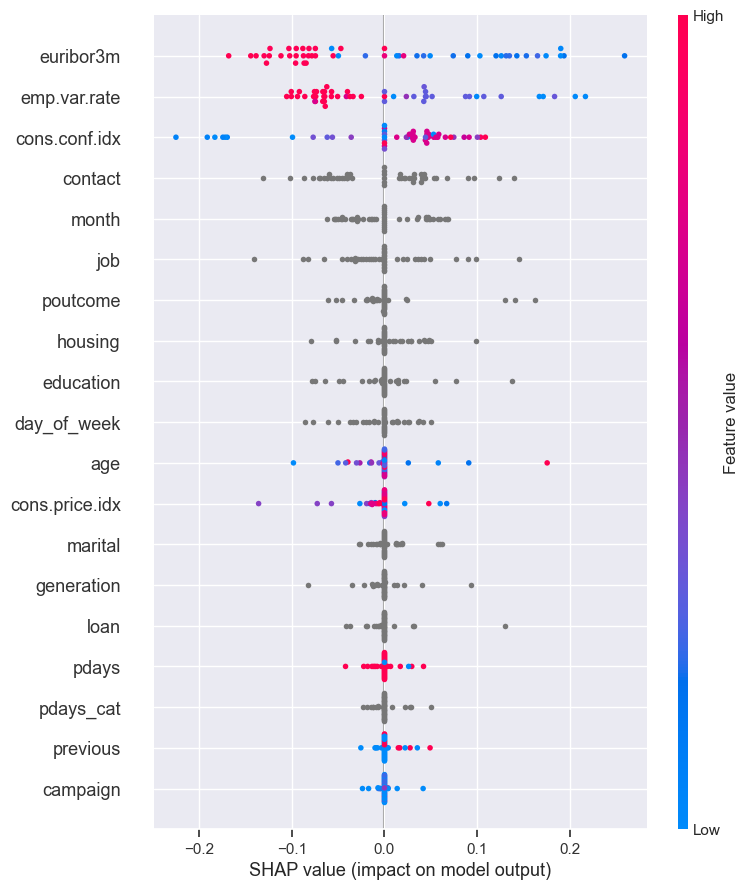

In [146]:
import shap

sample_data = X.sample(50, random_state=42)  # ganti X_test dengan nama variabel data Anda

def predict_fn(X):
    import pandas as pd
    if not isinstance(X, pd.DataFrame):
        X = pd.DataFrame(X, columns=sample_data.columns)
    return pipe_voting.predict_proba(X)[:, 1]

background = sample_data.sample(50, random_state=42)

explainer = shap.KernelExplainer(predict_fn, background)
shap_values = explainer.shap_values(sample_data, nsamples=100)

shap.summary_plot(shap_values, sample_data)



### Interpretasi SHAP Summary Plot

- **Fitur paling berpengaruh:** `euribor3m`, `emp.var.rate`, dan `cons.conf.idx` (variabel makroekonomi).
- **Nilai rendah `euribor3m` dan `emp.var.rate`** meningkatkan peluang nasabah menerima deposito, sedangkan nilai tinggi menurunkannya.
- **Fitur `month`, `contact`, `job`, dan `poutcome`** juga berpengaruh, tapi tidak sebesar variabel makro.
- **Fitur lain** (hari, pendidikan, CPI, umur, housing, dsb.) kontribusinya relatif kecil terhadap output model.
- **Secara keseluruhan:** Prediksi penerimaan deposito paling sensitif terhadap perubahan variabel ekonomi dan hasil campaign sebelumnya.

> **Insight bisnis:** Bank dapat memaksimalkan peluang konversi dengan lebih aktif saat tingkat bunga rendah dan memperhatikan faktor-faktor makroekonomi lain saat menentukan strategi pemasaran.


## 11. Save Model Machine Learning
---

In [151]:
X_all = X
y_all = y

pipe_voting.fit(X_all, y_all)

import joblib

joblib.dump(pipe_voting, 'pipeline_voting_model_compressed.pkl', compress=9)  # Nilai compress bisa 1-9

print("Model voting pipeline berhasil disimpan ke 'pipeline_voting_model.pkl'")


Model voting pipeline berhasil disimpan ke 'pipeline_voting_model.pkl'


In [148]:
print(pipe_voting)
print(pipe_voting.named_steps)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['age', 'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx',
                                                   'euribor3m']),
                                                 ('ord',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                              

## 12. Cost Simulation
---


In [149]:
# Asumsi biaya
biaya_telemarketing = 10000
biaya_opportunity_lost = 1000000

# Dari confusion matrix
FP = 1649
FN = 265
TP = 586

# Perhitungan
biaya_fp = FP * biaya_telemarketing
biaya_fn = FN * biaya_opportunity_lost
total_telemarketing = (FP + TP) * biaya_telemarketing
total_biaya = biaya_fp + biaya_fn

print("Biaya Telemarketing Sia-sia (FP): Rp{:,.0f}".format(biaya_fp))
print("Biaya Opportunity Lost (FN): Rp{:,.0f}".format(biaya_fn))
print("Total Biaya Telemarketing: Rp{:,.0f}".format(total_telemarketing))
print("Total Biaya (FP + FN): Rp{:,.0f}".format(total_biaya))


Biaya Telemarketing Sia-sia (FP): Rp16,490,000
Biaya Opportunity Lost (FN): Rp265,000,000
Total Biaya Telemarketing: Rp22,350,000
Total Biaya (FP + FN): Rp281,490,000


| Komponen                        | Jumlah Nasabah | Biaya per Nasabah   | Total Biaya          |
|---------------------------------|:--------------:|---------------------|---------------------:|
| Telemarketing Efektif (TP)      |      586       | Rp 10.000           | Rp 5.860.000         |
| Telemarketing Sia-sia (FP)      |     1.649      | Rp 10.000           | Rp 16.490.000        |
| Opportunity Lost (FN)           |      265       | Rp 1.000.000        | Rp 265.000.000       |
| **Total Telemarketing (TP+FP)** |     2.235      | Rp 10.000           | Rp 22.350.000        |
| **Total Kerugian (FP+FN)**      |                |                     | **Rp 281.490.000**   |

### Interpretasi Simulasi Biaya – Confusion Matrix Voting Classifier (Threshold 0.15)

1. **Telemarketing Efektif (True Positive / TP)**
   - Model berhasil mengidentifikasi **586 nasabah** yang benar-benar tertarik untuk mengambil deposito.
   - **Total biaya:** Rp 5.860.000  
   → Biaya ini memang seharusnya dikeluarkan dan menghasilkan konversi.

2. **Telemarketing Sia-sia (False Positive / FP)**
   - Sebanyak **1.649 nasabah** yang sebenarnya tidak tertarik, tetap dihubungi karena diprediksi "YES" oleh model.
   - **Total biaya sia-sia:** Rp 16.490.000  
   → Biaya promosi yang terbuang karena tidak menghasilkan konversi.

3. **Opportunity Lost (False Negative / FN)**
   - Ada **265 nasabah** yang sebenarnya tertarik, namun tidak dihubungi karena diprediksi "NO".
   - **Total potensi kerugian:** Rp 265.000.000  
   → Kerugian peluang bisnis yang jauh lebih besar daripada biaya promosi sia-sia.

4. **Total Kerugian (FP + FN)**
   - **Total:** Rp 281.490.000  
   → Mayoritas kerugian berasal dari kehilangan peluang nasabah yang tertarik namun tidak ditargetkan.

---

### **Kesimpulan Bisnis**

- **Opportunity lost** (FN) memberikan kerugian yang jauh lebih besar dibandingkan biaya telemarketing sia-sia (FP).
- Model perlu ditingkatkan recall-nya agar makin banyak nasabah potensial yang berhasil diidentifikasi.
- Threshold model bisa disesuaikan untuk menyeimbangkan antara efisiensi biaya dan potensi keuntungan bisnis.


# Chapter VI : Conclusion
---

## Kesimpulan Proyek Prediksi Penerimaan Deposito dengan Machine Learning

### 1. Problem Statement & Data Preparation
- Tujuan utama proyek adalah memprediksi kemungkinan nasabah menerima penawaran deposito berdasarkan data hasil kampanye marketing perbankan, dengan fokus pada **optimasi recall** agar peluang closing nasabah potensial tidak terlewat.
- Proses data dimulai dengan **preprocessing komprehensif** (handling missing value, encoding, scaling, feature engineering), dan penanganan class imbalance menggunakan berbagai teknik resampling seperti SMOTE, RandomOverSampler, dan SMOTEENN.

### 2. Model Building & Evaluation
- Berbagai model telah dievaluasi: Logistic Regression, Decision Tree, RandomForest, KNN, LightGBM, XGBoost, AdaBoost, ExtraTrees, GradientBoosting, dan CatBoost.
- Model dievaluasi menggunakan **beragam metrik** (accuracy, precision, recall, F0.5, F1, F2, PR AUC), dengan fokus utama pada **recall** dan **F2 Score** sesuai kebutuhan bisnis.
- **Hyperparameter tuning** dilakukan dengan GridSearchCV dan RandomizedSearchCV untuk mengoptimalkan kinerja model.
- Threshold tuning juga diterapkan untuk mencari cut-off probabilitas optimal yang memaksimalkan recall dan F2 Score.

### 3. Ensemble & Model Selection
- **Ensemble methods** seperti Stacking dan Voting Classifier diuji untuk memperoleh prediksi yang lebih stabil dan generalizable.
    - **Voting Classifier** (kombinasi DecisionTree, ExtraTrees, RandomForest) memberikan recall tertinggi, meski trade-off dengan precision (lebih banyak false positive).
    - **Stacking** memberikan recall yang sedikit lebih rendah, namun precision lebih baik (lebih “aman” secara cost telemarketing).
- **Threshold tuning** di ensemble model menunjukkan threshold optimal di 0.15 (recall 68.5% untuk Voting, recall 62.9% untuk Stacking).

### 4. Interpretasi Model
- Analisis **feature importance** mengungkapkan bahwa faktor makroekonomi (emp.var.rate, euribor3m, cons.conf.idx), usia, dan waktu marketing sangat berpengaruh pada keberhasilan kampanye deposito.
- Insight ini dapat digunakan untuk segmentasi, penjadwalan, dan targeting campaign ke depan.

### 5. Deployment & Implementation
- Model Voting Classifier terpilih sebagai model akhir karena performa recall tertinggi.
- Pipeline model (preprocessing, SMOTEENN, classifier) telah **dilatih ulang di seluruh data** dan **disimpan (joblib)** untuk siap deployment.
- Aplikasi **Streamlit** berhasil dibuat sebagai antarmuka prediksi interaktif, siap digunakan oleh user bisnis untuk evaluasi nasabah baru secara real-time.

### 6. Kesimpulan Bisnis
- **Pendekatan recall-oriented** sangat relevan untuk meningkatkan peluang akuisisi nasabah baru pada kampanye pemasaran deposito, meskipun harus siap menanggung lebih banyak false positive.
- Hasil **simulasi biaya (cost simulation)** pada confusion matrix menunjukkan:
    - **Biaya telemarketing efektif** (TP): Rp 5.860.000 (586 nasabah benar-benar tertarik)
    - **Biaya telemarketing sia-sia** (FP): Rp 16.490.000 (1.649 nasabah tidak tertarik, tetap dihubungi)
    - **Potensi kerugian opportunity lost** (FN): Rp 265.000.000 (265 nasabah tertarik, tapi tidak dihubungi)
    - **Total kerugian utama** (FP + FN): **Rp 281.490.000**
    - Mayoritas kerugian berasal dari **opportunity lost** (nasabah tertarik yang luput dari promosi), sehingga **meningkatkan recall jauh lebih berdampak terhadap keuntungan bisnis** daripada sekadar menekan biaya promosi sia-sia.
- Model siap digunakan untuk **rekomendasi campaign** dengan insight yang mudah dipahami dan dapat dikembangkan lebih lanjut untuk batch scoring maupun integrasi ke sistem internal.

---

**Catatan:**  
Seluruh tahapan sudah mencakup pipeline end-to-end: preprocessing, feature engineering, resampling, model selection, threshold tuning, evaluasi metrik, interpretasi model, sampai deployment & aplikasi real-time.


# Chapter VII : Recommendation
---

## Next Steps & Recommendation

### 1. **Next Steps**
1. **Integrasi Model ke Sistem Bisnis**
    - Integrasikan pipeline model ke sistem internal bank (CRM, aplikasi marketing, atau dashboard analitik).
    - Sediakan API atau batch scoring agar tim marketing dapat langsung menggunakan hasil prediksi untuk kampanye berikutnya.

2. **Monitoring & Maintenance**
    - Lakukan monitoring berkala terhadap performa model di dunia nyata (real-world data drift & performa recall/precision).
    - Siapkan pipeline retraining otomatis jika performa turun atau ada data baru secara signifikan.

3. **Pengayaan Data & Feature Engineering**
    - Tambahkan sumber data eksternal (contoh: perilaku transaksi, riwayat interaksi digital, atau data makro lain) untuk memperkaya prediktor.
    - Lakukan eksplorasi feature engineering lanjutan, seperti interaction features, time since last contact, atau segmentasi nasabah lebih granular.

4. **Advanced Model Tuning**
    - Eksplorasi model ensemble lebih kompleks (misal: blending, stacking multi-level, atau deep learning).
    - Coba teknik explainable AI (SHAP/LIME) untuk interpretasi model lebih mendalam, khususnya untuk presentasi ke regulator/internal audit.

5. **Evaluasi Bisnis dan ROI**
    - Lakukan **simulasi cost-benefit secara berkala** dengan menggunakan data aktual FP dan FN di bisnis, sebagaimana pada analisis cost simulation:
        - **Opportunity lost** (FN) bernilai jauh lebih besar daripada biaya telemarketing sia-sia (FP), sehingga optimasi recall harus tetap menjadi prioritas utama.
        - Tuning ulang threshold **disarankan jika prioritas bisnis berubah** (misal: ingin mengurangi cost telemarketing atau memperketat validasi nasabah).
    - Jadikan hasil cost simulation sebagai dasar dalam pengambilan keputusan anggaran marketing dan evaluasi efektivitas model.

---

### 2. **Recommendation**

- **Aktifkan penggunaan model untuk membantu tim marketing menargetkan nasabah dengan peluang tinggi menerima penawaran deposito**, dengan terus memonitor dan mengevaluasi trade-off recall dan precision.
- **Fokus pada fitur terpenting** (emp.var.rate, euribor3m, cons.conf.idx, usia, dsb) dalam strategi segmentasi, penjadwalan campaign, dan materi promosi, berdasarkan insight feature importance dan interpretasi model.
- **Investasi pada kualitas data** dan otomatisasi pipeline sangat direkomendasikan untuk menjaga relevansi dan efisiensi model ke depannya.
- **Pelatihan internal tim** terkait pemahaman hasil model dan cost simulation agar pengambilan keputusan benar-benar business-driven dan tidak sekadar data-driven.
- **Cek dan update performa model secara berkala**, serta siapkan prosedur retraining/penyesuaian threshold berdasarkan feedback, perubahan pasar, atau perubahan target bisnis.

---

**Kesimpulan:**  
Model siap digunakan untuk mendukung keputusan marketing. Namun, hasil **cost simulation** memperjelas bahwa *kerugian opportunity lost* (nasabah tertarik yang tidak dihubungi) secara finansial jauh lebih signifikan dibandingkan biaya promosi yang sia-sia.  
Oleh karena itu, **optimasi recall harus tetap menjadi prioritas**, dan simulasi biaya harus rutin dievaluasi agar model selalu memberikan manfaat bisnis yang maksimal serta adaptif terhadap perubahan situasi pasar dan perilaku nasabah.

